<h1>TAs please use your Personal Columbia Email in the API verfication</h1>
<p>I have allowed the following users to use the API</p>
<p>gl2664@columbia.edu	</p>
<p>jr4001@columbia.edu	</p>
<p>jromero0413@gmail.com	</p>
<p>jy3012@columbia.edu	</p>
<p>vad2134@columbia.edu	</p>
<p>xy2419@columbia.edu	</p>
<p>zk2172@columbia.edu	</p>
<p>zx2273@columbia.edu	</p>
<p>Please email jr4001@columbia.edu if you would like access and your email is not on this list </p>

In [1]:
import os
import time

In [2]:
wd_path = r'../'
os.chdir(wd_path)
wd_path=os.getcwd()

<h3>Here I am downloading the data that was created in the previous step</h3>

In [3]:
import os
import shutil

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

gauth = GoogleAuth()
gauth.LocalWebserverAuth() 
drive = GoogleDrive(gauth)

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=724761270899-po8a50uidu9dikdid7m5klt7eqqcjbb3.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [4]:
#files = {'complete_universe.zip':'1U4as2h18Irx3TaF9UM0SsjIcyT92arUY'}
files = {'complete_universe_cleaned_normalized_jonn.csv':'1YAySHwj_FFCZFs2Oev8JP5BRTCZ4M3K6'}

In [5]:
start_time = time.time()

for file_name, id in files.items():
    print(file_name)
    data = drive.CreateFile({'id': id})
    data.GetContentFile(file_name)
print("--- %s seconds ---" % (time.time() - start_time))

complete_universe_cleaned_normalized_jonn.csv
--- 239.5224485397339 seconds ---


<h3>The first step will be to load the data table and to add dummy variables for the sector classifications (this is column SICCD)</h3>
<p>I got the mapping from </p>
<a> https://en.wikipedia.org/wiki/Standard_Industrial_Classification</a>

In [6]:
file_name = 'complete_universe_cleaned_normalized_jonn.csv'

In [7]:
import pandas as pd
import numpy as np
import gc
from datetime import datetime
import matplotlib.pyplot as plt

In [8]:
start_time = time.time()
df = pd.read_csv(file_name,dtype={'COMNAM':str,'NCUSIP':str,'PERMNO':str,'PERMCO':str,'SICCD':str,'TICKER_PERMNO':str},low_memory=False,index_col=0)
print("--- %s seconds ---" % (time.time() - start_time))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


--- 44.258225202560425 seconds ---


In [9]:
df.head(10)

,DATE,COMNAM,NCUSIP,PERMNO,PERMCO,SICCD,TICKER_PERMNO,accru,adv_sale,aftret_eq,...,m-9,m-8,m-7,m-6,m-5,m-4,m-3,m-2,m-1,m+1
27583,1971-01-31,A J INDUSTRIES INC,00147610,10014,22157,3714,AJ,-0.117260,-0.113519,-0.813571,...,0.001251,-0.941377,-1.176635,1.517398,-0.683777,-0.900893,0.593122,-0.940143,0.116698,0.0000
27584,1971-01-31,ACME CLEVELAND CORP NEW,00462610,10057,20020,3541,AMT,-0.064131,-0.113519,-0.196725,...,-0.056237,-0.915174,-0.584738,-0.403639,-0.806319,0.013049,-0.202798,-0.281856,0.339423,-6.6667
27585,1971-01-31,AIRCO INC,00929210,10102,22164,2813,AN,0.307774,-0.113519,-0.121193,...,1.278155,-1.462220,1.071018,0.013667,-0.673061,0.392360,0.847147,0.915201,-1.149364,9.0173
27586,1971-01-31,ALLEGHENY ENERGY INC,01736110,10137,20045,4911,AYE,0.445910,-0.113519,0.243880,...,0.247009,0.188850,0.451364,0.107172,-1.154944,0.238780,1.291454,-0.087532,-0.731256,-0.5291
27587,1971-01-31,HONEYWELL INTERNATIONAL INC,43851610,10145,22168,5099,HON,1.115338,-0.113519,-0.240785,...,0.720838,-0.591712,0.357377,1.069443,-1.573860,-0.095448,0.137207,1.965114,-0.814098,16.4467
27589,1971-01-31,AMAX INC,02312710,10161,20063,1011,AMX,0.275896,-0.113519,0.319412,...,1.346578,0.929403,-0.661364,-0.872553,-0.572310,-0.357254,-0.477762,0.423514,-1.058568,3.3208
27590,1971-01-31,AMBAC INDUSTRIES INC,02314110,10188,22170,3714,AB,0.116509,-0.113519,-0.102309,...,-0.744377,-0.608532,-0.445470,0.515734,0.429404,-1.486886,1.006496,1.019840,-0.115450,-8.1818
27591,1971-01-31,BEAM INC,07373010,10225,20067,3433,BEAM,0.509665,-0.113519,0.275352,...,1.098856,1.031713,0.099921,-0.160726,-1.156465,1.154392,1.245700,-0.735641,-0.785211,2.5405
27592,1971-01-31,AMERICAN BROADCASTING COS INC,02473510,10233,22176,4832,ABC,-0.181015,-0.113519,0.055049,...,0.615520,-0.540392,0.431352,0.328034,-0.130200,-1.017007,0.354591,-0.091862,-0.525110,7.0000
27593,1971-01-31,PRIMERICA CORP,74158710,10241,22177,3411,PA,0.350277,-0.113519,-0.039366,...,-0.025640,0.469740,0.648572,0.289932,-1.473809,0.284449,0.317817,-0.767282,-0.537445,0.0000


In [10]:
df['DATE'] = pd.to_datetime(df['DATE'],format='%Y-%m-%d')

In [11]:
sector_map = {'0':'Agriculture, Forestry and Fishing','10':'Mining','11':'Mining','12':'Mining','13':'Mining','14':'Mining','15':'Construction','16':'Construction','17':'Construction','18':'not used','19':'not used','20':'Manufacturing','21':'Manufacturing','22':'Manufacturing','23':'Manufacturing','24':'Manufacturing','25':'Manufacturing','26':'Manufacturing','27':'Manufacturing','28':'Manufacturing','29':'Manufacturing','30':'Manufacturing','31':'Manufacturing','32':'Manufacturing','33':'Manufacturing','34':'Manufacturing','35':'Manufacturing','36':'Manufacturing','37':'Manufacturing','38':'Manufacturing','39':'Manufacturing','40':'Transportation, Communications, Electric, Gas and Sanitary service','41':'Transportation, Communications, Electric, Gas and Sanitary service','42':'Transportation, Communications, Electric, Gas and Sanitary service','44':'Transportation, Communications, Electric, Gas and Sanitary service','45':'Transportation, Communications, Electric, Gas and Sanitary service','46':'Transportation, Communications, Electric, Gas and Sanitary service','47':'Transportation, Communications, Electric, Gas and Sanitary service','48':'Transportation, Communications, Electric, Gas and Sanitary service','49':'Transportation, Communications, Electric, Gas and Sanitary service','50':'Wholesale Trade','51':'Wholesale Trade','52':'Retail Trade','53':'Retail Trade','54':'Retail Trade','55':'Retail Trade','56':'Retail Trade','57':'Retail Trade','58':'Retail Trade','59':'Retail Trade','60':'Finance, Insurance','61':'Finance, Insurance','62':'Finance, Insurance','63':'Finance, Insurance','64':'Finance, Insurance','65':'Real Estate','66':'Finance, Insurance','67':'Finance, Insurance','70':'Services','71':'Services','72':'Services','73':'Services','74':'Services','75':'Services','76':'Services','78':'Services','79':'Services','80':'Services','81':'Services','82':'Services','83':'Services','86':'Services','87':'Services','89':'Services','91':'Public Administration','92':'Public Administration','94':'Public Administration','95':'Public Administration','96':'Public Administration','97':'Public Administration','99':'Nonclassifiable'}

In [12]:
temp = pd.get_dummies(df['SICCD'].str[:2].replace(sector_map))
df = pd.concat([df, temp], axis=1, sort=False)

In [13]:
del temp

<h3>Here we are transform the forward returns into percent ranks. Meaning they are bounded between 0 and 1. The reason we do this is because if we don't normalize it our model may learn to predict the direction of the market (since stocks tend to move together) instead of outperformers/underperformers</h3>

In [14]:
df['m+1_returns'] = df['m+1']
df.loc[:,'m+1'] = df.groupby(['DATE'])['m+1'].transform(lambda x: x.rank(pct = True))

In [15]:
df.head(10)

,DATE,COMNAM,NCUSIP,PERMNO,PERMCO,SICCD,TICKER_PERMNO,accru,adv_sale,aftret_eq,...,Mining,Nonclassifiable,Public Administration,Real Estate,Retail Trade,Services,"Transportation, Communications, Electric, Gas and Sanitary service",Wholesale Trade,not used,m+1_returns
27583,1971-01-31,A J INDUSTRIES INC,00147610,10014,22157,3714,AJ,-0.117260,-0.113519,-0.813571,...,0,0,0,0,0,0,0,0,0,0.0000
27584,1971-01-31,ACME CLEVELAND CORP NEW,00462610,10057,20020,3541,AMT,-0.064131,-0.113519,-0.196725,...,0,0,0,0,0,0,0,0,0,-6.6667
27585,1971-01-31,AIRCO INC,00929210,10102,22164,2813,AN,0.307774,-0.113519,-0.121193,...,0,0,0,0,0,0,0,0,0,9.0173
27586,1971-01-31,ALLEGHENY ENERGY INC,01736110,10137,20045,4911,AYE,0.445910,-0.113519,0.243880,...,0,0,0,0,0,0,1,0,0,-0.5291
27587,1971-01-31,HONEYWELL INTERNATIONAL INC,43851610,10145,22168,5099,HON,1.115338,-0.113519,-0.240785,...,0,0,0,0,0,0,0,1,0,16.4467
27589,1971-01-31,AMAX INC,02312710,10161,20063,1011,AMX,0.275896,-0.113519,0.319412,...,1,0,0,0,0,0,0,0,0,3.3208
27590,1971-01-31,AMBAC INDUSTRIES INC,02314110,10188,22170,3714,AB,0.116509,-0.113519,-0.102309,...,0,0,0,0,0,0,0,0,0,-8.1818
27591,1971-01-31,BEAM INC,07373010,10225,20067,3433,BEAM,0.509665,-0.113519,0.275352,...,0,0,0,0,0,0,0,0,0,2.5405
27592,1971-01-31,AMERICAN BROADCASTING COS INC,02473510,10233,22176,4832,ABC,-0.181015,-0.113519,0.055049,...,0,0,0,0,0,0,1,0,0,7.0000
27593,1971-01-31,PRIMERICA CORP,74158710,10241,22177,3411,PA,0.350277,-0.113519,-0.039366,...,0,0,0,0,0,0,0,0,0,0.0000


<h3>We create list of columns to help</h3>

In [16]:
identifier_cols = ['DATE','COMNAM','NCUSIP','PERMNO','PERMCO','SICCD','TICKER_PERMNO']
cross_sectional_cols=['accru', 'adv_sale', 'aftret_eq', 'aftret_equity','aftret_invcapx', 'at_tu', 'bm', 'CAPEI', 'capital_rat', 'cash_debt',
       'cash_lt', 'cash_rat', 'cfm', 'curr_debt', 'curr_rat', 'de_rat','debt_assets', 'debt_at', 'debt_capit', 'debt_ebitd', 'debt_invcap',
       'divyield', 'dltt_be', 'equity_invcap', 'evm', 'gpm', 'GProf', 'intcov','intcov_rat', 'invt_act', 'lt_debt', 'lt_ppent', 'npm', 'ocf_lct',
       'opmad', 'opmbd', 'pay_tu', 'pcf', 'pe_ex', 'pe_inc', 'pretret_earnat','pretret', 'profit_lct', 'ps', 'ptb', 'ptpm', 'quick_rat', 'rd_sale',
       'rect_act', 'rect_tu', 'roa', 'roce', 'roe', 'sale_equity','sale_invcap', 'short_debt', 'staff_sale', 'totdebt_invcap']
sector_cols = ['Agriculture, Forestry and Fishing', 'Construction','Finance, Insurance', 'Manufacturing', 'Mining', 'Nonclassifiable',
       'Public Administration', 'Real Estate', 'Retail Trade', 'Services','Transportation, Communications, Electric, Gas and Sanitary service',
       'Wholesale Trade', 'not used']
time_series_cols= ['m-12','m-11', 'm-10', 'm-9', 'm-8', 'm-7', 'm-6', 'm-5', 'm-4', 'm-3', 'm-2','m-1']
all_cols = cross_sectional_cols + sector_cols + time_series_cols
Y = ['m+1']

<h3>Our models will be based on 10 yeras of Data and rolled each month. Meaning that starting from 1981-01-31 we will have 1 model a month that is trained on the last 10 years of data</h3>

<h3>To get an idea of how our models should look we first ran a random foret model similar to the paper. Since we have more experience with a random forest model. We had particualr interest in the distribution of the predictions.</h3>

In [17]:
from sklearn.ensemble import RandomForestRegressor
start_time = time.time()
start_date='1971-01-31'
end_date='1981-01-31'
test_end_date='1981-02-28'

mask_train=(df[['DATE']]>=start_date) & (df[['DATE']]<end_date)
mask_test=(df[['DATE']]>=end_date) & (df[['DATE']]<test_end_date)

X = df[all_cols]
y = df[Y]

x_train, y_train, x_test, y_test = X.loc[mask_train['DATE'],:], y.loc[mask_train['DATE']], X.loc[mask_test['DATE'],:], y.loc[mask_test['DATE']]

regr = RandomForestRegressor(n_estimators=20, max_depth=20,min_samples_split=100,min_samples_leaf=30, max_features=20, random_state=0)
regr.fit(x_train, y_train.values[:,0])
print("--- %s seconds ---" % (time.time() - start_time))

--- 115.75204014778137 seconds ---


<h3>Look at the distirbution of outcomes</h3>

In [18]:
import sklearn as sk
import sklearn.metrics
import sklearn.utils 
import seaborn as sns

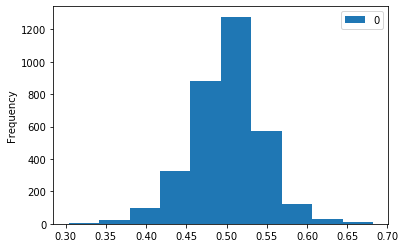

In [19]:
ynew=regr.predict(x_test)
pd.DataFrame(ynew).plot.hist()

<h3>Although the paper ran classifcation models we were unsure about whether or not this was the best option. So in order to compare between regression and classification we took our regression predictions and quintiled them and created confusion matrixes </h3>

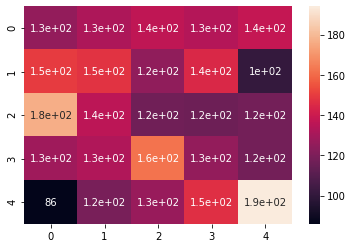

In [20]:
labs=5
c = sklearn.metrics.confusion_matrix(pd.qcut(y_test.values[:,0], labs, range(labs,0,-1)),pd.qcut(ynew, labs, range(labs,0,-1)))
sns.heatmap(c, annot=True)

In [21]:
del X
del y 
del x_train
del x_test
del y_train
del y_test
X = None
y  = None
x_train = None
x_test = None
y_train = None
y_test = None
del regr 
regr = None
del ynew

<h1>Nueral Network Models</h1>

<h2>Model 1 - MLP Classification</h2>
<h2>Model 2 - MLP Regression</h2>
<h2>Model 3 - MLP + LSTM Classification</h2>
<h2>Model 4 - MLP + LSTM Regression</h2>

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Concatenate, Input, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

<h1>Testing MLP Models</h1>

In [23]:
'''Model 1:  MLP Classification'''
'''We will only be using the cross sectional data here '''
cross_sectional_inputs = Input(shape=(83,))

h1=Dense(128, activation='relu')(cross_sectional_inputs)
h2=Dense(64, activation='relu')(h1)
h3=Dense(32, activation='relu')(h2)
outputs=Dense(5, activation='softmax')(h3)

mlp_model1=tf.keras.Model(inputs=cross_sectional_inputs, outputs=outputs)

'''Adam optimizer'''
opt=tf.keras.optimizers.Adam(
    learning_rate=0.005,
)
mlp_model1.compile(
    optimizer=opt, loss='CategoricalCrossentropy',metrics=['accuracy']
)

In [24]:
'''Model 2:  MLP Regression'''
'''We will only be using the cross sectional data here '''
cross_sectional_inputs = Input(shape=(83,))

h1=Dense(128, activation='relu')(cross_sectional_inputs)
h2=Dense(64, activation='relu')(h1)
h3=Dense(32, activation='relu')(h2)
outputs=Dense(1, activation='sigmoid')(h3)

mlp_model2=tf.keras.Model(inputs=cross_sectional_inputs, outputs=outputs)

opt=tf.keras.optimizers.Adam(
    learning_rate=0.005,
)
mlp_model2.compile(
    optimizer=opt, loss='binary_crossentropy',metrics=['binary_crossentropy','mean_squared_error','mean_absolute_error','mean_absolute_percentage_error']
)

<h3>You can also run these files using the .py files found in /utils folder</h3>
<p>For example for an MLP regression model...</p>
<p>mlp_model_regr=MLP(dim=(x_train[0].shape[1], 12), type='regression')</p>
<p>mlp_model_regr.fit(x_train, y_train, save_path='models/best_model3')</p>
<p>mlp_model_regr.predict(x_test)</p>
<p>For example for an MLP+ LSTM regression model...</p>
<p>hybrid_model_regr=Hybrid(dim=(x_train[0].shape[1], 12), type='regression')</p>
<p>hybrid_model_regr.fit(x_train, y_train, save_path='models/best_model3')</p>
<p>hybrid_model_regr.predict(x_test)</p>

<h3>We will test the hyper parameters for the MLP components on the first 10 years of training data for the classification model</h3>

In [50]:
start_time = time.time()

start_date='1971-01-31'
end_date='1981-01-31'
test_end_date='1981-02-28'

mask_train=(df[['DATE']]>=start_date) & (df[['DATE']]<end_date)
mask_test=(df[['DATE']]>=end_date) & (df[['DATE']]<test_end_date)

x = df[all_cols].values
y = pd.get_dummies(pd.qcut(df[Y].values[:,0], 5, range(0,5))).values 

x_train, y_train=sklearn.utils.shuffle(x[mask_train['DATE'],:], y[mask_train['DATE']],random_state=0)
x_test, y_test = x[mask_test['DATE'],:], y[mask_test['DATE']]

'''WE will be using earlystopping with a patience of 10 that will look to see if the training is lowering our validation loss, 
we will save the model with best validation loss. We will also reduce the learning rate if the validation loss doesn't go down with a pateince of 5'''
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint(os.path.join(wd_path,'hdf5_files/example1_class_model.hdf5'), save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=5e-5, mode='min')

history_mlp1=mlp_model1.fit(
    x=x_train, y=y_train, batch_size=256, epochs=100, verbose=1, 
    callbacks=[earlyStopping, mcp_save, reduce_lr_loss],
    validation_split=0.1
)

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
1213/1213 [==============================] - 2s 2ms/step - loss: 1.5231 - accuracy: 0.3016 - val_loss: 1.5614 - val_accuracy: 0.2800
Epoch 2/100
1213/1213 [==============================] - 2s 2ms/step - loss: 1.5228 - accuracy: 0.3014 - val_loss: 1.5617 - val_accuracy: 0.2804
Epoch 3/100
1213/1213 [==============================] - 2s 2ms/step - loss: 1.5226 - accuracy: 0.3016 - val_loss: 1.5616 - val_accuracy: 0.2800
Epoch 4/100
1213/1213 [==============================] - 2s 2ms/step - loss: 1.5225 - accuracy: 0.3018 - val_loss: 1.5618 - val_accuracy: 0.2799
Epoch 5/100
1213/1213 [==============================] - 2s 2ms/step - loss: 1.5224 - accuracy: 0.3018 - val_loss: 1.5619 - val_accuracy: 0.2803
Epoch 6/100
1199/1213 [============================>.] - ETA: 0s - loss: 1.5222 - accuracy: 0.3022
Epoch 00006: ReduceLROnPlateau reducing learning rate to 4.999999509891496e-06.
1213/1213 [==============================] - 2s 2ms/step - loss: 1.5223 - accuracy: 0.3021 - val

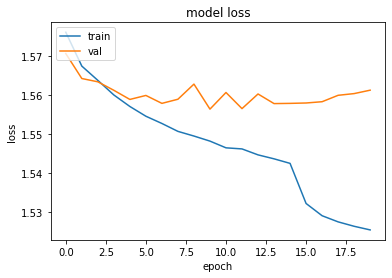

In [26]:
plt.plot(history_mlp1.history['loss'])
plt.plot(history_mlp1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

-1.0459567964061884

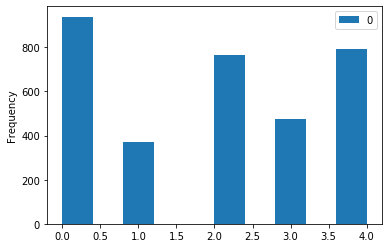

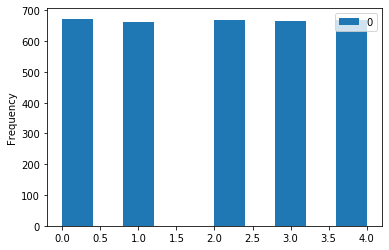

In [27]:
ynew=mlp_model1.predict(x_test)
pd.DataFrame(ynew.argmax(axis=1)).plot.hist()
pd.DataFrame(y_test.argmax(axis=1)).plot.hist()
sk.metrics.r2_score(y_test.argmax(axis=1), ynew.argmax(axis=1))

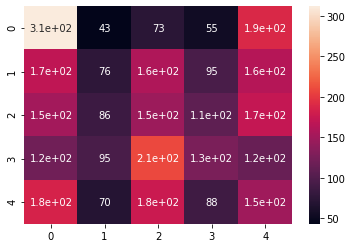

In [28]:
c=sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), ynew.argmax(axis=1))
sns.heatmap(c, annot=True)

In [29]:
del x
del y 
del x_train
del x_test
del y_train
del y_test
x = None
y  = None
x_train = None
x_test = None
y_train = None
y_test = None
del ynew
ynew = None

<h3>We will test the hyper parameters for the MLP components on the first 10 years of training data for the regression model</h3>

In [51]:
start_time = time.time()

start_date='1971-01-31'
end_date='1981-01-31'
test_end_date='1981-02-28'

mask_train=(df[['DATE']]>=start_date) & (df[['DATE']]<end_date)
mask_test=(df[['DATE']]>=end_date) & (df[['DATE']]<test_end_date)

x = df[all_cols].values
y = df[Y].values[:,0]

x_train, y_train=sklearn.utils.shuffle(x[mask_train['DATE'],:], y[mask_train['DATE']],random_state=0)
x_test, y_test=x[mask_test['DATE'],:], y[mask_test['DATE']]

'''WE will be using earlystopping with a patience of 10 that will look to see if the training is lowering our validation loss, 
we will save the model with best validation loss. We will also reduce the learning rate if the validation loss doesn't go down with a pateince of 5'''
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint(os.path.join(wd_path,'hdf5_files/example2_reg_model.hdf5'), save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=1e-4, mode='min')

history_mlp2=mlp_model2.fit(
    x=x_train, y=y_train, batch_size=256, epochs=100, verbose=1, 
    callbacks=[earlyStopping, mcp_save, reduce_lr_loss],
    validation_split=0.1
)

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
1213/1213 [==============================] - 3s 3ms/step - loss: 0.6799 - binary_crossentropy: 0.6799 - mean_squared_error: 0.0768 - mean_absolute_error: 0.2365 - mean_absolute_percentage_error: 320.7174 - val_loss: 0.6909 - val_binary_crossentropy: 0.6909 - val_mean_squared_error: 0.0823 - val_mean_absolute_error: 0.2449 - val_mean_absolute_percentage_error: 307.8997
Epoch 2/100
1213/1213 [==============================] - 3s 3ms/step - loss: 0.6799 - binary_crossentropy: 0.6799 - mean_squared_error: 0.0768 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 319.4776 - val_loss: 0.6909 - val_binary_crossentropy: 0.6909 - val_mean_squared_error: 0.0823 - val_mean_absolute_error: 0.2449 - val_mean_absolute_percentage_error: 308.3180
Epoch 3/100
1213/1213 [==============================] - 3s 3ms/step - loss: 0.6798 - binary_crossentropy: 0.6798 - mean_squared_error: 0.0768 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 319.6325 - val_loss: 0.6909

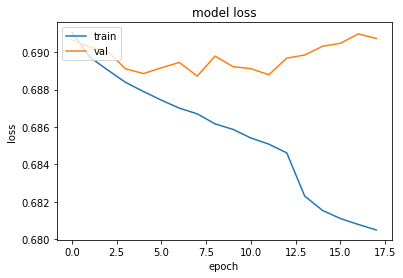

In [31]:
plt.plot(history_mlp2.history['loss'])
plt.plot(history_mlp2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

-0.02463833464990728

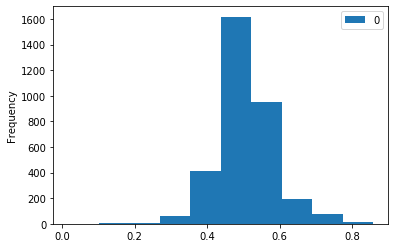

In [32]:
ynew=mlp_model2.predict(x_test)
pd.DataFrame(ynew).plot.hist()
sk.metrics.r2_score(y_test, ynew)

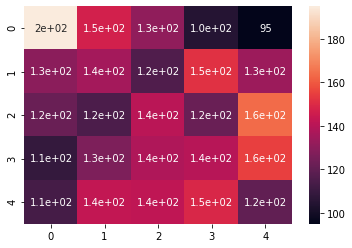

In [33]:
labs=5
c = sklearn.metrics.confusion_matrix(pd.qcut(y_test, labs, range(0,labs)),pd.qcut(ynew[:,0], labs, range(0,labs)))
sns.heatmap(c, annot=True)

In [34]:
del x
del y 
del x_train
del x_test
del y_train
del y_test
x = None
y  = None
x_train = None
x_test = None
y_train = None
y_test = None
del ynew
ynew = None

<h3>Testing LSTM+ MLP Models</h3>

In [35]:
'''Model 3: LSTM + MLP Classificatin'''
time_series_inputs = Input(shape=(12,1))
cross_sectional_inputs = Input(shape=(83,))

h1_rets=LSTM(units=50, return_sequences=True)(time_series_inputs)
time_series_output=LSTM(units=30, return_sequences=False)(h1_rets) 

combined_features = Concatenate()([cross_sectional_inputs, time_series_output])

h1=Dense(128, activation='relu')(combined_features)
h2=Dense(64, activation='relu')(h1)
h3=Dense(32, activation='relu')(h2)
outputs=Dense(5, activation='softmax')(h3)

hybrid_model1=tf.keras.Model(inputs=[cross_sectional_inputs,time_series_inputs], outputs=outputs)

opt=tf.keras.optimizers.Adam(
    learning_rate=0.005,
)
hybrid_model1 .compile(
    optimizer=opt, loss='CategoricalCrossentropy',metrics=['accuracy']
)

In [36]:
'''Model 4: LSTM + MLP Regression'''
time_series_inputs = Input(shape=(12,1))
cross_sectional_inputs = Input(shape=(83,))

h1_rets=LSTM(units=50, return_sequences=True)(time_series_inputs)
time_series_output=LSTM(units=30, return_sequences=False)(h1_rets) 

combined_features = Concatenate()([cross_sectional_inputs, time_series_output])

h1=Dense(128, activation='relu')(combined_features)
h2=Dense(64, activation='relu')(h1)
h3=Dense(32, activation='relu')(h2)
outputs=Dense(1, activation='sigmoid')(h3)

hybrid_model2=tf.keras.Model(inputs=[cross_sectional_inputs,time_series_inputs], outputs=outputs)

opt=tf.keras.optimizers.Adam(
    learning_rate=0.005,
)
hybrid_model2.compile(
    optimizer=opt, loss='binary_crossentropy',metrics=['binary_crossentropy','mean_squared_error','mean_absolute_error','mean_absolute_percentage_error']
)

In [52]:
start_time = time.time()

start_date='1971-01-31'
end_date='1981-01-31'
test_end_date='1981-02-28'

mask_train=(df[['DATE']]>=start_date) & (df[['DATE']]<end_date)
mask_test=(df[['DATE']]>=end_date) & (df[['DATE']]<test_end_date)

x = [df[all_cols].values,df[time_series_cols].values]
y = pd.get_dummies(pd.qcut(df[Y].values[:,0], 5, range(0,5))).values 

x_train, x_test, y_train, y_test=[i[mask_train['DATE'],:] for i in x], [i[mask_test['DATE'],:] for i in x], y[mask_train['DATE']], y[mask_test['DATE']]

'''WE will be using earlystopping with a patience of 10 that will look to see if the training is lowering our validation loss, 
we will save the model with best validation loss. We will also reduce the learning rate if the validation loss doesn't go down with a pateince of 5'''
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint(os.path.join(wd_path,'hdf5_files/example3_hybrid_class_model.hdf5'), save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=5e-5, mode='min')

history_hybrid1=hybrid_model1.fit(
    x=x_train, y=y_train, batch_size=256, epochs=100, verbose=1, 
    callbacks=[earlyStopping, mcp_save, reduce_lr_loss],
    validation_split=0.1
)

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
1213/1213 [==============================] - 8s 7ms/step - loss: 1.5338 - accuracy: 0.2950 - val_loss: 1.6098 - val_accuracy: 0.2641
Epoch 2/100
1213/1213 [==============================] - 8s 6ms/step - loss: 1.5334 - accuracy: 0.2955 - val_loss: 1.6100 - val_accuracy: 0.2639
Epoch 3/100
1213/1213 [==============================] - 8s 6ms/step - loss: 1.5332 - accuracy: 0.2955 - val_loss: 1.6097 - val_accuracy: 0.2640
Epoch 4/100
1213/1213 [==============================] - 8s 6ms/step - loss: 1.5331 - accuracy: 0.2958 - val_loss: 1.6111 - val_accuracy: 0.2635
Epoch 5/100
1213/1213 [==============================] - 8s 6ms/step - loss: 1.5329 - accuracy: 0.2958 - val_loss: 1.6097 - val_accuracy: 0.2638
Epoch 6/100
1213/1213 [==============================] - 8s 6ms/step - loss: 1.5328 - accuracy: 0.2959 - val_loss: 1.6112 - val_accuracy: 0.2636
Epoch 7/100
1213/1213 [==============================] - 8s 6ms/step - loss: 1.5326 - accuracy: 0.2961 - val_loss: 1.6115 - val_ac

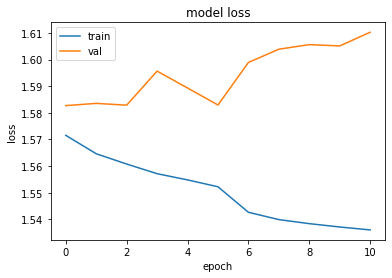

In [38]:
plt.plot(history_hybrid1.history['loss'])
plt.plot(history_hybrid1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

-1.0083560734850714

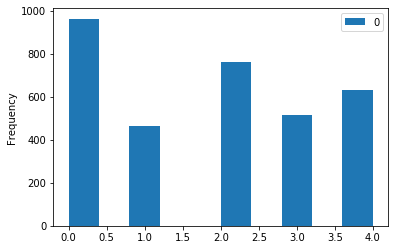

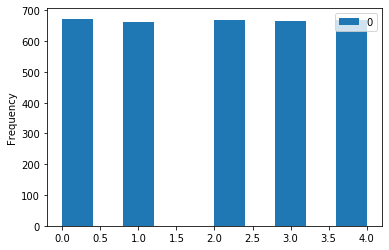

In [39]:
ynew=hybrid_model1.predict(x_test)
pd.DataFrame(ynew.argmax(axis=1)).plot.hist()
pd.DataFrame(y_test.argmax(axis=1)).plot.hist()
sk.metrics.r2_score(y_test.argmax(axis=1), ynew.argmax(axis=1))

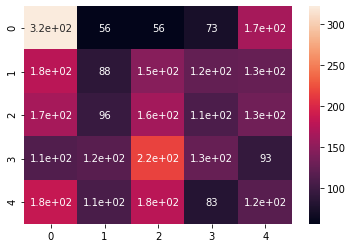

In [40]:
c=sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), ynew.argmax(axis=1))
sns.heatmap(c, annot=True)

In [41]:
del x
del y 
del x_train
del x_test
del y_train
del y_test
x = None
y  = None
x_train = None
x_test = None
y_train = None
y_test = None
del ynew
ynew = None

In [53]:
start_time = time.time()

start_date='1971-01-31'
end_date='1981-01-31'
test_end_date='1981-02-28'

mask_train=(df[['DATE']]>=start_date) & (df[['DATE']]<end_date)
mask_test=(df[['DATE']]>=end_date) & (df[['DATE']]<test_end_date)

x = [df[all_cols].values,df[time_series_cols].values]
y = df[Y].values[:,0]

x_train, x_test, y_train, y_test=[i[mask_train['DATE'],:] for i in x], [i[mask_test['DATE'],:] for i in x], y[mask_train['DATE']], y[mask_test['DATE']]

'''WE will be using earlystopping with a patience of 10 that will look to see if the training is lowering our validation loss, 
we will save the model with best validation loss. We will also reduce the learning rate if the validation loss doesn't go down with a pateince of 5'''
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint(os.path.join(wd_path,'hdf5_files/example4_hybrid_reg_model.hdf5'), save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=1e-4, mode='min')

history_hybrid2=hybrid_model2.fit(
    x=x_train, y=y_train, batch_size=256, epochs=100, verbose=1, 
    callbacks=[earlyStopping, mcp_save, reduce_lr_loss],
    validation_split=0.1
)

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
1213/1213 [==============================] - 9s 7ms/step - loss: 0.6830 - binary_crossentropy: 0.6830 - mean_squared_error: 0.0783 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 326.1599 - val_loss: 0.6969 - val_binary_crossentropy: 0.6969 - val_mean_squared_error: 0.0848 - val_mean_absolute_error: 0.2500 - val_mean_absolute_percentage_error: 338.6979
Epoch 2/100
1213/1213 [==============================] - 9s 7ms/step - loss: 0.6830 - binary_crossentropy: 0.6830 - mean_squared_error: 0.0783 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 325.3002 - val_loss: 0.6970 - val_binary_crossentropy: 0.6970 - val_mean_squared_error: 0.0849 - val_mean_absolute_error: 0.2500 - val_mean_absolute_percentage_error: 338.9598
Epoch 3/100
1213/1213 [==============================] - 9s 7ms/step - loss: 0.6829 - binary_crossentropy: 0.6829 - mean_squared_error: 0.0783 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 325.1556 - val_loss: 0.6971

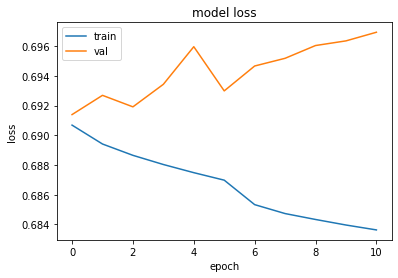

In [43]:
plt.plot(history_hybrid2.history['loss'])
plt.plot(history_hybrid2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

-0.01295167589411328

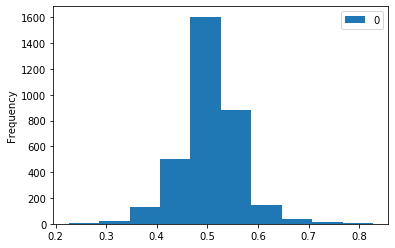

In [44]:
ynew=hybrid_model2.predict(x_test)
pd.DataFrame(ynew).plot.hist()
sk.metrics.r2_score(y_test, ynew)

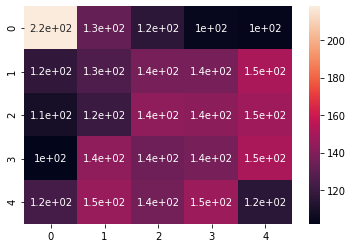

In [45]:
labs=5
c = sklearn.metrics.confusion_matrix(pd.qcut(y_test, labs, range(0,labs)),pd.qcut(ynew[:,0], labs, range(0,labs)))
sns.heatmap(c, annot=True)

In [46]:
del x
del y 
del x_train
del x_test
del y_train
del y_test
x = None
y  = None
x_train = None
x_test = None
y_train = None
y_test = None
del ynew
ynew = None

<h2>Running the models monthly</h2>

<h3>Estimate of runnning time ~29 hours</h3>
<p>Each iteration takes about 110 seconds and we are running 39 years monthly so that is 936 iterations since we are running 2 models. This is around 29 hours.</p>

In [47]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [48]:
dates = df['DATE'].unique()

In [26]:
'''Model 3: LSTM + MLP Classificatin'''

x = [df[all_cols].values,df[time_series_cols].values]
y = pd.get_dummies(pd.qcut(df[Y].values[:,0], 5, range(0,5))).values 

time_series_inputs = Input(shape=(12,1))
cross_sectional_inputs = Input(shape=(83,))

h1_rets=LSTM(units=50, return_sequences=True)(time_series_inputs)
time_series_output=LSTM(units=30, return_sequences=False)(h1_rets) 

combined_features = Concatenate()([cross_sectional_inputs, time_series_output])

h1=Dense(128, activation='relu')(combined_features)
h2=Dense(64, activation='relu')(h1)
h3=Dense(32, activation='relu')(h2)
outputs=Dense(5, activation='softmax')(h3)

for dt in dates[119:]:
    hybrid_model=tf.keras.Model(inputs=[cross_sectional_inputs,time_series_inputs], outputs=outputs)
    
    opt=tf.keras.optimizers.Adam(
        learning_rate=0.005,
    )
    
    hybrid_model.compile(
        optimizer=opt, loss='CategoricalCrossentropy',metrics=['accuracy']
    )

    end_date = pd.to_datetime(dt)
    start_date = pd.to_datetime(pd.to_datetime(dt) - relativedelta(years=10))
    
    print(start_date,end_date)
    
    mask_train=(df[['DATE']]>=start_date) & (df[['DATE']]<=end_date)
    
    x_train, y_train=[i[mask_train['DATE'],:] for i in x], y[mask_train['DATE']]
    
    earlyStopping = EarlyStopping(monitor='val_loss', patience=6, verbose=0, mode='min')
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_delta=1e-4, mode='min')
    mcp_save = ModelCheckpoint(os.path.join(wd_path,'hdf5_files/hybrid_class_model_train_period_'+str(start_date.month)+'_'+str(start_date.year)+'_'+str(end_date.month)+'_'+str(end_date.year)+'.hdf5'), save_best_only=True, monitor='val_loss', mode='min')    
    
    history_hybrid=hybrid_model.fit(
        x=x_train, y=y_train, batch_size=512, epochs=100, verbose=1, 
        callbacks=[earlyStopping, mcp_save, reduce_lr_loss],
        validation_split=0.1
    )
    
    del hybrid_model
    del history_hybrid
    del x_train
    del y_train
    gc.collect()
    hybrid_model = None
    history_hybrid = None
    x_train = None
    y_train = None

1974-09-30 00:00:00 1984-09-30 00:00:00
Epoch 1/100
720/720 [==============================] - 8s 11ms/step - loss: 1.5679 - accuracy: 0.2705 - val_loss: 1.5590 - val_accuracy: 0.2835
Epoch 2/100
720/720 [==============================] - 7s 10ms/step - loss: 1.5601 - accuracy: 0.2772 - val_loss: 1.5581 - val_accuracy: 0.2810
Epoch 3/100
720/720 [==============================] - 8s 11ms/step - loss: 1.5563 - accuracy: 0.2789 - val_loss: 1.5599 - val_accuracy: 0.2787
Epoch 4/100
720/720 [==============================] - 7s 10ms/step - loss: 1.5528 - accuracy: 0.2812 - val_loss: 1.5673 - val_accuracy: 0.2780
Epoch 5/100
717/720 [============================>.] - ETA: 0s - loss: 1.5500 - accuracy: 0.2840
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
720/720 [==============================] - 7s 9ms/step - loss: 1.5499 - accuracy: 0.2841 - val_loss: 1.5636 - val_accuracy: 0.2792
Epoch 6/100
720/720 [==============================] - 7s 10ms/step - loss: 

Epoch 6/100
729/729 [==============================] - 5s 6ms/step - loss: 1.5043 - accuracy: 0.3120 - val_loss: 1.5962 - val_accuracy: 0.2719
Epoch 7/100
724/729 [============================>.] - ETA: 0s - loss: 1.5027 - accuracy: 0.3130
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
729/729 [==============================] - 5s 6ms/step - loss: 1.5028 - accuracy: 0.3130 - val_loss: 1.5980 - val_accuracy: 0.2775
Epoch 8/100
729/729 [==============================] - 5s 6ms/step - loss: 1.4841 - accuracy: 0.3222 - val_loss: 1.6184 - val_accuracy: 0.2727
Epoch 9/100
729/729 [==============================] - 5s 6ms/step - loss: 1.4763 - accuracy: 0.3266 - val_loss: 1.6236 - val_accuracy: 0.2735
Epoch 10/100
729/729 [==============================] - ETA: 0s - loss: 1.4725 - accuracy: 0.3288
Epoch 00010: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
729/729 [==============================] - 5s 6ms/step - loss: 1.4725 - accuracy: 0.

746/746 [==============================] - 5s 7ms/step - loss: 1.4694 - accuracy: 0.3297 - val_loss: 1.6231 - val_accuracy: 0.2657
Epoch 5/100
746/746 [==============================] - 5s 7ms/step - loss: 1.4689 - accuracy: 0.3296 - val_loss: 1.6334 - val_accuracy: 0.2663
Epoch 6/100
746/746 [==============================] - 5s 7ms/step - loss: 1.4686 - accuracy: 0.3299 - val_loss: 1.6282 - val_accuracy: 0.2689
Epoch 7/100
741/746 [============================>.] - ETA: 0s - loss: 1.4694 - accuracy: 0.3299
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
746/746 [==============================] - 5s 6ms/step - loss: 1.4695 - accuracy: 0.3299 - val_loss: 1.6290 - val_accuracy: 0.2602
Epoch 8/100
746/746 [==============================] - 5s 7ms/step - loss: 1.4482 - accuracy: 0.3400 - val_loss: 1.6627 - val_accuracy: 0.2662
Epoch 9/100
746/746 [==============================] - 5s 7ms/step - loss: 1.4363 - accuracy: 0.3456 - val_loss: 1.6740 - val_accura

763/763 [==============================] - 6s 7ms/step - loss: 1.4622 - accuracy: 0.3338 - val_loss: 1.6436 - val_accuracy: 0.2588
Epoch 2/100
763/763 [==============================] - 5s 7ms/step - loss: 1.4640 - accuracy: 0.3313 - val_loss: 1.6388 - val_accuracy: 0.2539
Epoch 3/100
763/763 [==============================] - 5s 7ms/step - loss: 1.4642 - accuracy: 0.3319 - val_loss: 1.6414 - val_accuracy: 0.2509
Epoch 4/100
763/763 [==============================] - 5s 7ms/step - loss: 1.4648 - accuracy: 0.3315 - val_loss: 1.6612 - val_accuracy: 0.2504
Epoch 5/100
758/763 [============================>.] - ETA: 0s - loss: 1.4667 - accuracy: 0.3301
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
763/763 [==============================] - 5s 7ms/step - loss: 1.4667 - accuracy: 0.3301 - val_loss: 1.6413 - val_accuracy: 0.2591
Epoch 6/100
763/763 [==============================] - 5s 7ms/step - loss: 1.4449 - accuracy: 0.3417 - val_loss: 1.6703 - val_accura

1977-03-31 00:00:00 1987-03-31 00:00:00
Epoch 1/100
773/773 [==============================] - 6s 7ms/step - loss: 1.4631 - accuracy: 0.3330 - val_loss: 1.6460 - val_accuracy: 0.2534
Epoch 2/100
773/773 [==============================] - 5s 7ms/step - loss: 1.4647 - accuracy: 0.3307 - val_loss: 1.6510 - val_accuracy: 0.2527
Epoch 3/100
773/773 [==============================] - 5s 7ms/step - loss: 1.4648 - accuracy: 0.3317 - val_loss: 1.6614 - val_accuracy: 0.2549
Epoch 4/100
769/773 [============================>.] - ETA: 0s - loss: 1.4656 - accuracy: 0.3312
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
773/773 [==============================] - 5s 6ms/step - loss: 1.4656 - accuracy: 0.3312 - val_loss: 1.6600 - val_accuracy: 0.2549
Epoch 5/100
773/773 [==============================] - 5s 7ms/step - loss: 1.4439 - accuracy: 0.3406 - val_loss: 1.6854 - val_accuracy: 0.2542
Epoch 6/100
773/773 [==============================] - 5s 7ms/step - loss: 1.432

783/783 [==============================] - 5s 7ms/step - loss: 1.4640 - accuracy: 0.3311 - val_loss: 1.6583 - val_accuracy: 0.2560
Epoch 2/100
783/783 [==============================] - 5s 6ms/step - loss: 1.4673 - accuracy: 0.3300 - val_loss: 1.6555 - val_accuracy: 0.2560
Epoch 3/100
783/783 [==============================] - 5s 6ms/step - loss: 1.4671 - accuracy: 0.3292 - val_loss: 1.6489 - val_accuracy: 0.2534
Epoch 4/100
783/783 [==============================] - 5s 6ms/step - loss: 1.4674 - accuracy: 0.3295 - val_loss: 1.6556 - val_accuracy: 0.2592
Epoch 5/100
783/783 [==============================] - 5s 6ms/step - loss: 1.4663 - accuracy: 0.3314 - val_loss: 1.6557 - val_accuracy: 0.2597
Epoch 6/100
776/783 [============================>.] - ETA: 0s - loss: 1.4684 - accuracy: 0.3294
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
783/783 [==============================] - 5s 6ms/step - loss: 1.4685 - accuracy: 0.3294 - val_loss: 1.6547 - val_accura

1978-01-31 00:00:00 1988-01-31 00:00:00
Epoch 1/100
795/795 [==============================] - 5s 7ms/step - loss: 1.4661 - accuracy: 0.3304 - val_loss: 1.6465 - val_accuracy: 0.2637
Epoch 2/100
795/795 [==============================] - 5s 6ms/step - loss: 1.4680 - accuracy: 0.3283 - val_loss: 1.6573 - val_accuracy: 0.2637
Epoch 3/100
795/795 [==============================] - 5s 6ms/step - loss: 1.4689 - accuracy: 0.3288 - val_loss: 1.6507 - val_accuracy: 0.2633
Epoch 4/100
790/795 [============================>.] - ETA: 0s - loss: 1.4684 - accuracy: 0.3290
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
795/795 [==============================] - 5s 6ms/step - loss: 1.4684 - accuracy: 0.3290 - val_loss: 1.6467 - val_accuracy: 0.2634
Epoch 5/100
795/795 [==============================] - 5s 6ms/step - loss: 1.4501 - accuracy: 0.3377 - val_loss: 1.6748 - val_accuracy: 0.2655
Epoch 6/100
795/795 [==============================] - 5s 6ms/step - loss: 1.438

Epoch 10/100
813/813 [==============================] - 5s 7ms/step - loss: 1.4511 - accuracy: 0.3367 - val_loss: 1.6701 - val_accuracy: 0.2606
Epoch 11/100
813/813 [==============================] - 5s 6ms/step - loss: 1.4415 - accuracy: 0.3407 - val_loss: 1.6798 - val_accuracy: 0.2626
Epoch 12/100
812/813 [============================>.] - ETA: 0s - loss: 1.4367 - accuracy: 0.3426
Epoch 00012: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
813/813 [==============================] - 5s 6ms/step - loss: 1.4367 - accuracy: 0.3426 - val_loss: 1.6922 - val_accuracy: 0.2617
1978-11-30 00:00:00 1988-11-30 00:00:00
Epoch 1/100
815/815 [==============================] - 6s 7ms/step - loss: 1.4716 - accuracy: 0.3279 - val_loss: 1.6422 - val_accuracy: 0.2664
Epoch 2/100
815/815 [==============================] - 5s 7ms/step - loss: 1.4728 - accuracy: 0.3263 - val_loss: 1.6484 - val_accuracy: 0.2689
Epoch 3/100
815/815 [==============================] - 5s 7ms/step - loss: 1

1979-03-31 00:00:00 1989-03-31 00:00:00
Epoch 1/100
822/822 [==============================] - 6s 7ms/step - loss: 1.4711 - accuracy: 0.3276 - val_loss: 1.6321 - val_accuracy: 0.2625
Epoch 2/100
822/822 [==============================] - 6s 7ms/step - loss: 1.4747 - accuracy: 0.3257 - val_loss: 1.6279 - val_accuracy: 0.2738
Epoch 3/100
822/822 [==============================] - 6s 7ms/step - loss: 1.4741 - accuracy: 0.3261 - val_loss: 1.6248 - val_accuracy: 0.2687
Epoch 4/100
822/822 [==============================] - 6s 7ms/step - loss: 1.4741 - accuracy: 0.3267 - val_loss: 1.6239 - val_accuracy: 0.2611
Epoch 5/100
822/822 [==============================] - 6s 7ms/step - loss: 1.4755 - accuracy: 0.3253 - val_loss: 1.6172 - val_accuracy: 0.2668
Epoch 6/100
822/822 [==============================] - 5s 7ms/step - loss: 1.4745 - accuracy: 0.3256 - val_loss: 1.6316 - val_accuracy: 0.2671
Epoch 7/100
822/822 [==============================] - 5s 6ms/step - loss: 1.4736 - accuracy: 0.3262 -

Epoch 7/100
836/836 [==============================] - 5s 6ms/step - loss: 1.4610 - accuracy: 0.3304 - val_loss: 1.6401 - val_accuracy: 0.2709
Epoch 8/100
836/836 [==============================] - 5s 6ms/step - loss: 1.4523 - accuracy: 0.3339 - val_loss: 1.6525 - val_accuracy: 0.2710
Epoch 9/100
835/836 [============================>.] - ETA: 0s - loss: 1.4475 - accuracy: 0.3361
Epoch 00009: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
836/836 [==============================] - 5s 6ms/step - loss: 1.4475 - accuracy: 0.3361 - val_loss: 1.6618 - val_accuracy: 0.2694
1980-01-31 00:00:00 1990-01-31 00:00:00
Epoch 1/100
837/837 [==============================] - 6s 7ms/step - loss: 1.4759 - accuracy: 0.3240 - val_loss: 1.6196 - val_accuracy: 0.2762
Epoch 2/100
837/837 [==============================] - 5s 6ms/step - loss: 1.4781 - accuracy: 0.3221 - val_loss: 1.6246 - val_accuracy: 0.2748
Epoch 3/100
837/837 [==============================] - 5s 6ms/step - loss: 1.47

850/850 [==============================] - 10s 11ms/step - loss: 1.4820 - accuracy: 0.3229 - val_loss: 1.6252 - val_accuracy: 0.2661
Epoch 3/100
850/850 [==============================] - 9s 11ms/step - loss: 1.4828 - accuracy: 0.3214 - val_loss: 1.6230 - val_accuracy: 0.2663
Epoch 4/100
850/850 [==============================] - 5s 6ms/step - loss: 1.4813 - accuracy: 0.3225 - val_loss: 1.6350 - val_accuracy: 0.2618
Epoch 5/100
850/850 [==============================] - 5s 6ms/step - loss: 1.4803 - accuracy: 0.3227 - val_loss: 1.6413 - val_accuracy: 0.2624
Epoch 6/100
844/850 [============================>.] - ETA: 0s - loss: 1.4820 - accuracy: 0.3218
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
850/850 [==============================] - 6s 7ms/step - loss: 1.4820 - accuracy: 0.3218 - val_loss: 1.6420 - val_accuracy: 0.2611
Epoch 7/100
850/850 [==============================] - 6s 7ms/step - loss: 1.4632 - accuracy: 0.3306 - val_loss: 1.6655 - val_acc

Epoch 9/100
855/855 [==============================] - 5s 6ms/step - loss: 1.4545 - accuracy: 0.3341 - val_loss: 1.7047 - val_accuracy: 0.2626
Epoch 10/100
854/855 [============================>.] - ETA: 0s - loss: 1.4503 - accuracy: 0.3356
Epoch 00010: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
855/855 [==============================] - 6s 6ms/step - loss: 1.4503 - accuracy: 0.3356 - val_loss: 1.7146 - val_accuracy: 0.2614
1981-03-31 00:00:00 1991-03-31 00:00:00
Epoch 1/100
857/857 [==============================] - 6s 7ms/step - loss: 1.4794 - accuracy: 0.3225 - val_loss: 1.6670 - val_accuracy: 0.2586
Epoch 2/100
857/857 [==============================] - 5s 6ms/step - loss: 1.4830 - accuracy: 0.3209 - val_loss: 1.6480 - val_accuracy: 0.2580
Epoch 3/100
857/857 [==============================] - 5s 6ms/step - loss: 1.4862 - accuracy: 0.3199 - val_loss: 1.6674 - val_accuracy: 0.2578
Epoch 4/100
857/857 [==============================] - 5s 6ms/step - loss: 1.4

Epoch 10/100
866/866 [==============================] - 5s 6ms/step - loss: 1.4646 - accuracy: 0.3289 - val_loss: 1.6797 - val_accuracy: 0.2619
Epoch 11/100
866/866 [==============================] - 6s 6ms/step - loss: 1.4571 - accuracy: 0.3318 - val_loss: 1.6991 - val_accuracy: 0.2591
Epoch 12/100
860/866 [============================>.] - ETA: 0s - loss: 1.4526 - accuracy: 0.3340
Epoch 00012: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
866/866 [==============================] - 5s 6ms/step - loss: 1.4527 - accuracy: 0.3339 - val_loss: 1.7028 - val_accuracy: 0.2615
1981-12-31 00:00:00 1991-12-31 00:00:00
Epoch 1/100
868/868 [==============================] - 6s 7ms/step - loss: 1.4844 - accuracy: 0.3204 - val_loss: 1.6296 - val_accuracy: 0.2597
Epoch 2/100
868/868 [==============================] - 5s 6ms/step - loss: 1.4822 - accuracy: 0.3197 - val_loss: 1.6445 - val_accuracy: 0.2583
Epoch 3/100
868/868 [==============================] - 5s 6ms/step - loss: 1

Epoch 19/100
871/871 [==============================] - 5s 6ms/step - loss: 1.4573 - accuracy: 0.3317 - val_loss: 1.6870 - val_accuracy: 0.2622
Epoch 20/100
866/871 [============================>.] - ETA: 0s - loss: 1.4540 - accuracy: 0.3328
Epoch 00020: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
871/871 [==============================] - 5s 6ms/step - loss: 1.4540 - accuracy: 0.3328 - val_loss: 1.6980 - val_accuracy: 0.2615
1982-04-30 00:00:00 1992-04-30 00:00:00
Epoch 1/100
872/872 [==============================] - 6s 7ms/step - loss: 1.4810 - accuracy: 0.3204 - val_loss: 1.6500 - val_accuracy: 0.2611
Epoch 2/100
872/872 [==============================] - 5s 6ms/step - loss: 1.4861 - accuracy: 0.3190 - val_loss: 1.6378 - val_accuracy: 0.2622
Epoch 3/100
872/872 [==============================] - 5s 6ms/step - loss: 1.4845 - accuracy: 0.3198 - val_loss: 1.6476 - val_accuracy: 0.2626
Epoch 4/100
872/872 [==============================] - 5s 6ms/step - loss: 1.

Epoch 1/100
877/877 [==============================] - 6s 7ms/step - loss: 1.4847 - accuracy: 0.3197 - val_loss: 1.6453 - val_accuracy: 0.2618
Epoch 2/100
877/877 [==============================] - 5s 6ms/step - loss: 1.4863 - accuracy: 0.3190 - val_loss: 1.6388 - val_accuracy: 0.2598
Epoch 3/100
877/877 [==============================] - 5s 6ms/step - loss: 1.4841 - accuracy: 0.3203 - val_loss: 1.6474 - val_accuracy: 0.2607
Epoch 4/100
877/877 [==============================] - 5s 6ms/step - loss: 1.4851 - accuracy: 0.3188 - val_loss: 1.6457 - val_accuracy: 0.2631
Epoch 5/100
873/877 [============================>.] - ETA: 0s - loss: 1.4862 - accuracy: 0.3180
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
877/877 [==============================] - 5s 6ms/step - loss: 1.4862 - accuracy: 0.3180 - val_loss: 1.6436 - val_accuracy: 0.2591
Epoch 6/100
877/877 [==============================] - 5s 6ms/step - loss: 1.4691 - accuracy: 0.3259 - val_loss: 1.6673 

1983-02-28 00:00:00 1993-02-28 00:00:00
Epoch 1/100
883/883 [==============================] - 6s 7ms/step - loss: 1.4922 - accuracy: 0.3164 - val_loss: 1.6028 - val_accuracy: 0.2678
Epoch 2/100
883/883 [==============================] - 5s 6ms/step - loss: 1.4898 - accuracy: 0.3176 - val_loss: 1.6338 - val_accuracy: 0.2638
Epoch 3/100
883/883 [==============================] - 5s 6ms/step - loss: 1.4876 - accuracy: 0.3184 - val_loss: 1.6361 - val_accuracy: 0.2672
Epoch 4/100
877/883 [============================>.] - ETA: 0s - loss: 1.4933 - accuracy: 0.3152
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
883/883 [==============================] - 5s 6ms/step - loss: 1.4933 - accuracy: 0.3152 - val_loss: 1.6072 - val_accuracy: 0.2705
Epoch 5/100
883/883 [==============================] - 5s 6ms/step - loss: 1.4769 - accuracy: 0.3228 - val_loss: 1.6381 - val_accuracy: 0.2656
Epoch 6/100
883/883 [==============================] - 5s 6ms/step - loss: 1.468

889/889 [==============================] - 5s 6ms/step - loss: 1.4965 - accuracy: 0.3146 - val_loss: 1.6309 - val_accuracy: 0.2642
Epoch 4/100
889/889 [==============================] - 5s 6ms/step - loss: 1.4897 - accuracy: 0.3167 - val_loss: 1.6156 - val_accuracy: 0.2636
Epoch 5/100
889/889 [==============================] - ETA: 0s - loss: 1.4949 - accuracy: 0.3144
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
889/889 [==============================] - 5s 6ms/step - loss: 1.4949 - accuracy: 0.3144 - val_loss: 1.6133 - val_accuracy: 0.2649
Epoch 6/100
889/889 [==============================] - 5s 6ms/step - loss: 1.4831 - accuracy: 0.3218 - val_loss: 1.6347 - val_accuracy: 0.2652
Epoch 7/100
889/889 [==============================] - 5s 6ms/step - loss: 1.4744 - accuracy: 0.3251 - val_loss: 1.6478 - val_accuracy: 0.2663
Epoch 8/100
886/889 [============================>.] - ETA: 0s - loss: 1.4691 - accuracy: 0.3275
Epoch 00008: ReduceLROnPlateau redu

Epoch 10/100
894/894 [==============================] - 5s 6ms/step - loss: 1.4943 - accuracy: 0.3149 - val_loss: 1.6103 - val_accuracy: 0.2669
Epoch 11/100
894/894 [==============================] - 5s 6ms/step - loss: 1.4872 - accuracy: 0.3183 - val_loss: 1.6202 - val_accuracy: 0.2675
Epoch 12/100
893/894 [============================>.] - ETA: 0s - loss: 1.4818 - accuracy: 0.3208
Epoch 00012: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
894/894 [==============================] - 5s 6ms/step - loss: 1.4818 - accuracy: 0.3208 - val_loss: 1.6295 - val_accuracy: 0.2658
1983-12-31 00:00:00 1993-12-31 00:00:00
Epoch 1/100
896/896 [==============================] - 6s 7ms/step - loss: 1.4972 - accuracy: 0.3130 - val_loss: 1.6101 - val_accuracy: 0.2654
Epoch 2/100
896/896 [==============================] - 5s 6ms/step - loss: 1.4953 - accuracy: 0.3140 - val_loss: 1.6103 - val_accuracy: 0.2599
Epoch 3/100
896/896 [==============================] - 6s 6ms/step - loss: 1

Epoch 2/100
903/903 [==============================] - 6s 7ms/step - loss: 1.5033 - accuracy: 0.3103 - val_loss: 1.6268 - val_accuracy: 0.2578
Epoch 3/100
903/903 [==============================] - 6s 6ms/step - loss: 1.4958 - accuracy: 0.3127 - val_loss: 1.6300 - val_accuracy: 0.2595
Epoch 4/100
903/903 [==============================] - 6s 7ms/step - loss: 1.4916 - accuracy: 0.3156 - val_loss: 1.6401 - val_accuracy: 0.2609
Epoch 5/100
901/903 [============================>.] - ETA: 0s - loss: 1.4906 - accuracy: 0.3163
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
903/903 [==============================] - 6s 7ms/step - loss: 1.4906 - accuracy: 0.3162 - val_loss: 1.6343 - val_accuracy: 0.2612
Epoch 6/100
903/903 [==============================] - 6s 7ms/step - loss: 1.4759 - accuracy: 0.3228 - val_loss: 1.6609 - val_accuracy: 0.2624
Epoch 7/100
903/903 [==============================] - 6s 7ms/step - loss: 1.4685 - accuracy: 0.3254 - val_loss: 1.6736 

1984-10-31 00:00:00 1994-10-31 00:00:00
Epoch 1/100
913/913 [==============================] - 6s 7ms/step - loss: 1.4937 - accuracy: 0.3139 - val_loss: 1.6251 - val_accuracy: 0.2659
Epoch 2/100
913/913 [==============================] - 6s 6ms/step - loss: 1.4929 - accuracy: 0.3142 - val_loss: 1.6486 - val_accuracy: 0.2678
Epoch 3/100
913/913 [==============================] - 6s 6ms/step - loss: 1.4906 - accuracy: 0.3141 - val_loss: 1.6472 - val_accuracy: 0.2633
Epoch 4/100
907/913 [============================>.] - ETA: 0s - loss: 1.5016 - accuracy: 0.3097
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
913/913 [==============================] - 6s 6ms/step - loss: 1.5017 - accuracy: 0.3097 - val_loss: 1.6273 - val_accuracy: 0.2647
Epoch 5/100
913/913 [==============================] - 6s 6ms/step - loss: 1.4810 - accuracy: 0.3194 - val_loss: 1.6538 - val_accuracy: 0.2674
Epoch 6/100
913/913 [==============================] - 6s 6ms/step - loss: 1.474

1985-03-31 00:00:00 1995-03-31 00:00:00
Epoch 1/100
926/926 [==============================] - 6s 7ms/step - loss: 1.4949 - accuracy: 0.3131 - val_loss: 1.6158 - val_accuracy: 0.2712
Epoch 2/100
926/926 [==============================] - 6s 6ms/step - loss: 1.4980 - accuracy: 0.3119 - val_loss: 1.6127 - val_accuracy: 0.2740
Epoch 3/100
926/926 [==============================] - 6s 6ms/step - loss: 1.5097 - accuracy: 0.3061 - val_loss: 1.6180 - val_accuracy: 0.2704
Epoch 4/100
926/926 [==============================] - 6s 6ms/step - loss: 1.5002 - accuracy: 0.3110 - val_loss: 1.6198 - val_accuracy: 0.2622
Epoch 5/100
923/926 [============================>.] - ETA: 0s - loss: 1.4959 - accuracy: 0.3123
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
926/926 [==============================] - 6s 6ms/step - loss: 1.4959 - accuracy: 0.3123 - val_loss: 1.6267 - val_accuracy: 0.2713
Epoch 6/100
926/926 [==============================] - 6s 6ms/step - loss: 1.479

939/939 [==============================] - 6s 6ms/step - loss: 1.4955 - accuracy: 0.3123 - val_loss: 1.6350 - val_accuracy: 0.2716
Epoch 4/100
939/939 [==============================] - 6s 7ms/step - loss: 1.4982 - accuracy: 0.3106 - val_loss: 1.6122 - val_accuracy: 0.2733
Epoch 5/100
939/939 [==============================] - 6s 6ms/step - loss: 1.4972 - accuracy: 0.3105 - val_loss: 1.6327 - val_accuracy: 0.2738
Epoch 6/100
939/939 [==============================] - 6s 6ms/step - loss: 1.4956 - accuracy: 0.3121 - val_loss: 1.6299 - val_accuracy: 0.2715
Epoch 7/100
933/939 [============================>.] - ETA: 0s - loss: 1.4940 - accuracy: 0.3140
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
939/939 [==============================] - 6s 6ms/step - loss: 1.4940 - accuracy: 0.3141 - val_loss: 1.6387 - val_accuracy: 0.2723
Epoch 8/100
939/939 [==============================] - 6s 6ms/step - loss: 1.4817 - accuracy: 0.3201 - val_loss: 1.6504 - val_accura

Epoch 5/100
951/951 [==============================] - 6s 7ms/step - loss: 1.4949 - accuracy: 0.3137 - val_loss: 1.6176 - val_accuracy: 0.2765
Epoch 6/100
951/951 [==============================] - 6s 6ms/step - loss: 1.4963 - accuracy: 0.3127 - val_loss: 1.6019 - val_accuracy: 0.2735
Epoch 7/100
951/951 [==============================] - 6s 7ms/step - loss: 1.4939 - accuracy: 0.3139 - val_loss: 1.6138 - val_accuracy: 0.2730
Epoch 8/100
951/951 [==============================] - 6s 7ms/step - loss: 1.4935 - accuracy: 0.3129 - val_loss: 1.6132 - val_accuracy: 0.2704
Epoch 9/100
947/951 [============================>.] - ETA: 0s - loss: 1.4920 - accuracy: 0.3147
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
951/951 [==============================] - 6s 6ms/step - loss: 1.4921 - accuracy: 0.3147 - val_loss: 1.6427 - val_accuracy: 0.2722
Epoch 10/100
951/951 [==============================] - 6s 6ms/step - loss: 1.4763 - accuracy: 0.3218 - val_loss: 1.6483

Epoch 7/100
964/964 [==============================] - 6s 7ms/step - loss: 1.4952 - accuracy: 0.3116 - val_loss: 1.6005 - val_accuracy: 0.2764
Epoch 8/100
964/964 [==============================] - 6s 7ms/step - loss: 1.4918 - accuracy: 0.3134 - val_loss: 1.6125 - val_accuracy: 0.2742
Epoch 9/100
964/964 [==============================] - 6s 6ms/step - loss: 1.4970 - accuracy: 0.3114 - val_loss: 1.6213 - val_accuracy: 0.2750
Epoch 10/100
964/964 [==============================] - 7s 7ms/step - loss: 1.5001 - accuracy: 0.3099 - val_loss: 1.5907 - val_accuracy: 0.2756
Epoch 11/100
964/964 [==============================] - 6s 6ms/step - loss: 1.4966 - accuracy: 0.3113 - val_loss: 1.6052 - val_accuracy: 0.2734
Epoch 12/100
964/964 [==============================] - 6s 7ms/step - loss: 1.4919 - accuracy: 0.3140 - val_loss: 1.6137 - val_accuracy: 0.2760
Epoch 13/100
964/964 [==============================] - ETA: 0s - loss: 1.4907 - accuracy: 0.3139
Epoch 00013: ReduceLROnPlateau reducing l

Epoch 7/100
977/977 [==============================] - 6s 7ms/step - loss: 1.4738 - accuracy: 0.3228 - val_loss: 1.6622 - val_accuracy: 0.2752
Epoch 8/100
977/977 [==============================] - 6s 6ms/step - loss: 1.4670 - accuracy: 0.3254 - val_loss: 1.6763 - val_accuracy: 0.2756
Epoch 9/100
973/977 [============================>.] - ETA: 0s - loss: 1.4638 - accuracy: 0.3274
Epoch 00009: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
977/977 [==============================] - 6s 6ms/step - loss: 1.4639 - accuracy: 0.3273 - val_loss: 1.6882 - val_accuracy: 0.2755
1986-09-30 00:00:00 1996-09-30 00:00:00
Epoch 1/100
981/981 [==============================] - 7s 7ms/step - loss: 1.4891 - accuracy: 0.3151 - val_loss: 1.6123 - val_accuracy: 0.2759
Epoch 2/100
981/981 [==============================] - 6s 7ms/step - loss: 1.4908 - accuracy: 0.3151 - val_loss: 1.6454 - val_accuracy: 0.2822
Epoch 3/100
981/981 [==============================] - 6s 7ms/step - loss: 1.49

1987-02-28 00:00:00 1997-02-28 00:00:00
Epoch 1/100
998/998 [==============================] - 7s 7ms/step - loss: 1.4995 - accuracy: 0.3130 - val_loss: 1.6058 - val_accuracy: 0.2912
Epoch 2/100
998/998 [==============================] - 6s 6ms/step - loss: 1.4940 - accuracy: 0.3131 - val_loss: 1.6110 - val_accuracy: 0.2851
Epoch 3/100
998/998 [==============================] - 6s 6ms/step - loss: 1.4925 - accuracy: 0.3146 - val_loss: 1.6068 - val_accuracy: 0.2874
Epoch 4/100
995/998 [============================>.] - ETA: 0s - loss: 1.4966 - accuracy: 0.3112
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
998/998 [==============================] - 7s 7ms/step - loss: 1.4966 - accuracy: 0.3112 - val_loss: 1.6275 - val_accuracy: 0.2783
Epoch 5/100
998/998 [==============================] - 6s 6ms/step - loss: 1.4786 - accuracy: 0.3210 - val_loss: 1.6490 - val_accuracy: 0.2753
Epoch 6/100
998/998 [==============================] - 6s 6ms/step - loss: 1.472

1987-07-31 00:00:00 1997-07-31 00:00:00
Epoch 1/100
1016/1016 [==============================] - 7s 7ms/step - loss: 1.4901 - accuracy: 0.3154 - val_loss: 1.5984 - val_accuracy: 0.2844
Epoch 2/100
1016/1016 [==============================] - 7s 7ms/step - loss: 1.4973 - accuracy: 0.3125 - val_loss: 1.5941 - val_accuracy: 0.2705
Epoch 3/100
1016/1016 [==============================] - 7s 7ms/step - loss: 1.4954 - accuracy: 0.3129 - val_loss: 1.5976 - val_accuracy: 0.2750
Epoch 4/100
1016/1016 [==============================] - 7s 7ms/step - loss: 1.5011 - accuracy: 0.3102 - val_loss: 1.5749 - val_accuracy: 0.2793
Epoch 5/100
1016/1016 [==============================] - 7s 6ms/step - loss: 1.5039 - accuracy: 0.3079 - val_loss: 1.6092 - val_accuracy: 0.2791
Epoch 6/100
1016/1016 [==============================] - 7s 7ms/step - loss: 1.5028 - accuracy: 0.3112 - val_loss: 1.5932 - val_accuracy: 0.2824
Epoch 7/100
1009/1016 [============================>.] - ETA: 0s - loss: 1.4948 - accuracy

1987-12-31 00:00:00 1997-12-31 00:00:00
Epoch 1/100
1033/1033 [==============================] - 7s 7ms/step - loss: 1.4935 - accuracy: 0.3137 - val_loss: 1.6804 - val_accuracy: 0.2740
Epoch 2/100
1033/1033 [==============================] - 7s 7ms/step - loss: 1.4997 - accuracy: 0.3113 - val_loss: 1.5948 - val_accuracy: 0.2684
Epoch 3/100
1033/1033 [==============================] - 7s 7ms/step - loss: 1.4977 - accuracy: 0.3118 - val_loss: 1.6206 - val_accuracy: 0.2751
Epoch 4/100
1033/1033 [==============================] - 7s 7ms/step - loss: 1.4985 - accuracy: 0.3123 - val_loss: 1.6269 - val_accuracy: 0.2747
Epoch 5/100
1033/1033 [==============================] - 7s 7ms/step - loss: 1.5063 - accuracy: 0.3077 - val_loss: 1.5848 - val_accuracy: 0.2767
Epoch 6/100
1033/1033 [==============================] - 7s 7ms/step - loss: 1.5029 - accuracy: 0.3094 - val_loss: 1.6061 - val_accuracy: 0.2752
Epoch 7/100
1033/1033 [==============================] - 7s 6ms/step - loss: 1.4955 - accu

Epoch 5/100
1046/1046 [==============================] - 7s 6ms/step - loss: 1.4976 - accuracy: 0.3123 - val_loss: 1.6000 - val_accuracy: 0.2779
Epoch 6/100
1046/1046 [==============================] - 7s 6ms/step - loss: 1.4952 - accuracy: 0.3129 - val_loss: 1.6209 - val_accuracy: 0.2756
Epoch 7/100
1046/1046 [==============================] - 7s 7ms/step - loss: 1.4942 - accuracy: 0.3140 - val_loss: 1.6277 - val_accuracy: 0.2764
Epoch 8/100
1040/1046 [============================>.] - ETA: 0s - loss: 1.4927 - accuracy: 0.3145
Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
1046/1046 [==============================] - 7s 7ms/step - loss: 1.4927 - accuracy: 0.3145 - val_loss: 1.6317 - val_accuracy: 0.2769
Epoch 9/100
1046/1046 [==============================] - 7s 6ms/step - loss: 1.4790 - accuracy: 0.3212 - val_loss: 1.6567 - val_accuracy: 0.2754
Epoch 10/100
1046/1046 [==============================] - 7s 7ms/step - loss: 1.4730 - accuracy: 0.3236 - va

1058/1058 [==============================] - 7s 6ms/step - loss: 1.5043 - accuracy: 0.3117 - val_loss: 1.6091 - val_accuracy: 0.2741
Epoch 4/100
1058/1058 [==============================] - 7s 6ms/step - loss: 1.4987 - accuracy: 0.3119 - val_loss: 1.6758 - val_accuracy: 0.2723
Epoch 5/100
1058/1058 [==============================] - 7s 6ms/step - loss: 1.4971 - accuracy: 0.3125 - val_loss: 1.6916 - val_accuracy: 0.2653
Epoch 6/100
1058/1058 [==============================] - 6s 6ms/step - loss: 1.5142 - accuracy: 0.3040 - val_loss: 1.5994 - val_accuracy: 0.2732
Epoch 7/100
1058/1058 [==============================] - 7s 6ms/step - loss: 1.5082 - accuracy: 0.3067 - val_loss: 1.6350 - val_accuracy: 0.2714
Epoch 8/100
1058/1058 [==============================] - 6s 6ms/step - loss: 1.5010 - accuracy: 0.3109 - val_loss: 1.6315 - val_accuracy: 0.2673
Epoch 9/100
1052/1058 [============================>.] - ETA: 0s - loss: 1.4973 - accuracy: 0.3127
Epoch 00009: ReduceLROnPlateau reducing lea

1071/1071 [==============================] - 7s 6ms/step - loss: 1.4794 - accuracy: 0.3206 - val_loss: 1.6587 - val_accuracy: 0.2684
Epoch 8/100
1071/1071 [==============================] - 7s 6ms/step - loss: 1.4750 - accuracy: 0.3228 - val_loss: 1.6704 - val_accuracy: 0.2679
Epoch 9/100
1070/1071 [============================>.] - ETA: 0s - loss: 1.4716 - accuracy: 0.3241
Epoch 00009: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
1071/1071 [==============================] - 7s 7ms/step - loss: 1.4716 - accuracy: 0.3241 - val_loss: 1.6783 - val_accuracy: 0.2682
1989-01-31 00:00:00 1999-01-31 00:00:00
Epoch 1/100
1073/1073 [==============================] - 7s 7ms/step - loss: 1.4935 - accuracy: 0.3139 - val_loss: 1.6686 - val_accuracy: 0.2669
Epoch 2/100
1073/1073 [==============================] - 7s 7ms/step - loss: 1.4999 - accuracy: 0.3112 - val_loss: 1.6340 - val_accuracy: 0.2661
Epoch 3/100
1073/1073 [==============================] - 7s 6ms/step - loss: 1.

Epoch 6/100
1085/1085 [==============================] - 7s 7ms/step - loss: 1.4976 - accuracy: 0.3121 - val_loss: 1.6508 - val_accuracy: 0.2699
Epoch 7/100
1079/1085 [============================>.] - ETA: 0s - loss: 1.4964 - accuracy: 0.3121
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
1085/1085 [==============================] - 7s 7ms/step - loss: 1.4964 - accuracy: 0.3121 - val_loss: 1.6317 - val_accuracy: 0.2651
Epoch 8/100
1085/1085 [==============================] - 7s 7ms/step - loss: 1.4826 - accuracy: 0.3192 - val_loss: 1.6686 - val_accuracy: 0.2643
Epoch 9/100
1085/1085 [==============================] - 7s 7ms/step - loss: 1.4764 - accuracy: 0.3218 - val_loss: 1.6750 - val_accuracy: 0.2655
Epoch 10/100
1085/1085 [==============================] - ETA: 0s - loss: 1.4735 - accuracy: 0.3229
Epoch 00010: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
1085/1085 [==============================] - 8s 7ms/step - loss: 1.4735 

Epoch 9/100
1096/1096 [==============================] - 8s 7ms/step - loss: 1.4860 - accuracy: 0.3176 - val_loss: 1.6687 - val_accuracy: 0.2629
Epoch 10/100
1096/1096 [==============================] - 7s 7ms/step - loss: 1.4808 - accuracy: 0.3200 - val_loss: 1.6706 - val_accuracy: 0.2637
Epoch 11/100
1091/1096 [============================>.] - ETA: 0s - loss: 1.4781 - accuracy: 0.3212
Epoch 00011: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
1096/1096 [==============================] - 8s 7ms/step - loss: 1.4780 - accuracy: 0.3213 - val_loss: 1.6816 - val_accuracy: 0.2637
1989-10-31 00:00:00 1999-10-31 00:00:00
Epoch 1/100
1099/1099 [==============================] - 8s 7ms/step - loss: 1.4977 - accuracy: 0.3123 - val_loss: 1.6752 - val_accuracy: 0.2639
Epoch 2/100
1099/1099 [==============================] - 8s 7ms/step - loss: 1.5039 - accuracy: 0.3091 - val_loss: 1.6545 - val_accuracy: 0.2595
Epoch 3/100
1099/1099 [==============================] - 8s 7ms/s

1124/1124 [==============================] - 8s 7ms/step - loss: 1.5105 - accuracy: 0.3052 - val_loss: 1.6293 - val_accuracy: 0.2672
Epoch 7/100
1124/1124 [==============================] - 7s 7ms/step - loss: 1.5011 - accuracy: 0.3094 - val_loss: 1.6291 - val_accuracy: 0.2658
Epoch 8/100
1122/1124 [============================>.] - ETA: 0s - loss: 1.4982 - accuracy: 0.3109
Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
1124/1124 [==============================] - 8s 7ms/step - loss: 1.4982 - accuracy: 0.3109 - val_loss: 1.6329 - val_accuracy: 0.2664
Epoch 9/100
1124/1124 [==============================] - 7s 7ms/step - loss: 1.4847 - accuracy: 0.3174 - val_loss: 1.6524 - val_accuracy: 0.2641
Epoch 10/100
1124/1124 [==============================] - 7s 7ms/step - loss: 1.4799 - accuracy: 0.3196 - val_loss: 1.6647 - val_accuracy: 0.2627
Epoch 11/100
1121/1124 [============================>.] - ETA: 0s - loss: 1.4776 - accuracy: 0.3205
Epoch 00011: Reduce

1134/1134 [==============================] - 8s 7ms/step - loss: 1.4834 - accuracy: 0.3171 - val_loss: 1.6673 - val_accuracy: 0.2810
Epoch 10/100
1130/1134 [============================>.] - ETA: 0s - loss: 1.4802 - accuracy: 0.3189
Epoch 00010: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
1134/1134 [==============================] - 9s 8ms/step - loss: 1.4803 - accuracy: 0.3188 - val_loss: 1.6752 - val_accuracy: 0.2809
1990-12-31 00:00:00 2000-12-31 00:00:00
Epoch 1/100
1137/1137 [==============================] - 8s 7ms/step - loss: 1.4986 - accuracy: 0.3106 - val_loss: 1.6307 - val_accuracy: 0.2490
Epoch 2/100
1137/1137 [==============================] - 8s 7ms/step - loss: 1.5093 - accuracy: 0.3044 - val_loss: 1.6101 - val_accuracy: 0.2793
Epoch 3/100
1137/1137 [==============================] - 8s 7ms/step - loss: 1.5081 - accuracy: 0.3072 - val_loss: 1.6330 - val_accuracy: 0.2708
Epoch 4/100
1137/1137 [==============================] - 8s 7ms/step - loss: 1

Epoch 6/100
1157/1157 [==============================] - 7s 6ms/step - loss: 1.4882 - accuracy: 0.3164 - val_loss: 1.6222 - val_accuracy: 0.2880
Epoch 7/100
1157/1157 [==============================] - 7s 6ms/step - loss: 1.4837 - accuracy: 0.3180 - val_loss: 1.6234 - val_accuracy: 0.2894
Epoch 8/100
1152/1157 [============================>.] - ETA: 0s - loss: 1.4814 - accuracy: 0.3190
Epoch 00008: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
1157/1157 [==============================] - 7s 6ms/step - loss: 1.4814 - accuracy: 0.3190 - val_loss: 1.6319 - val_accuracy: 0.2896
1991-10-31 00:00:00 2001-10-31 00:00:00
Epoch 1/100
1159/1159 [==============================] - 8s 7ms/step - loss: 1.5035 - accuracy: 0.3090 - val_loss: 1.5830 - val_accuracy: 0.2770
Epoch 2/100
1159/1159 [==============================] - 7s 6ms/step - loss: 1.5088 - accuracy: 0.3059 - val_loss: 1.5730 - val_accuracy: 0.2846
Epoch 3/100
1159/1159 [==============================] - 7s 6ms/ste

Epoch 3/100
1165/1165 [==============================] - 7s 6ms/step - loss: 1.5347 - accuracy: 0.3105 - val_loss: 1.6000 - val_accuracy: 0.2582
Epoch 4/100
1165/1165 [==============================] - 7s 6ms/step - loss: 1.5132 - accuracy: 0.3059 - val_loss: 1.5707 - val_accuracy: 0.2748
Epoch 5/100
1165/1165 [==============================] - 7s 6ms/step - loss: 1.5094 - accuracy: 0.3070 - val_loss: 1.5650 - val_accuracy: 0.2870
Epoch 6/100
1165/1165 [==============================] - 7s 6ms/step - loss: 1.5058 - accuracy: 0.3079 - val_loss: 1.5783 - val_accuracy: 0.2938
Epoch 7/100
1165/1165 [==============================] - 8s 6ms/step - loss: 1.5016 - accuracy: 0.3102 - val_loss: 1.5866 - val_accuracy: 0.2921
Epoch 8/100
1163/1165 [============================>.] - ETA: 0s - loss: 1.5025 - accuracy: 0.3102
Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
1165/1165 [==============================] - 7s 6ms/step - loss: 1.5025 - accuracy: 0.3101 - val

1173/1173 [==============================] - 8s 7ms/step - loss: 1.5414 - accuracy: 0.2886 - val_loss: 1.5356 - val_accuracy: 0.2931
Epoch 2/100
1173/1173 [==============================] - 7s 6ms/step - loss: 1.5414 - accuracy: 0.2886 - val_loss: 1.5366 - val_accuracy: 0.2908
Epoch 3/100
1173/1173 [==============================] - 7s 6ms/step - loss: 1.5407 - accuracy: 0.2892 - val_loss: 1.5384 - val_accuracy: 0.2931
Epoch 4/100
1170/1173 [============================>.] - ETA: 0s - loss: 1.5395 - accuracy: 0.2895
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
1173/1173 [==============================] - 7s 6ms/step - loss: 1.5396 - accuracy: 0.2895 - val_loss: 1.5418 - val_accuracy: 0.2903
Epoch 5/100
1173/1173 [==============================] - 7s 6ms/step - loss: 1.5395 - accuracy: 0.2909 - val_loss: 1.5364 - val_accuracy: 0.2916
Epoch 6/100
1173/1173 [==============================] - 7s 6ms/step - loss: 1.5376 - accuracy: 0.2915 - val_loss: 1.536

1993-03-31 00:00:00 2003-03-31 00:00:00
Epoch 1/100
1176/1176 [==============================] - 7s 6ms/step - loss: 1.5295 - accuracy: 0.2961 - val_loss: 1.5572 - val_accuracy: 0.2900
Epoch 2/100
1176/1176 [==============================] - 7s 6ms/step - loss: 1.5286 - accuracy: 0.2961 - val_loss: 1.5522 - val_accuracy: 0.2852
Epoch 3/100
1176/1176 [==============================] - 7s 6ms/step - loss: 1.5301 - accuracy: 0.2962 - val_loss: 1.5581 - val_accuracy: 0.2856
Epoch 4/100
1176/1176 [==============================] - 7s 6ms/step - loss: 1.5283 - accuracy: 0.2964 - val_loss: 1.5549 - val_accuracy: 0.2844
Epoch 5/100
1173/1176 [============================>.] - ETA: 0s - loss: 1.5274 - accuracy: 0.2970
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
1176/1176 [==============================] - 7s 6ms/step - loss: 1.5274 - accuracy: 0.2970 - val_loss: 1.5569 - val_accuracy: 0.2875
Epoch 6/100
1176/1176 [==============================] - 7s 6ms/step

Epoch 6/100
1176/1176 [==============================] - 7s 6ms/step - loss: 1.5109 - accuracy: 0.3075 - val_loss: 1.6411 - val_accuracy: 0.2668
Epoch 7/100
1176/1176 [==============================] - 7s 6ms/step - loss: 1.5096 - accuracy: 0.3079 - val_loss: 1.6498 - val_accuracy: 0.2666
Epoch 8/100
1171/1176 [============================>.] - ETA: 0s - loss: 1.5091 - accuracy: 0.3082
Epoch 00008: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
1176/1176 [==============================] - 7s 6ms/step - loss: 1.5091 - accuracy: 0.3082 - val_loss: 1.6581 - val_accuracy: 0.2671
1994-01-31 00:00:00 2004-01-31 00:00:00
Epoch 1/100
1176/1176 [==============================] - 8s 7ms/step - loss: 1.5162 - accuracy: 0.3039 - val_loss: 1.6581 - val_accuracy: 0.2698
Epoch 2/100
1176/1176 [==============================] - 7s 6ms/step - loss: 1.5161 - accuracy: 0.3039 - val_loss: 1.6873 - val_accuracy: 0.2647
Epoch 3/100
1176/1176 [==============================] - 7s 6ms/ste

1164/1164 [==============================] - 7s 6ms/step - loss: 1.5138 - accuracy: 0.3048 - val_loss: 1.7758 - val_accuracy: 0.2727
Epoch 3/100
1164/1164 [==============================] - 7s 6ms/step - loss: 1.5174 - accuracy: 0.3044 - val_loss: 1.8138 - val_accuracy: 0.2740
Epoch 4/100
1164/1164 [==============================] - 7s 6ms/step - loss: 1.5142 - accuracy: 0.3045 - val_loss: 1.6945 - val_accuracy: 0.2717
Epoch 5/100
1164/1164 [==============================] - 7s 6ms/step - loss: 1.5139 - accuracy: 0.3048 - val_loss: 1.7087 - val_accuracy: 0.2699
Epoch 6/100
1164/1164 [==============================] - 7s 6ms/step - loss: 1.5157 - accuracy: 0.3047 - val_loss: 1.7084 - val_accuracy: 0.2728
Epoch 7/100
1161/1164 [============================>.] - ETA: 0s - loss: 1.5144 - accuracy: 0.3046
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
1164/1164 [==============================] - 7s 6ms/step - loss: 1.5144 - accuracy: 0.3045 - val_loss: 1.730

1143/1143 [==============================] - 7s 6ms/step - loss: 1.5117 - accuracy: 0.3057 - val_loss: 1.6490 - val_accuracy: 0.2782
Epoch 6/100
1143/1143 [==============================] - 7s 6ms/step - loss: 1.5132 - accuracy: 0.3052 - val_loss: 1.6239 - val_accuracy: 0.2784
Epoch 7/100
1143/1143 [==============================] - 7s 6ms/step - loss: 1.5134 - accuracy: 0.3049 - val_loss: 1.6204 - val_accuracy: 0.2781
Epoch 8/100
1143/1143 [==============================] - 7s 6ms/step - loss: 1.5126 - accuracy: 0.3043 - val_loss: 1.6298 - val_accuracy: 0.2779
Epoch 9/100
1143/1143 [==============================] - 7s 6ms/step - loss: 1.5106 - accuracy: 0.3058 - val_loss: 1.6362 - val_accuracy: 0.2800
Epoch 10/100
1135/1143 [============================>.] - ETA: 0s - loss: 1.5111 - accuracy: 0.3062
Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
1143/1143 [==============================] - 7s 6ms/step - loss: 1.5111 - accuracy: 0.3062 - val_loss: 1.63

1996-01-31 00:00:00 2006-01-31 00:00:00
Epoch 1/100
1130/1130 [==============================] - 7s 6ms/step - loss: 1.5129 - accuracy: 0.3057 - val_loss: 1.6507 - val_accuracy: 0.2732
Epoch 2/100
1130/1130 [==============================] - 7s 6ms/step - loss: 1.5127 - accuracy: 0.3052 - val_loss: 1.6581 - val_accuracy: 0.2700
Epoch 3/100
1130/1130 [==============================] - 7s 6ms/step - loss: 1.5134 - accuracy: 0.3046 - val_loss: 1.6501 - val_accuracy: 0.2700
Epoch 4/100
1130/1130 [==============================] - 7s 6ms/step - loss: 1.5109 - accuracy: 0.3056 - val_loss: 1.6798 - val_accuracy: 0.2645
Epoch 5/100
1130/1130 [==============================] - 7s 6ms/step - loss: 1.5123 - accuracy: 0.3055 - val_loss: 1.6440 - val_accuracy: 0.2734
Epoch 6/100
1130/1130 [==============================] - 7s 6ms/step - loss: 1.5107 - accuracy: 0.3063 - val_loss: 1.6641 - val_accuracy: 0.2726
Epoch 7/100
1130/1130 [==============================] - 7s 6ms/step - loss: 1.5117 - accu

1996-06-30 00:00:00 2006-06-30 00:00:00
Epoch 1/100
1116/1116 [==============================] - 7s 6ms/step - loss: 1.5131 - accuracy: 0.3053 - val_loss: 1.6428 - val_accuracy: 0.2701
Epoch 2/100
1116/1116 [==============================] - 7s 6ms/step - loss: 1.5124 - accuracy: 0.3052 - val_loss: 1.6516 - val_accuracy: 0.2660
Epoch 3/100
1116/1116 [==============================] - 7s 6ms/step - loss: 1.5118 - accuracy: 0.3062 - val_loss: 1.6415 - val_accuracy: 0.2703
Epoch 4/100
1116/1116 [==============================] - 7s 6ms/step - loss: 1.5121 - accuracy: 0.3060 - val_loss: 1.6399 - val_accuracy: 0.2700
Epoch 5/100
1116/1116 [==============================] - 7s 6ms/step - loss: 1.5113 - accuracy: 0.3059 - val_loss: 1.6427 - val_accuracy: 0.2708
Epoch 6/100
1116/1116 [==============================] - 6s 6ms/step - loss: 1.5105 - accuracy: 0.3065 - val_loss: 1.6786 - val_accuracy: 0.2719
Epoch 7/100
1112/1116 [============================>.] - ETA: 0s - loss: 1.5116 - accuracy

1997-04-30 00:00:00 2007-04-30 00:00:00
Epoch 1/100
1083/1083 [==============================] - 7s 7ms/step - loss: 1.5142 - accuracy: 0.3038 - val_loss: 1.7123 - val_accuracy: 0.2640
Epoch 2/100
1083/1083 [==============================] - 6s 6ms/step - loss: 1.5159 - accuracy: 0.3031 - val_loss: 1.6946 - val_accuracy: 0.2720
Epoch 3/100
1083/1083 [==============================] - 7s 6ms/step - loss: 1.5156 - accuracy: 0.3036 - val_loss: 1.6210 - val_accuracy: 0.2633
Epoch 4/100
1083/1083 [==============================] - 7s 6ms/step - loss: 1.5135 - accuracy: 0.3040 - val_loss: 1.6606 - val_accuracy: 0.2693
Epoch 5/100
1083/1083 [==============================] - 6s 6ms/step - loss: 1.5129 - accuracy: 0.3042 - val_loss: 1.6700 - val_accuracy: 0.2731
Epoch 6/100
1080/1083 [============================>.] - ETA: 0s - loss: 1.5133 - accuracy: 0.3031
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
1083/1083 [==============================] - 6s 6ms/step

1997-09-30 00:00:00 2007-09-30 00:00:00
Epoch 1/100
1064/1064 [==============================] - 7s 7ms/step - loss: 1.5150 - accuracy: 0.3038 - val_loss: 1.6689 - val_accuracy: 0.2634
Epoch 2/100
1064/1064 [==============================] - 6s 6ms/step - loss: 1.5134 - accuracy: 0.3047 - val_loss: 1.6869 - val_accuracy: 0.2681
Epoch 3/100
1064/1064 [==============================] - 6s 6ms/step - loss: 1.5129 - accuracy: 0.3043 - val_loss: 1.6650 - val_accuracy: 0.2667
Epoch 4/100
1064/1064 [==============================] - 7s 6ms/step - loss: 1.5126 - accuracy: 0.3050 - val_loss: 1.6623 - val_accuracy: 0.2588
Epoch 5/100
1064/1064 [==============================] - 7s 6ms/step - loss: 1.5118 - accuracy: 0.3051 - val_loss: 1.6598 - val_accuracy: 0.2648
Epoch 6/100
1064/1064 [==============================] - 6s 6ms/step - loss: 1.5124 - accuracy: 0.3053 - val_loss: 1.6638 - val_accuracy: 0.2671
Epoch 7/100
1064/1064 [==============================] - 7s 6ms/step - loss: 1.5126 - accu

Epoch 7/100
1034/1034 [==============================] - 6s 6ms/step - loss: 1.5136 - accuracy: 0.3045 - val_loss: 3.0164 - val_accuracy: 0.2652
Epoch 8/100
1030/1034 [============================>.] - ETA: 0s - loss: 1.5160 - accuracy: 0.3035
Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
1034/1034 [==============================] - 6s 6ms/step - loss: 1.5159 - accuracy: 0.3036 - val_loss: 2.1296 - val_accuracy: 0.2647
Epoch 9/100
1034/1034 [==============================] - 6s 6ms/step - loss: 1.5072 - accuracy: 0.3084 - val_loss: 2.2841 - val_accuracy: 0.2646
Epoch 10/100
1034/1034 [==============================] - 6s 6ms/step - loss: 1.5059 - accuracy: 0.3083 - val_loss: 2.3199 - val_accuracy: 0.2641
Epoch 11/100
1029/1034 [============================>.] - ETA: 0s - loss: 1.5052 - accuracy: 0.3088
Epoch 00011: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
1034/1034 [==============================] - 6s 6ms/step - loss: 1.5051

1998-10-31 00:00:00 2008-10-31 00:00:00
Epoch 1/100
1015/1015 [==============================] - 7s 7ms/step - loss: 1.5178 - accuracy: 0.3030 - val_loss: 2.3112 - val_accuracy: 0.2600
Epoch 2/100
1015/1015 [==============================] - 6s 6ms/step - loss: 1.5140 - accuracy: 0.3050 - val_loss: 2.5724 - val_accuracy: 0.2610
Epoch 3/100
1015/1015 [==============================] - 6s 6ms/step - loss: 1.5144 - accuracy: 0.3039 - val_loss: 2.3600 - val_accuracy: 0.2589
Epoch 4/100
1015/1015 [==============================] - 6s 6ms/step - loss: 1.5119 - accuracy: 0.3046 - val_loss: 2.1461 - val_accuracy: 0.2611
Epoch 5/100
1015/1015 [==============================] - 6s 6ms/step - loss: 1.5124 - accuracy: 0.3045 - val_loss: 2.4030 - val_accuracy: 0.2551
Epoch 6/100
1015/1015 [==============================] - 6s 6ms/step - loss: 1.5212 - accuracy: 0.3017 - val_loss: 1.8732 - val_accuracy: 0.2628
Epoch 7/100
1015/1015 [==============================] - 6s 6ms/step - loss: 1.5273 - accu

Epoch 7/100
1000/1000 [==============================] - 5s 5ms/step - loss: 1.5083 - accuracy: 0.3079 - val_loss: 2.1921 - val_accuracy: 0.2584
Epoch 8/100
 994/1000 [============================>.] - ETA: 0s - loss: 1.5074 - accuracy: 0.3084
Epoch 00008: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
1000/1000 [==============================] - 6s 6ms/step - loss: 1.5074 - accuracy: 0.3084 - val_loss: 2.2153 - val_accuracy: 0.2590
1999-03-31 00:00:00 2009-03-31 00:00:00
Epoch 1/100
997/997 [==============================] - 6s 6ms/step - loss: 1.5176 - accuracy: 0.3034 - val_loss: 2.3537 - val_accuracy: 0.2551
Epoch 2/100
997/997 [==============================] - 6s 6ms/step - loss: 1.5173 - accuracy: 0.3041 - val_loss: 2.3633 - val_accuracy: 0.2560
Epoch 3/100
997/997 [==============================] - 6s 6ms/step - loss: 1.5162 - accuracy: 0.3033 - val_loss: 2.4549 - val_accuracy: 0.2509
Epoch 4/100
997/997 [==============================] - 6s 6ms/step - loss

Epoch 7/100
983/983 [==============================] - 6s 6ms/step - loss: 1.5112 - accuracy: 0.3073 - val_loss: 2.2326 - val_accuracy: 0.2524
Epoch 8/100
983/983 [==============================] - 6s 6ms/step - loss: 1.5089 - accuracy: 0.3075 - val_loss: 2.2720 - val_accuracy: 0.2519
Epoch 9/100
982/983 [============================>.] - ETA: 0s - loss: 1.5079 - accuracy: 0.3083
Epoch 00009: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
983/983 [==============================] - 6s 6ms/step - loss: 1.5079 - accuracy: 0.3083 - val_loss: 2.3350 - val_accuracy: 0.2513
1999-08-31 00:00:00 2009-08-31 00:00:00
Epoch 1/100
979/979 [==============================] - 6s 7ms/step - loss: 1.5175 - accuracy: 0.3025 - val_loss: 2.2864 - val_accuracy: 0.2494
Epoch 2/100
979/979 [==============================] - 6s 6ms/step - loss: 1.5171 - accuracy: 0.3016 - val_loss: 2.4710 - val_accuracy: 0.2444
Epoch 3/100
979/979 [==============================] - 6s 6ms/step - loss: 1.51

947/947 [==============================] - 6s 6ms/step - loss: 1.5192 - accuracy: 0.3005 - val_loss: 1.8700 - val_accuracy: 0.2612
Epoch 5/100
947/947 [==============================] - 6s 6ms/step - loss: 1.5198 - accuracy: 0.3003 - val_loss: 1.6868 - val_accuracy: 0.2540
Epoch 6/100
947/947 [==============================] - 6s 6ms/step - loss: 1.5186 - accuracy: 0.3018 - val_loss: 1.7837 - val_accuracy: 0.2617
Epoch 7/100
947/947 [==============================] - 6s 6ms/step - loss: 1.5204 - accuracy: 0.3008 - val_loss: 1.7784 - val_accuracy: 0.2606
Epoch 8/100
947/947 [==============================] - ETA: 0s - loss: 1.5186 - accuracy: 0.3012
Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
947/947 [==============================] - 6s 6ms/step - loss: 1.5186 - accuracy: 0.3012 - val_loss: 1.8603 - val_accuracy: 0.2545
Epoch 9/100
947/947 [==============================] - 6s 6ms/step - loss: 1.5173 - accuracy: 0.3056 - val_loss: 1.8266 - val_accura

Epoch 10/100
911/915 [============================>.] - ETA: 0s - loss: 1.5137 - accuracy: 0.3041
Epoch 00010: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
915/915 [==============================] - 6s 6ms/step - loss: 1.5137 - accuracy: 0.3041 - val_loss: 1.8116 - val_accuracy: 0.2683
2001-03-31 00:00:00 2011-03-31 00:00:00
Epoch 1/100
912/912 [==============================] - 6s 7ms/step - loss: 1.5232 - accuracy: 0.2978 - val_loss: 1.9641 - val_accuracy: 0.2635
Epoch 2/100
912/912 [==============================] - 6s 6ms/step - loss: 1.5245 - accuracy: 0.2966 - val_loss: 1.8472 - val_accuracy: 0.2680
Epoch 3/100
912/912 [==============================] - 6s 6ms/step - loss: 1.5226 - accuracy: 0.2980 - val_loss: 1.9147 - val_accuracy: 0.2669
Epoch 4/100
912/912 [==============================] - 6s 6ms/step - loss: 1.5220 - accuracy: 0.2980 - val_loss: 1.9023 - val_accuracy: 0.2663
Epoch 5/100
912/912 [==============================] - 5s 6ms/step - loss: 1.5

Epoch 6/100
898/898 [==============================] - 5s 6ms/step - loss: 1.5162 - accuracy: 0.3027 - val_loss: 2.0385 - val_accuracy: 0.2685
Epoch 7/100
898/898 [==============================] - 5s 6ms/step - loss: 1.5149 - accuracy: 0.3036 - val_loss: 2.0486 - val_accuracy: 0.2688
Epoch 8/100
895/898 [============================>.] - ETA: 0s - loss: 1.5143 - accuracy: 0.3036
Epoch 00008: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
898/898 [==============================] - 5s 6ms/step - loss: 1.5142 - accuracy: 0.3036 - val_loss: 2.0692 - val_accuracy: 0.2683
2001-08-31 00:00:00 2011-08-31 00:00:00
Epoch 1/100
895/895 [==============================] - 6s 7ms/step - loss: 1.5293 - accuracy: 0.2972 - val_loss: 1.8915 - val_accuracy: 0.2697
Epoch 2/100
895/895 [==============================] - 5s 6ms/step - loss: 1.5221 - accuracy: 0.2979 - val_loss: 2.0280 - val_accuracy: 0.2606
Epoch 3/100
895/895 [==============================] - 5s 6ms/step - loss: 1.52

870/870 [==============================] - 5s 6ms/step - loss: 1.5296 - accuracy: 0.2952 - val_loss: 2.2449 - val_accuracy: 0.2654
Epoch 3/100
870/870 [==============================] - 5s 6ms/step - loss: 1.5256 - accuracy: 0.2958 - val_loss: 2.5530 - val_accuracy: 0.2659
Epoch 4/100
870/870 [==============================] - 5s 6ms/step - loss: 1.5238 - accuracy: 0.2956 - val_loss: 2.6655 - val_accuracy: 0.2700
Epoch 5/100
865/870 [============================>.] - ETA: 0s - loss: 1.5235 - accuracy: 0.2976
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
870/870 [==============================] - 5s 6ms/step - loss: 1.5235 - accuracy: 0.2976 - val_loss: 2.8400 - val_accuracy: 0.2675
Epoch 6/100
870/870 [==============================] - 5s 6ms/step - loss: 1.5222 - accuracy: 0.3012 - val_loss: 2.6995 - val_accuracy: 0.2686
Epoch 7/100
870/870 [==============================] - 5s 6ms/step - loss: 1.5177 - accuracy: 0.3020 - val_loss: 2.7041 - val_accura

845/845 [==============================] - 5s 6ms/step - loss: 1.5265 - accuracy: 0.2956 - val_loss: 1.9945 - val_accuracy: 0.2733
Epoch 3/100
845/845 [==============================] - 5s 6ms/step - loss: 1.5271 - accuracy: 0.2948 - val_loss: 1.9602 - val_accuracy: 0.2743
Epoch 4/100
838/845 [============================>.] - ETA: 0s - loss: 1.5273 - accuracy: 0.2952
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
845/845 [==============================] - 5s 6ms/step - loss: 1.5274 - accuracy: 0.2952 - val_loss: 2.0068 - val_accuracy: 0.2685
Epoch 5/100
845/845 [==============================] - 5s 6ms/step - loss: 1.5210 - accuracy: 0.3001 - val_loss: 1.9930 - val_accuracy: 0.2740
Epoch 6/100
845/845 [==============================] - 5s 6ms/step - loss: 1.5198 - accuracy: 0.3001 - val_loss: 2.0274 - val_accuracy: 0.2728
Epoch 7/100
841/845 [============================>.] - ETA: 0s - loss: 1.5193 - accuracy: 0.3005
Epoch 00007: ReduceLROnPlateau redu

Epoch 8/100
824/824 [==============================] - 5s 6ms/step - loss: 1.5209 - accuracy: 0.3001 - val_loss: 1.7332 - val_accuracy: 0.2671
Epoch 9/100
824/824 [==============================] - 5s 6ms/step - loss: 1.5195 - accuracy: 0.3007 - val_loss: 1.7786 - val_accuracy: 0.2667
Epoch 10/100
820/824 [============================>.] - ETA: 0s - loss: 1.5188 - accuracy: 0.3015
Epoch 00010: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
824/824 [==============================] - 5s 6ms/step - loss: 1.5188 - accuracy: 0.3015 - val_loss: 1.7954 - val_accuracy: 0.2671
2004-02-28 00:00:00 2014-02-28 00:00:00
Epoch 1/100
822/822 [==============================] - 5s 7ms/step - loss: 1.5282 - accuracy: 0.2940 - val_loss: 1.8340 - val_accuracy: 0.2700
Epoch 2/100
822/822 [==============================] - 5s 6ms/step - loss: 1.5277 - accuracy: 0.2950 - val_loss: 1.9198 - val_accuracy: 0.2639
Epoch 3/100
822/822 [==============================] - 5s 6ms/step - loss: 1.5

806/806 [==============================] - 5s 7ms/step - loss: 1.5280 - accuracy: 0.2928 - val_loss: 1.9455 - val_accuracy: 0.2760
Epoch 2/100
806/806 [==============================] - 5s 6ms/step - loss: 1.5313 - accuracy: 0.2938 - val_loss: 1.7900 - val_accuracy: 0.2768
Epoch 3/100
806/806 [==============================] - 5s 6ms/step - loss: 1.5294 - accuracy: 0.2925 - val_loss: 1.8167 - val_accuracy: 0.2763
Epoch 4/100
806/806 [==============================] - 5s 6ms/step - loss: 1.5272 - accuracy: 0.2942 - val_loss: 1.8256 - val_accuracy: 0.2764
Epoch 5/100
806/806 [==============================] - 5s 6ms/step - loss: 1.5269 - accuracy: 0.2938 - val_loss: 1.7700 - val_accuracy: 0.2785
Epoch 6/100
806/806 [==============================] - 5s 6ms/step - loss: 1.5275 - accuracy: 0.2941 - val_loss: 1.8875 - val_accuracy: 0.2747
Epoch 7/100
806/806 [==============================] - 5s 6ms/step - loss: 1.5269 - accuracy: 0.2937 - val_loss: 1.9814 - val_accuracy: 0.2766
Epoch 8/100

Epoch 9/100
792/792 [==============================] - 5s 6ms/step - loss: 1.5280 - accuracy: 0.2918 - val_loss: 1.9047 - val_accuracy: 0.2811
Epoch 10/100
792/792 [==============================] - 5s 6ms/step - loss: 1.5262 - accuracy: 0.2938 - val_loss: 1.9879 - val_accuracy: 0.2787
Epoch 11/100
791/792 [============================>.] - ETA: 0s - loss: 1.5264 - accuracy: 0.2936
Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
792/792 [==============================] - 5s 6ms/step - loss: 1.5264 - accuracy: 0.2936 - val_loss: 1.9754 - val_accuracy: 0.2748
Epoch 12/100
792/792 [==============================] - 5s 6ms/step - loss: 1.5215 - accuracy: 0.2986 - val_loss: 1.9273 - val_accuracy: 0.2825
Epoch 13/100
792/792 [==============================] - 5s 6ms/step - loss: 1.5198 - accuracy: 0.2993 - val_loss: 1.9491 - val_accuracy: 0.2827
Epoch 14/100
786/792 [============================>.] - ETA: 0s - loss: 1.5192 - accuracy: 0.2992
Epoch 00014: Reduc

Epoch 15/100
769/778 [============================>.] - ETA: 0s - loss: 1.5185 - accuracy: 0.3001
Epoch 00015: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
778/778 [==============================] - 5s 6ms/step - loss: 1.5185 - accuracy: 0.3001 - val_loss: 2.3402 - val_accuracy: 0.2786
2006-06-30 00:00:00 2016-06-30 00:00:00
Epoch 1/100
776/776 [==============================] - 5s 7ms/step - loss: 1.5305 - accuracy: 0.2925 - val_loss: 2.2553 - val_accuracy: 0.2754
Epoch 2/100
776/776 [==============================] - 5s 6ms/step - loss: 1.5277 - accuracy: 0.2938 - val_loss: 2.3511 - val_accuracy: 0.2752
Epoch 3/100
776/776 [==============================] - 5s 6ms/step - loss: 1.5285 - accuracy: 0.2944 - val_loss: 2.0864 - val_accuracy: 0.2736
Epoch 4/100
776/776 [==============================] - 5s 6ms/step - loss: 1.5261 - accuracy: 0.2948 - val_loss: 2.1094 - val_accuracy: 0.2805
Epoch 5/100
776/776 [==============================] - 5s 6ms/step - loss: 1.5

Epoch 11/100
771/771 [==============================] - 5s 6ms/step - loss: 1.5261 - accuracy: 0.2939 - val_loss: 1.7528 - val_accuracy: 0.2777
Epoch 12/100
771/771 [==============================] - 5s 6ms/step - loss: 1.5252 - accuracy: 0.2954 - val_loss: 1.6599 - val_accuracy: 0.2729
Epoch 13/100
771/771 [==============================] - 5s 6ms/step - loss: 1.5240 - accuracy: 0.2953 - val_loss: 1.6770 - val_accuracy: 0.2696
Epoch 14/100
771/771 [==============================] - 5s 6ms/step - loss: 1.5265 - accuracy: 0.2944 - val_loss: 1.6554 - val_accuracy: 0.2767
Epoch 15/100
771/771 [==============================] - 5s 6ms/step - loss: 1.5240 - accuracy: 0.2949 - val_loss: 1.7328 - val_accuracy: 0.2734
Epoch 16/100
771/771 [==============================] - 5s 6ms/step - loss: 1.5233 - accuracy: 0.2962 - val_loss: 1.7154 - val_accuracy: 0.2772
Epoch 17/100
767/771 [============================>.] - ETA: 0s - loss: 1.5274 - accuracy: 0.2958
Epoch 00017: ReduceLROnPlateau reducin

Epoch 5/100
765/765 [==============================] - 5s 6ms/step - loss: 1.5235 - accuracy: 0.2966 - val_loss: 1.6775 - val_accuracy: 0.2715
Epoch 6/100
765/765 [==============================] - 5s 6ms/step - loss: 1.5236 - accuracy: 0.2959 - val_loss: 1.6715 - val_accuracy: 0.2708
Epoch 7/100
765/765 [==============================] - 5s 6ms/step - loss: 1.5221 - accuracy: 0.2969 - val_loss: 1.7075 - val_accuracy: 0.2726
Epoch 8/100
765/765 [==============================] - 5s 6ms/step - loss: 1.5225 - accuracy: 0.2968 - val_loss: 1.6997 - val_accuracy: 0.2725
Epoch 9/100
757/765 [============================>.] - ETA: 0s - loss: 1.5228 - accuracy: 0.2951
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
765/765 [==============================] - 5s 6ms/step - loss: 1.5227 - accuracy: 0.2951 - val_loss: 1.6854 - val_accuracy: 0.2729
Epoch 10/100
765/765 [==============================] - 5s 6ms/step - loss: 1.5176 - accuracy: 0.3005 - val_loss: 1.6886

Epoch 5/100
752/752 [==============================] - 5s 6ms/step - loss: 1.5156 - accuracy: 0.3014 - val_loss: 2.0242 - val_accuracy: 0.2795
Epoch 6/100
752/752 [==============================] - 5s 6ms/step - loss: 1.5141 - accuracy: 0.3023 - val_loss: 2.1071 - val_accuracy: 0.2792
Epoch 7/100
747/752 [============================>.] - ETA: 0s - loss: 1.5133 - accuracy: 0.3021
Epoch 00007: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
752/752 [==============================] - 5s 6ms/step - loss: 1.5133 - accuracy: 0.3021 - val_loss: 2.0976 - val_accuracy: 0.2788
2007-10-31 00:00:00 2017-10-31 00:00:00
Epoch 1/100
751/751 [==============================] - 5s 7ms/step - loss: 1.5245 - accuracy: 0.2965 - val_loss: 1.9981 - val_accuracy: 0.2745
Epoch 2/100
751/751 [==============================] - 5s 6ms/step - loss: 1.5221 - accuracy: 0.2967 - val_loss: 2.1847 - val_accuracy: 0.2767
Epoch 3/100
751/751 [==============================] - 5s 6ms/step - loss: 1.52

2008-03-31 00:00:00 2018-03-31 00:00:00
Epoch 1/100
744/744 [==============================] - 5s 7ms/step - loss: 1.5667 - accuracy: 0.2971 - val_loss: 1.6998 - val_accuracy: 0.2723
Epoch 2/100
744/744 [==============================] - 4s 6ms/step - loss: 1.5220 - accuracy: 0.2965 - val_loss: 1.7355 - val_accuracy: 0.2732
Epoch 3/100
744/744 [==============================] - 4s 6ms/step - loss: 1.5215 - accuracy: 0.2963 - val_loss: 1.7328 - val_accuracy: 0.2752
Epoch 4/100
741/744 [============================>.] - ETA: 0s - loss: 1.5216 - accuracy: 0.2969
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
744/744 [==============================] - 5s 6ms/step - loss: 1.5216 - accuracy: 0.2968 - val_loss: 1.7344 - val_accuracy: 0.2780
Epoch 5/100
744/744 [==============================] - 4s 6ms/step - loss: 1.5176 - accuracy: 0.3009 - val_loss: 1.7361 - val_accuracy: 0.2771
Epoch 6/100
744/744 [==============================] - 4s 6ms/step - loss: 1.515

737/737 [==============================] - 5s 7ms/step - loss: 1.5199 - accuracy: 0.2969 - val_loss: 1.7392 - val_accuracy: 0.2749
Epoch 2/100
737/737 [==============================] - 5s 6ms/step - loss: 1.5195 - accuracy: 0.2962 - val_loss: 2.0118 - val_accuracy: 0.2694
Epoch 3/100
737/737 [==============================] - 4s 6ms/step - loss: 1.5202 - accuracy: 0.2969 - val_loss: 1.7529 - val_accuracy: 0.2725
Epoch 4/100
733/737 [============================>.] - ETA: 0s - loss: 1.5195 - accuracy: 0.2980
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
737/737 [==============================] - 4s 6ms/step - loss: 1.5195 - accuracy: 0.2980 - val_loss: 1.7670 - val_accuracy: 0.2714
Epoch 5/100
737/737 [==============================] - 4s 6ms/step - loss: 1.5148 - accuracy: 0.3015 - val_loss: 1.7714 - val_accuracy: 0.2729
Epoch 6/100
737/737 [==============================] - 4s 6ms/step - loss: 1.5132 - accuracy: 0.3022 - val_loss: 1.7942 - val_accura

Epoch 6/100
732/732 [==============================] - 5s 6ms/step - loss: 1.5132 - accuracy: 0.3022 - val_loss: 1.7384 - val_accuracy: 0.2756
Epoch 7/100
732/732 [==============================] - 4s 6ms/step - loss: 1.5116 - accuracy: 0.3032 - val_loss: 1.7450 - val_accuracy: 0.2744
Epoch 8/100
729/732 [============================>.] - ETA: 0s - loss: 1.5109 - accuracy: 0.3034
Epoch 00008: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
732/732 [==============================] - 4s 6ms/step - loss: 1.5109 - accuracy: 0.3034 - val_loss: 1.7480 - val_accuracy: 0.2757
2009-01-31 00:00:00 2019-01-31 00:00:00
Epoch 1/100
731/731 [==============================] - 5s 7ms/step - loss: 1.5224 - accuracy: 0.2969 - val_loss: 1.8244 - val_accuracy: 0.2745
Epoch 2/100
731/731 [==============================] - 4s 6ms/step - loss: 1.5204 - accuracy: 0.2979 - val_loss: 1.7950 - val_accuracy: 0.2760
Epoch 3/100
731/731 [==============================] - 4s 6ms/step - loss: 1.51

2009-10-31 00:00:00 2019-10-31 00:00:00
Epoch 1/100
723/723 [==============================] - 5s 7ms/step - loss: 1.5191 - accuracy: 0.2996 - val_loss: 1.9008 - val_accuracy: 0.2826
Epoch 2/100
723/723 [==============================] - 4s 6ms/step - loss: 1.5193 - accuracy: 0.2989 - val_loss: 1.9373 - val_accuracy: 0.2854
Epoch 3/100
723/723 [==============================] - 4s 6ms/step - loss: 1.5191 - accuracy: 0.2986 - val_loss: 1.9201 - val_accuracy: 0.2890
Epoch 4/100
719/723 [============================>.] - ETA: 0s - loss: 1.5177 - accuracy: 0.2987
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
723/723 [==============================] - 5s 6ms/step - loss: 1.5177 - accuracy: 0.2987 - val_loss: 1.9419 - val_accuracy: 0.2858
Epoch 5/100
723/723 [==============================] - 4s 6ms/step - loss: 1.5127 - accuracy: 0.3033 - val_loss: 1.9935 - val_accuracy: 0.2878
Epoch 6/100
723/723 [==============================] - 4s 6ms/step - loss: 1.511

In [27]:
'''Model 2: LSTM + MLP'''

x = [df[all_cols].values,df[time_series_cols].values]
y = df[Y].values[:,0]

time_series_inputs = Input(shape=(12,1))
cross_sectional_inputs = Input(shape=(83,))

h1_rets=LSTM(units=50, return_sequences=True)(time_series_inputs)
time_series_output=LSTM(units=30, return_sequences=False)(h1_rets) 

combined_features = Concatenate()([cross_sectional_inputs, time_series_output])

h1=Dense(128, activation='relu')(combined_features)
h2=Dense(64, activation='relu')(h1)
h3=Dense(32, activation='relu')(h2)
outputs=Dense(1, activation='sigmoid')(h3)

for dt in dates[119:]:
    end_date = pd.to_datetime(dt)
    start_date = pd.to_datetime(pd.to_datetime(dt) - relativedelta(years=10))
    
    print(start_date,end_date)
    
    mask_train=(df[['DATE']]>=start_date) & (df[['DATE']]<=end_date)
    
    x_train, y_train=[i[mask_train['DATE'],:] for i in x], y[mask_train['DATE']],
    
    hybrid_model=tf.keras.Model(inputs=[cross_sectional_inputs,time_series_inputs], outputs=outputs)
    
    opt=tf.keras.optimizers.Adam(
        learning_rate=0.005,
    )

    
    hybrid_model.compile(
        optimizer=opt, loss='binary_crossentropy',metrics=['binary_crossentropy','mean_squared_error','mean_absolute_error','mean_absolute_percentage_error']
    )
    
    earlyStopping = EarlyStopping(monitor='val_loss', patience=6, verbose=0, mode='min')
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_delta=1e-4, mode='min')
    mcp_save = ModelCheckpoint(os.path.join(wd_path,'models/hybrid_reg_model_train_period_'+str(start_date.month)+'_'+str(start_date.year)+'_'+str(end_date.month)+'_'+str(end_date.year)+'.hdf5'), save_best_only=True, monitor='val_loss', mode='min')    
    
    history_hybrid=hybrid_model.fit(
        x=x_train, y=y_train, batch_size=512, epochs=100, verbose=1, 
        callbacks=[earlyStopping, mcp_save, reduce_lr_loss],
        validation_split=0.1
    )
    
    del hybrid_model
    del history_hybrid
    del x_train
    del y_train
    gc.collect()
    hybrid_model = None
    history_hybrid = None
    x_train = None
    y_train = None

1970-12-31 00:00:00 1980-12-31 00:00:00
Epoch 1/100
607/607 [==============================] - 5s 8ms/step - loss: 0.6908 - binary_crossentropy: 0.6908 - mean_squared_error: 0.0821 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 340.2667 - val_loss: 0.6920 - val_binary_crossentropy: 0.6920 - val_mean_squared_error: 0.0827 - val_mean_absolute_error: 0.2485 - val_mean_absolute_percentage_error: 341.3933
Epoch 2/100
607/607 [==============================] - 4s 7ms/step - loss: 0.6894 - binary_crossentropy: 0.6894 - mean_squared_error: 0.0814 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 337.9178 - val_loss: 0.6918 - val_binary_crossentropy: 0.6918 - val_mean_squared_error: 0.0826 - val_mean_absolute_error: 0.2478 - val_mean_absolute_percentage_error: 330.2873
Epoch 3/100
607/607 [==============================] - 4s 7ms/step - loss: 0.6888 - binary_crossentropy: 0.6888 - mean_squared_error: 0.0811 - mean_absolute_error: 0.2455 - mean_absolute_percentage_

1971-05-31 00:00:00 1981-05-31 00:00:00
Epoch 1/100
624/624 [==============================] - 5s 8ms/step - loss: 0.6736 - binary_crossentropy: 0.6736 - mean_squared_error: 0.0738 - mean_absolute_error: 0.2303 - mean_absolute_percentage_error: 299.9011 - val_loss: 0.7027 - val_binary_crossentropy: 0.7027 - val_mean_squared_error: 0.0875 - val_mean_absolute_error: 0.2525 - val_mean_absolute_percentage_error: 349.8304
Epoch 2/100
624/624 [==============================] - 4s 7ms/step - loss: 0.6735 - binary_crossentropy: 0.6735 - mean_squared_error: 0.0738 - mean_absolute_error: 0.2303 - mean_absolute_percentage_error: 298.6491 - val_loss: 0.7024 - val_binary_crossentropy: 0.7024 - val_mean_squared_error: 0.0874 - val_mean_absolute_error: 0.2523 - val_mean_absolute_percentage_error: 350.5600
Epoch 3/100
624/624 [==============================] - 4s 7ms/step - loss: 0.6731 - binary_crossentropy: 0.6731 - mean_squared_error: 0.0736 - mean_absolute_error: 0.2298 - mean_absolute_percentage_

Epoch 6/100
636/636 [==============================] - 4s 7ms/step - loss: 0.6554 - binary_crossentropy: 0.6554 - mean_squared_error: 0.0655 - mean_absolute_error: 0.2135 - mean_absolute_percentage_error: 252.6644 - val_loss: 0.7254 - val_binary_crossentropy: 0.7254 - val_mean_squared_error: 0.0957 - val_mean_absolute_error: 0.2594 - val_mean_absolute_percentage_error: 341.2625
Epoch 7/100
636/636 [==============================] - 4s 7ms/step - loss: 0.6520 - binary_crossentropy: 0.6520 - mean_squared_error: 0.0640 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 245.4886 - val_loss: 0.7276 - val_binary_crossentropy: 0.7276 - val_mean_squared_error: 0.0964 - val_mean_absolute_error: 0.2598 - val_mean_absolute_percentage_error: 337.0712
Epoch 8/100
633/636 [============================>.] - ETA: 0s - loss: 0.6505 - binary_crossentropy: 0.6505 - mean_squared_error: 0.0633 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 241.6288
Epoch 00008: ReduceLROnPlate

648/648 [==============================] - 5s 7ms/step - loss: 0.6573 - binary_crossentropy: 0.6573 - mean_squared_error: 0.0663 - mean_absolute_error: 0.2150 - mean_absolute_percentage_error: 256.4174 - val_loss: 0.7205 - val_binary_crossentropy: 0.7205 - val_mean_squared_error: 0.0938 - val_mean_absolute_error: 0.2572 - val_mean_absolute_percentage_error: 335.5199
Epoch 5/100
648/648 [==============================] - 5s 7ms/step - loss: 0.6574 - binary_crossentropy: 0.6574 - mean_squared_error: 0.0664 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 257.7503 - val_loss: 0.7252 - val_binary_crossentropy: 0.7252 - val_mean_squared_error: 0.0952 - val_mean_absolute_error: 0.2585 - val_mean_absolute_percentage_error: 335.7281
Epoch 6/100
648/648 [==============================] - 5s 7ms/step - loss: 0.6571 - binary_crossentropy: 0.6571 - mean_squared_error: 0.0663 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 256.6332 - val_loss: 0.7254 - val_binary_cros

Epoch 4/100
661/661 [==============================] - 5s 7ms/step - loss: 0.6560 - binary_crossentropy: 0.6560 - mean_squared_error: 0.0657 - mean_absolute_error: 0.2137 - mean_absolute_percentage_error: 249.5902 - val_loss: 0.7213 - val_binary_crossentropy: 0.7213 - val_mean_squared_error: 0.0932 - val_mean_absolute_error: 0.2554 - val_mean_absolute_percentage_error: 337.3024
Epoch 5/100
661/661 [==============================] - 4s 7ms/step - loss: 0.6561 - binary_crossentropy: 0.6561 - mean_squared_error: 0.0658 - mean_absolute_error: 0.2138 - mean_absolute_percentage_error: 252.6040 - val_loss: 0.7195 - val_binary_crossentropy: 0.7195 - val_mean_squared_error: 0.0923 - val_mean_absolute_error: 0.2539 - val_mean_absolute_percentage_error: 332.6033
Epoch 6/100
657/661 [============================>.] - ETA: 0s - loss: 0.6561 - binary_crossentropy: 0.6561 - mean_squared_error: 0.0658 - mean_absolute_error: 0.2139 - mean_absolute_percentage_error: 253.6320
Epoch 00006: ReduceLROnPlate

674/674 [==============================] - 5s 7ms/step - loss: 0.6554 - binary_crossentropy: 0.6554 - mean_squared_error: 0.0654 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 252.1539 - val_loss: 0.7210 - val_binary_crossentropy: 0.7210 - val_mean_squared_error: 0.0931 - val_mean_absolute_error: 0.2550 - val_mean_absolute_percentage_error: 347.2227
Epoch 3/100
674/674 [==============================] - 5s 7ms/step - loss: 0.6556 - binary_crossentropy: 0.6556 - mean_squared_error: 0.0655 - mean_absolute_error: 0.2132 - mean_absolute_percentage_error: 253.0909 - val_loss: 0.7193 - val_binary_crossentropy: 0.7193 - val_mean_squared_error: 0.0926 - val_mean_absolute_error: 0.2549 - val_mean_absolute_percentage_error: 338.6409
Epoch 4/100
674/674 [==============================] - 5s 7ms/step - loss: 0.6557 - binary_crossentropy: 0.6557 - mean_squared_error: 0.0655 - mean_absolute_error: 0.2134 - mean_absolute_percentage_error: 252.0409 - val_loss: 0.7228 - val_binary_cros

Epoch 5/100
677/677 [==============================] - 5s 7ms/step - loss: 0.6547 - binary_crossentropy: 0.6547 - mean_squared_error: 0.0651 - mean_absolute_error: 0.2125 - mean_absolute_percentage_error: 248.5138 - val_loss: 0.7214 - val_binary_crossentropy: 0.7214 - val_mean_squared_error: 0.0931 - val_mean_absolute_error: 0.2549 - val_mean_absolute_percentage_error: 339.6473
Epoch 6/100
677/677 [==============================] - 5s 7ms/step - loss: 0.6544 - binary_crossentropy: 0.6544 - mean_squared_error: 0.0650 - mean_absolute_error: 0.2122 - mean_absolute_percentage_error: 249.8332 - val_loss: 0.7172 - val_binary_crossentropy: 0.7172 - val_mean_squared_error: 0.0919 - val_mean_absolute_error: 0.2540 - val_mean_absolute_percentage_error: 346.1239
Epoch 7/100
677/677 [==============================] - 5s 7ms/step - loss: 0.6547 - binary_crossentropy: 0.6547 - mean_squared_error: 0.0651 - mean_absolute_error: 0.2125 - mean_absolute_percentage_error: 250.7412 - val_loss: 0.7214 - val

687/687 [==============================] - 5s 7ms/step - loss: 0.6433 - binary_crossentropy: 0.6433 - mean_squared_error: 0.0600 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 227.9864 - val_loss: 0.7372 - val_binary_crossentropy: 0.7372 - val_mean_squared_error: 0.0983 - val_mean_absolute_error: 0.2603 - val_mean_absolute_percentage_error: 348.2624
Epoch 9/100
681/687 [============================>.] - ETA: 0s - loss: 0.6416 - binary_crossentropy: 0.6416 - mean_squared_error: 0.0593 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 224.4994
Epoch 00009: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
687/687 [==============================] - 5s 7ms/step - loss: 0.6416 - binary_crossentropy: 0.6416 - mean_squared_error: 0.0593 - mean_absolute_error: 0.2006 - mean_absolute_percentage_error: 224.6427 - val_loss: 0.7385 - val_binary_crossentropy: 0.7385 - val_mean_squared_error: 0.0986 - val_mean_absolute_error: 0.2605 - val_mean_absolut

694/694 [==============================] - 5s 7ms/step - loss: 0.6554 - binary_crossentropy: 0.6554 - mean_squared_error: 0.0654 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 251.3405 - val_loss: 0.7313 - val_binary_crossentropy: 0.7313 - val_mean_squared_error: 0.0970 - val_mean_absolute_error: 0.2605 - val_mean_absolute_percentage_error: 358.8007
Epoch 4/100
694/694 [==============================] - 5s 7ms/step - loss: 0.6552 - binary_crossentropy: 0.6552 - mean_squared_error: 0.0653 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 251.0105 - val_loss: 0.7257 - val_binary_crossentropy: 0.7257 - val_mean_squared_error: 0.0954 - val_mean_absolute_error: 0.2587 - val_mean_absolute_percentage_error: 346.5742
Epoch 5/100
689/694 [============================>.] - ETA: 0s - loss: 0.6555 - binary_crossentropy: 0.6555 - mean_squared_error: 0.0654 - mean_absolute_error: 0.2132 - mean_absolute_percentage_error: 250.0394
Epoch 00005: ReduceLROnPlateau reducing 

699/699 [==============================] - 5s 7ms/step - loss: 0.6560 - binary_crossentropy: 0.6560 - mean_squared_error: 0.0657 - mean_absolute_error: 0.2136 - mean_absolute_percentage_error: 253.4412 - val_loss: 0.7211 - val_binary_crossentropy: 0.7211 - val_mean_squared_error: 0.0936 - val_mean_absolute_error: 0.2566 - val_mean_absolute_percentage_error: 337.4250
Epoch 5/100
699/699 [==============================] - 5s 7ms/step - loss: 0.6564 - binary_crossentropy: 0.6564 - mean_squared_error: 0.0659 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 254.5970 - val_loss: 0.7181 - val_binary_crossentropy: 0.7181 - val_mean_squared_error: 0.0927 - val_mean_absolute_error: 0.2564 - val_mean_absolute_percentage_error: 352.3448
Epoch 6/100
699/699 [==============================] - 5s 7ms/step - loss: 0.6561 - binary_crossentropy: 0.6561 - mean_squared_error: 0.0657 - mean_absolute_error: 0.2137 - mean_absolute_percentage_error: 251.7065 - val_loss: 0.7185 - val_binary_cros

697/704 [============================>.] - ETA: 0s - loss: 0.6443 - binary_crossentropy: 0.6443 - mean_squared_error: 0.0605 - mean_absolute_error: 0.2032 - mean_absolute_percentage_error: 227.7712
Epoch 00010: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
704/704 [==============================] - 5s 7ms/step - loss: 0.6443 - binary_crossentropy: 0.6443 - mean_squared_error: 0.0605 - mean_absolute_error: 0.2032 - mean_absolute_percentage_error: 227.3100 - val_loss: 0.7309 - val_binary_crossentropy: 0.7309 - val_mean_squared_error: 0.0960 - val_mean_absolute_error: 0.2583 - val_mean_absolute_percentage_error: 344.8193
1974-01-31 00:00:00 1984-01-31 00:00:00
Epoch 1/100
705/705 [==============================] - 6s 8ms/step - loss: 0.6562 - binary_crossentropy: 0.6562 - mean_squared_error: 0.0658 - mean_absolute_error: 0.2138 - mean_absolute_percentage_error: 252.8789 - val_loss: 0.7169 - val_binary_crossentropy: 0.7169 - val_mean_squared_error: 0.0919 - val_mean_a

Epoch 4/100
709/709 [==============================] - 5s 7ms/step - loss: 0.6576 - binary_crossentropy: 0.6576 - mean_squared_error: 0.0665 - mean_absolute_error: 0.2152 - mean_absolute_percentage_error: 255.8516 - val_loss: 0.7188 - val_binary_crossentropy: 0.7188 - val_mean_squared_error: 0.0923 - val_mean_absolute_error: 0.2549 - val_mean_absolute_percentage_error: 347.9349
Epoch 5/100
706/709 [============================>.] - ETA: 0s - loss: 0.6578 - binary_crossentropy: 0.6578 - mean_squared_error: 0.0665 - mean_absolute_error: 0.2154 - mean_absolute_percentage_error: 256.1398
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
709/709 [==============================] - 5s 7ms/step - loss: 0.6578 - binary_crossentropy: 0.6578 - mean_squared_error: 0.0665 - mean_absolute_error: 0.2154 - mean_absolute_percentage_error: 255.9416 - val_loss: 0.7203 - val_binary_crossentropy: 0.7203 - val_mean_squared_error: 0.0928 - val_mean_absolute_error: 0.2556 - val_m

Epoch 7/100
712/712 [==============================] - 5s 7ms/step - loss: 0.6505 - binary_crossentropy: 0.6505 - mean_squared_error: 0.0633 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 240.1227 - val_loss: 0.7265 - val_binary_crossentropy: 0.7265 - val_mean_squared_error: 0.0946 - val_mean_absolute_error: 0.2567 - val_mean_absolute_percentage_error: 351.6904
Epoch 8/100
712/712 [==============================] - 5s 7ms/step - loss: 0.6473 - binary_crossentropy: 0.6473 - mean_squared_error: 0.0619 - mean_absolute_error: 0.2060 - mean_absolute_percentage_error: 233.1028 - val_loss: 0.7278 - val_binary_crossentropy: 0.7278 - val_mean_squared_error: 0.0950 - val_mean_absolute_error: 0.2570 - val_mean_absolute_percentage_error: 350.6267
Epoch 9/100
705/712 [============================>.] - ETA: 0s - loss: 0.6457 - binary_crossentropy: 0.6457 - mean_squared_error: 0.0612 - mean_absolute_error: 0.2045 - mean_absolute_percentage_error: 229.5046
Epoch 00009: ReduceLROnPlate

720/720 [==============================] - 5s 7ms/step - loss: 0.6516 - binary_crossentropy: 0.6516 - mean_squared_error: 0.0638 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 243.4448 - val_loss: 0.7248 - val_binary_crossentropy: 0.7248 - val_mean_squared_error: 0.0939 - val_mean_absolute_error: 0.2551 - val_mean_absolute_percentage_error: 342.9134
Epoch 10/100
720/720 [==============================] - 5s 7ms/step - loss: 0.6481 - binary_crossentropy: 0.6481 - mean_squared_error: 0.0623 - mean_absolute_error: 0.2069 - mean_absolute_percentage_error: 235.4723 - val_loss: 0.7265 - val_binary_crossentropy: 0.7265 - val_mean_squared_error: 0.0943 - val_mean_absolute_error: 0.2555 - val_mean_absolute_percentage_error: 343.2264
Epoch 11/100
714/720 [============================>.] - ETA: 0s - loss: 0.6465 - binary_crossentropy: 0.6465 - mean_squared_error: 0.0616 - mean_absolute_error: 0.2054 - mean_absolute_percentage_error: 232.7511
Epoch 00011: ReduceLROnPlateau reducin

727/727 [==============================] - 5s 7ms/step - loss: 0.6595 - binary_crossentropy: 0.6595 - mean_squared_error: 0.0673 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 258.9063 - val_loss: 0.7121 - val_binary_crossentropy: 0.7121 - val_mean_squared_error: 0.0900 - val_mean_absolute_error: 0.2522 - val_mean_absolute_percentage_error: 352.8228
Epoch 5/100
727/727 [==============================] - 5s 7ms/step - loss: 0.6597 - binary_crossentropy: 0.6597 - mean_squared_error: 0.0675 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 260.3527 - val_loss: 0.7180 - val_binary_crossentropy: 0.7180 - val_mean_squared_error: 0.0915 - val_mean_absolute_error: 0.2527 - val_mean_absolute_percentage_error: 324.6025
Epoch 6/100
727/727 [==============================] - 5s 7ms/step - loss: 0.6593 - binary_crossentropy: 0.6593 - mean_squared_error: 0.0673 - mean_absolute_error: 0.2169 - mean_absolute_percentage_error: 258.8745 - val_loss: 0.7173 - val_binary_cros

733/733 [==============================] - 5s 7ms/step - loss: 0.6524 - binary_crossentropy: 0.6524 - mean_squared_error: 0.0642 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 246.3002 - val_loss: 0.7212 - val_binary_crossentropy: 0.7212 - val_mean_squared_error: 0.0927 - val_mean_absolute_error: 0.2538 - val_mean_absolute_percentage_error: 349.8346
Epoch 13/100
733/733 [==============================] - 5s 7ms/step - loss: 0.6493 - binary_crossentropy: 0.6493 - mean_squared_error: 0.0628 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 238.4723 - val_loss: 0.7219 - val_binary_crossentropy: 0.7219 - val_mean_squared_error: 0.0929 - val_mean_absolute_error: 0.2539 - val_mean_absolute_percentage_error: 350.0717
Epoch 14/100
733/733 [==============================] - ETA: 0s - loss: 0.6478 - binary_crossentropy: 0.6478 - mean_squared_error: 0.0621 - mean_absolute_error: 0.2066 - mean_absolute_percentage_error: 235.1814
Epoch 00014: ReduceLROnPlateau reducin

735/739 [============================>.] - ETA: 0s - loss: 0.6598 - binary_crossentropy: 0.6598 - mean_squared_error: 0.0675 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 259.3805
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
739/739 [==============================] - 5s 7ms/step - loss: 0.6598 - binary_crossentropy: 0.6598 - mean_squared_error: 0.0675 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 259.7398 - val_loss: 0.7115 - val_binary_crossentropy: 0.7115 - val_mean_squared_error: 0.0900 - val_mean_absolute_error: 0.2530 - val_mean_absolute_percentage_error: 344.1908
Epoch 8/100
739/739 [==============================] - 5s 7ms/step - loss: 0.6526 - binary_crossentropy: 0.6526 - mean_squared_error: 0.0643 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 244.5779 - val_loss: 0.7208 - val_binary_crossentropy: 0.7208 - val_mean_squared_error: 0.0928 - val_mean_absolute_error: 0.2546 - val_mean_absolute

Epoch 5/100
746/746 [==============================] - 5s 7ms/step - loss: 0.6541 - binary_crossentropy: 0.6541 - mean_squared_error: 0.0649 - mean_absolute_error: 0.2123 - mean_absolute_percentage_error: 249.6767 - val_loss: 0.7190 - val_binary_crossentropy: 0.7190 - val_mean_squared_error: 0.0919 - val_mean_absolute_error: 0.2534 - val_mean_absolute_percentage_error: 371.5098
Epoch 6/100
746/746 [==============================] - 5s 7ms/step - loss: 0.6506 - binary_crossentropy: 0.6506 - mean_squared_error: 0.0634 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 240.2039 - val_loss: 0.7188 - val_binary_crossentropy: 0.7188 - val_mean_squared_error: 0.0918 - val_mean_absolute_error: 0.2533 - val_mean_absolute_percentage_error: 370.0948
Epoch 7/100
744/746 [============================>.] - ETA: 0s - loss: 0.6489 - binary_crossentropy: 0.6489 - mean_squared_error: 0.0626 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 236.5838
Epoch 00007: ReduceLROnPlate

753/753 [==============================] - ETA: 0s - loss: 0.6606 - binary_crossentropy: 0.6606 - mean_squared_error: 0.0678 - mean_absolute_error: 0.2181 - mean_absolute_percentage_error: 260.9327
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
753/753 [==============================] - 5s 7ms/step - loss: 0.6606 - binary_crossentropy: 0.6606 - mean_squared_error: 0.0678 - mean_absolute_error: 0.2181 - mean_absolute_percentage_error: 260.9327 - val_loss: 0.7100 - val_binary_crossentropy: 0.7100 - val_mean_squared_error: 0.0893 - val_mean_absolute_error: 0.2516 - val_mean_absolute_percentage_error: 355.7389
Epoch 6/100
753/753 [==============================] - 5s 7ms/step - loss: 0.6541 - binary_crossentropy: 0.6541 - mean_squared_error: 0.0650 - mean_absolute_error: 0.2124 - mean_absolute_percentage_error: 248.0209 - val_loss: 0.7181 - val_binary_crossentropy: 0.7181 - val_mean_squared_error: 0.0918 - val_mean_absolute_error: 0.2533 - val_mean_absolute

1976-06-30 00:00:00 1986-06-30 00:00:00
Epoch 1/100
756/756 [==============================] - 6s 8ms/step - loss: 0.6602 - binary_crossentropy: 0.6602 - mean_squared_error: 0.0676 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 259.7780 - val_loss: 0.7155 - val_binary_crossentropy: 0.7155 - val_mean_squared_error: 0.0910 - val_mean_absolute_error: 0.2528 - val_mean_absolute_percentage_error: 366.4224
Epoch 2/100
756/756 [==============================] - 5s 7ms/step - loss: 0.6611 - binary_crossentropy: 0.6611 - mean_squared_error: 0.0680 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 262.8198 - val_loss: 0.7110 - val_binary_crossentropy: 0.7110 - val_mean_squared_error: 0.0896 - val_mean_absolute_error: 0.2519 - val_mean_absolute_percentage_error: 361.9678
Epoch 3/100
756/756 [==============================] - 5s 7ms/step - loss: 0.6610 - binary_crossentropy: 0.6610 - mean_squared_error: 0.0680 - mean_absolute_error: 0.2184 - mean_absolute_percentage_

762/762 [==============================] - 6s 7ms/step - loss: 0.6612 - binary_crossentropy: 0.6612 - mean_squared_error: 0.0681 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 263.5982 - val_loss: 0.7143 - val_binary_crossentropy: 0.7143 - val_mean_squared_error: 0.0905 - val_mean_absolute_error: 0.2524 - val_mean_absolute_percentage_error: 347.8156
Epoch 8/100
762/762 [==============================] - 5s 7ms/step - loss: 0.6607 - binary_crossentropy: 0.6607 - mean_squared_error: 0.0679 - mean_absolute_error: 0.2182 - mean_absolute_percentage_error: 262.7651 - val_loss: 0.7148 - val_binary_crossentropy: 0.7148 - val_mean_squared_error: 0.0909 - val_mean_absolute_error: 0.2531 - val_mean_absolute_percentage_error: 354.6212
Epoch 9/100
761/762 [============================>.] - ETA: 0s - loss: 0.6621 - binary_crossentropy: 0.6621 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 264.4256
Epoch 00009: ReduceLROnPlateau reducing 

769/769 [==============================] - 5s 7ms/step - loss: 0.6616 - binary_crossentropy: 0.6616 - mean_squared_error: 0.0683 - mean_absolute_error: 0.2190 - mean_absolute_percentage_error: 263.1845 - val_loss: 0.7099 - val_binary_crossentropy: 0.7099 - val_mean_squared_error: 0.0893 - val_mean_absolute_error: 0.2523 - val_mean_absolute_percentage_error: 338.7002
Epoch 5/100
769/769 [==============================] - 5s 7ms/step - loss: 0.6620 - binary_crossentropy: 0.6620 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2194 - mean_absolute_percentage_error: 264.8398 - val_loss: 0.7155 - val_binary_crossentropy: 0.7155 - val_mean_squared_error: 0.0913 - val_mean_absolute_error: 0.2547 - val_mean_absolute_percentage_error: 364.7928
Epoch 6/100
769/769 [==============================] - 5s 7ms/step - loss: 0.6622 - binary_crossentropy: 0.6622 - mean_squared_error: 0.0685 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 264.0131 - val_loss: 0.7168 - val_binary_cros

Epoch 7/100
777/777 [==============================] - 5s 7ms/step - loss: 0.6530 - binary_crossentropy: 0.6530 - mean_squared_error: 0.0645 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 245.0742 - val_loss: 0.7232 - val_binary_crossentropy: 0.7232 - val_mean_squared_error: 0.0936 - val_mean_absolute_error: 0.2565 - val_mean_absolute_percentage_error: 354.2260
Epoch 8/100
777/777 [==============================] - ETA: 0s - loss: 0.6515 - binary_crossentropy: 0.6515 - mean_squared_error: 0.0638 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 241.1767
Epoch 00008: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
777/777 [==============================] - 5s 7ms/step - loss: 0.6515 - binary_crossentropy: 0.6515 - mean_squared_error: 0.0638 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 241.1767 - val_loss: 0.7238 - val_binary_crossentropy: 0.7238 - val_mean_squared_error: 0.0938 - val_mean_absolute_error: 0.2568 - val_

785/785 [==============================] - 6s 7ms/step - loss: 0.6533 - binary_crossentropy: 0.6533 - mean_squared_error: 0.0646 - mean_absolute_error: 0.2118 - mean_absolute_percentage_error: 243.0354 - val_loss: 0.7270 - val_binary_crossentropy: 0.7270 - val_mean_squared_error: 0.0946 - val_mean_absolute_error: 0.2576 - val_mean_absolute_percentage_error: 364.0930
Epoch 9/100
785/785 [==============================] - ETA: 0s - loss: 0.6518 - binary_crossentropy: 0.6518 - mean_squared_error: 0.0640 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 239.9806
Epoch 00009: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
785/785 [==============================] - 6s 7ms/step - loss: 0.6518 - binary_crossentropy: 0.6518 - mean_squared_error: 0.0640 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 239.9806 - val_loss: 0.7256 - val_binary_crossentropy: 0.7256 - val_mean_squared_error: 0.0942 - val_mean_absolute_error: 0.2573 - val_mean_absolut

1978-02-28 00:00:00 1988-02-29 00:00:00
Epoch 1/100
797/797 [==============================] - 6s 7ms/step - loss: 0.6626 - binary_crossentropy: 0.6626 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2201 - mean_absolute_percentage_error: 263.0222 - val_loss: 0.7147 - val_binary_crossentropy: 0.7147 - val_mean_squared_error: 0.0905 - val_mean_absolute_error: 0.2529 - val_mean_absolute_percentage_error: 375.0951
Epoch 2/100
797/797 [==============================] - 6s 7ms/step - loss: 0.6631 - binary_crossentropy: 0.6631 - mean_squared_error: 0.0690 - mean_absolute_error: 0.2205 - mean_absolute_percentage_error: 264.6865 - val_loss: 0.7116 - val_binary_crossentropy: 0.7116 - val_mean_squared_error: 0.0897 - val_mean_absolute_error: 0.2525 - val_mean_absolute_percentage_error: 371.7636
Epoch 3/100
797/797 [==============================] - 5s 7ms/step - loss: 0.6637 - binary_crossentropy: 0.6637 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2211 - mean_absolute_percentage_

Epoch 9/100
799/799 [==============================] - 5s 7ms/step - loss: 0.6633 - binary_crossentropy: 0.6633 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 265.5782 - val_loss: 0.7180 - val_binary_crossentropy: 0.7180 - val_mean_squared_error: 0.0916 - val_mean_absolute_error: 0.2541 - val_mean_absolute_percentage_error: 353.7893
Epoch 10/100
792/799 [============================>.] - ETA: 0s - loss: 0.6633 - binary_crossentropy: 0.6633 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 265.7775
Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
799/799 [==============================] - 6s 7ms/step - loss: 0.6633 - binary_crossentropy: 0.6633 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 267.0646 - val_loss: 0.7190 - val_binary_crossentropy: 0.7190 - val_mean_squared_error: 0.0921 - val_mean_absolute_error: 0.2545 - val_

807/807 [==============================] - 6s 7ms/step - loss: 0.6639 - binary_crossentropy: 0.6639 - mean_squared_error: 0.0694 - mean_absolute_error: 0.2214 - mean_absolute_percentage_error: 267.1626 - val_loss: 0.7099 - val_binary_crossentropy: 0.7099 - val_mean_squared_error: 0.0892 - val_mean_absolute_error: 0.2523 - val_mean_absolute_percentage_error: 353.4231
Epoch 4/100
807/807 [==============================] - 5s 7ms/step - loss: 0.6637 - binary_crossentropy: 0.6637 - mean_squared_error: 0.0693 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 268.2139 - val_loss: 0.7139 - val_binary_crossentropy: 0.7139 - val_mean_squared_error: 0.0904 - val_mean_absolute_error: 0.2531 - val_mean_absolute_percentage_error: 350.4046
Epoch 5/100
807/807 [==============================] - 6s 7ms/step - loss: 0.6631 - binary_crossentropy: 0.6631 - mean_squared_error: 0.0691 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 265.9957 - val_loss: 0.7165 - val_binary_cros

Epoch 3/100
815/815 [==============================] - 6s 7ms/step - loss: 0.6652 - binary_crossentropy: 0.6652 - mean_squared_error: 0.0700 - mean_absolute_error: 0.2227 - mean_absolute_percentage_error: 271.2727 - val_loss: 0.7180 - val_binary_crossentropy: 0.7180 - val_mean_squared_error: 0.0915 - val_mean_absolute_error: 0.2542 - val_mean_absolute_percentage_error: 348.5606
Epoch 4/100
815/815 [==============================] - 6s 7ms/step - loss: 0.6652 - binary_crossentropy: 0.6652 - mean_squared_error: 0.0700 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 272.7648 - val_loss: 0.7104 - val_binary_crossentropy: 0.7104 - val_mean_squared_error: 0.0892 - val_mean_absolute_error: 0.2523 - val_mean_absolute_percentage_error: 344.9225
Epoch 5/100
815/815 [==============================] - 6s 7ms/step - loss: 0.6647 - binary_crossentropy: 0.6647 - mean_squared_error: 0.0698 - mean_absolute_error: 0.2222 - mean_absolute_percentage_error: 270.2999 - val_loss: 0.7110 - val

822/822 [==============================] - 6s 7ms/step - loss: 0.6657 - binary_crossentropy: 0.6657 - mean_squared_error: 0.0702 - mean_absolute_error: 0.2231 - mean_absolute_percentage_error: 272.5227 - val_loss: 0.7091 - val_binary_crossentropy: 0.7091 - val_mean_squared_error: 0.0886 - val_mean_absolute_error: 0.2515 - val_mean_absolute_percentage_error: 349.6870
Epoch 6/100
822/822 [==============================] - 6s 7ms/step - loss: 0.6654 - binary_crossentropy: 0.6654 - mean_squared_error: 0.0701 - mean_absolute_error: 0.2229 - mean_absolute_percentage_error: 271.3263 - val_loss: 0.7104 - val_binary_crossentropy: 0.7104 - val_mean_squared_error: 0.0891 - val_mean_absolute_error: 0.2517 - val_mean_absolute_percentage_error: 346.8386
Epoch 7/100
817/822 [============================>.] - ETA: 0s - loss: 0.6656 - binary_crossentropy: 0.6656 - mean_squared_error: 0.0702 - mean_absolute_error: 0.2231 - mean_absolute_percentage_error: 272.1142
Epoch 00007: ReduceLROnPlateau reducing 

827/827 [==============================] - 6s 7ms/step - loss: 0.6564 - binary_crossentropy: 0.6564 - mean_squared_error: 0.0661 - mean_absolute_error: 0.2150 - mean_absolute_percentage_error: 249.2787 - val_loss: 0.7167 - val_binary_crossentropy: 0.7167 - val_mean_squared_error: 0.0911 - val_mean_absolute_error: 0.2528 - val_mean_absolute_percentage_error: 355.4536
Epoch 14/100
826/827 [============================>.] - ETA: 0s - loss: 0.6550 - binary_crossentropy: 0.6550 - mean_squared_error: 0.0655 - mean_absolute_error: 0.2138 - mean_absolute_percentage_error: 246.1868
Epoch 00014: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
827/827 [==============================] - 6s 7ms/step - loss: 0.6550 - binary_crossentropy: 0.6550 - mean_squared_error: 0.0655 - mean_absolute_error: 0.2138 - mean_absolute_percentage_error: 246.1396 - val_loss: 0.7190 - val_binary_crossentropy: 0.7190 - val_mean_squared_error: 0.0916 - val_mean_absolute_error: 0.2530 - val_mean_absolu

1979-09-30 00:00:00 1989-09-30 00:00:00
Epoch 1/100
831/831 [==============================] - 6s 8ms/step - loss: 0.6651 - binary_crossentropy: 0.6651 - mean_squared_error: 0.0700 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 270.1245 - val_loss: 0.7092 - val_binary_crossentropy: 0.7092 - val_mean_squared_error: 0.0892 - val_mean_absolute_error: 0.2519 - val_mean_absolute_percentage_error: 361.0335
Epoch 2/100
831/831 [==============================] - 6s 7ms/step - loss: 0.6652 - binary_crossentropy: 0.6652 - mean_squared_error: 0.0700 - mean_absolute_error: 0.2227 - mean_absolute_percentage_error: 272.1121 - val_loss: 0.7067 - val_binary_crossentropy: 0.7067 - val_mean_squared_error: 0.0883 - val_mean_absolute_error: 0.2516 - val_mean_absolute_percentage_error: 367.4273
Epoch 3/100
831/831 [==============================] - 6s 7ms/step - loss: 0.6654 - binary_crossentropy: 0.6654 - mean_squared_error: 0.0701 - mean_absolute_error: 0.2229 - mean_absolute_percentage_

836/836 [==============================] - 6s 7ms/step - loss: 0.6539 - binary_crossentropy: 0.6539 - mean_squared_error: 0.0650 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 244.4361 - val_loss: 0.7251 - val_binary_crossentropy: 0.7251 - val_mean_squared_error: 0.0936 - val_mean_absolute_error: 0.2554 - val_mean_absolute_percentage_error: 357.0764
Epoch 13/100
833/836 [============================>.] - ETA: 0s - loss: 0.6538 - binary_crossentropy: 0.6538 - mean_squared_error: 0.0650 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 243.9275
Epoch 00013: ReduceLROnPlateau reducing learning rate to 4.999999509891496e-06.
836/836 [==============================] - 6s 7ms/step - loss: 0.6538 - binary_crossentropy: 0.6538 - mean_squared_error: 0.0650 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 243.8492 - val_loss: 0.7251 - val_binary_crossentropy: 0.7251 - val_mean_squared_error: 0.0936 - val_mean_absolute_error: 0.2554 - val_mean_absolut

1980-03-31 00:00:00 1990-03-31 00:00:00
Epoch 1/100
840/840 [==============================] - 6s 8ms/step - loss: 0.6652 - binary_crossentropy: 0.6652 - mean_squared_error: 0.0700 - mean_absolute_error: 0.2228 - mean_absolute_percentage_error: 269.3903 - val_loss: 0.7194 - val_binary_crossentropy: 0.7194 - val_mean_squared_error: 0.0923 - val_mean_absolute_error: 0.2543 - val_mean_absolute_percentage_error: 351.6524
Epoch 2/100
840/840 [==============================] - 6s 7ms/step - loss: 0.6664 - binary_crossentropy: 0.6664 - mean_squared_error: 0.0706 - mean_absolute_error: 0.2239 - mean_absolute_percentage_error: 273.4868 - val_loss: 0.7133 - val_binary_crossentropy: 0.7133 - val_mean_squared_error: 0.0902 - val_mean_absolute_error: 0.2530 - val_mean_absolute_percentage_error: 351.1467
Epoch 3/100
840/840 [==============================] - 6s 7ms/step - loss: 0.6663 - binary_crossentropy: 0.6663 - mean_squared_error: 0.0705 - mean_absolute_error: 0.2238 - mean_absolute_percentage_

1980-05-31 00:00:00 1990-05-31 00:00:00
Epoch 1/100
843/843 [==============================] - 6s 8ms/step - loss: 0.6653 - binary_crossentropy: 0.6653 - mean_squared_error: 0.0701 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 270.3845 - val_loss: 0.7095 - val_binary_crossentropy: 0.7095 - val_mean_squared_error: 0.0893 - val_mean_absolute_error: 0.2525 - val_mean_absolute_percentage_error: 352.8964
Epoch 2/100
843/843 [==============================] - 6s 7ms/step - loss: 0.6660 - binary_crossentropy: 0.6660 - mean_squared_error: 0.0704 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 272.6024 - val_loss: 0.7177 - val_binary_crossentropy: 0.7177 - val_mean_squared_error: 0.0918 - val_mean_absolute_error: 0.2544 - val_mean_absolute_percentage_error: 352.2594
Epoch 3/100
843/843 [==============================] - 6s 7ms/step - loss: 0.6664 - binary_crossentropy: 0.6664 - mean_squared_error: 0.0706 - mean_absolute_error: 0.2240 - mean_absolute_percentage_

848/848 [==============================] - 7s 8ms/step - loss: 0.6654 - binary_crossentropy: 0.6654 - mean_squared_error: 0.0702 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 271.3784 - val_loss: 0.7154 - val_binary_crossentropy: 0.7154 - val_mean_squared_error: 0.0909 - val_mean_absolute_error: 0.2534 - val_mean_absolute_percentage_error: 342.6927
Epoch 2/100
848/848 [==============================] - 6s 7ms/step - loss: 0.6664 - binary_crossentropy: 0.6664 - mean_squared_error: 0.0706 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 274.1151 - val_loss: 0.7183 - val_binary_crossentropy: 0.7183 - val_mean_squared_error: 0.0922 - val_mean_absolute_error: 0.2549 - val_mean_absolute_percentage_error: 351.1408
Epoch 3/100
848/848 [==============================] - 6s 7ms/step - loss: 0.6665 - binary_crossentropy: 0.6665 - mean_squared_error: 0.0707 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 273.9699 - val_loss: 0.7194 - val_binary_cros

854/854 [==============================] - 7s 8ms/step - loss: 0.6665 - binary_crossentropy: 0.6665 - mean_squared_error: 0.0706 - mean_absolute_error: 0.2241 - mean_absolute_percentage_error: 274.0891 - val_loss: 0.7167 - val_binary_crossentropy: 0.7167 - val_mean_squared_error: 0.0909 - val_mean_absolute_error: 0.2526 - val_mean_absolute_percentage_error: 335.5028
Epoch 2/100
854/854 [==============================] - 6s 7ms/step - loss: 0.6671 - binary_crossentropy: 0.6671 - mean_squared_error: 0.0709 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 275.8285 - val_loss: 0.7130 - val_binary_crossentropy: 0.7130 - val_mean_squared_error: 0.0900 - val_mean_absolute_error: 0.2524 - val_mean_absolute_percentage_error: 345.1403
Epoch 3/100
854/854 [==============================] - 6s 7ms/step - loss: 0.6675 - binary_crossentropy: 0.6675 - mean_squared_error: 0.0711 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 275.4907 - val_loss: 0.7195 - val_binary_cros

Epoch 10/100
855/855 [==============================] - 6s 7ms/step - loss: 0.6615 - binary_crossentropy: 0.6615 - mean_squared_error: 0.0684 - mean_absolute_error: 0.2199 - mean_absolute_percentage_error: 262.8766 - val_loss: 0.7192 - val_binary_crossentropy: 0.7192 - val_mean_squared_error: 0.0918 - val_mean_absolute_error: 0.2535 - val_mean_absolute_percentage_error: 347.1657
Epoch 11/100
855/855 [==============================] - 6s 7ms/step - loss: 0.6586 - binary_crossentropy: 0.6586 - mean_squared_error: 0.0672 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 254.2141 - val_loss: 0.7220 - val_binary_crossentropy: 0.7220 - val_mean_squared_error: 0.0926 - val_mean_absolute_error: 0.2542 - val_mean_absolute_percentage_error: 349.8451
Epoch 12/100
849/855 [============================>.] - ETA: 0s - loss: 0.6572 - binary_crossentropy: 0.6572 - mean_squared_error: 0.0666 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 250.5510
Epoch 00012: ReduceLROnPl

1981-07-31 00:00:00 1991-07-31 00:00:00
Epoch 1/100
862/862 [==============================] - 6s 8ms/step - loss: 0.6662 - binary_crossentropy: 0.6662 - mean_squared_error: 0.0705 - mean_absolute_error: 0.2239 - mean_absolute_percentage_error: 271.8162 - val_loss: 0.7071 - val_binary_crossentropy: 0.7071 - val_mean_squared_error: 0.0882 - val_mean_absolute_error: 0.2517 - val_mean_absolute_percentage_error: 358.4957
Epoch 2/100
862/862 [==============================] - 6s 7ms/step - loss: 0.6686 - binary_crossentropy: 0.6686 - mean_squared_error: 0.0716 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 278.6214 - val_loss: 0.7155 - val_binary_crossentropy: 0.7155 - val_mean_squared_error: 0.0911 - val_mean_absolute_error: 0.2543 - val_mean_absolute_percentage_error: 362.2519
Epoch 3/100
862/862 [==============================] - 6s 7ms/step - loss: 0.6689 - binary_crossentropy: 0.6689 - mean_squared_error: 0.0717 - mean_absolute_error: 0.2263 - mean_absolute_percentage_

865/865 [==============================] - ETA: 0s - loss: 0.6575 - binary_crossentropy: 0.6575 - mean_squared_error: 0.0667 - mean_absolute_error: 0.2164 - mean_absolute_percentage_error: 249.5772
Epoch 00009: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
865/865 [==============================] - 6s 7ms/step - loss: 0.6575 - binary_crossentropy: 0.6575 - mean_squared_error: 0.0667 - mean_absolute_error: 0.2164 - mean_absolute_percentage_error: 249.5772 - val_loss: 0.7253 - val_binary_crossentropy: 0.7253 - val_mean_squared_error: 0.0942 - val_mean_absolute_error: 0.2563 - val_mean_absolute_percentage_error: 344.8907
1981-11-30 00:00:00 1991-11-30 00:00:00
Epoch 1/100
866/866 [==============================] - 7s 8ms/step - loss: 0.6665 - binary_crossentropy: 0.6665 - mean_squared_error: 0.0707 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 270.6323 - val_loss: 0.7139 - val_binary_crossentropy: 0.7139 - val_mean_squared_error: 0.0910 - val_mean_a

1982-02-28 00:00:00 1992-02-29 00:00:00
Epoch 1/100
870/870 [==============================] - 6s 7ms/step - loss: 0.6658 - binary_crossentropy: 0.6658 - mean_squared_error: 0.0703 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 271.1519 - val_loss: 0.7122 - val_binary_crossentropy: 0.7122 - val_mean_squared_error: 0.0900 - val_mean_absolute_error: 0.2532 - val_mean_absolute_percentage_error: 338.6834
Epoch 2/100
870/870 [==============================] - 6s 7ms/step - loss: 0.6669 - binary_crossentropy: 0.6669 - mean_squared_error: 0.0708 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 273.6783 - val_loss: 0.7178 - val_binary_crossentropy: 0.7178 - val_mean_squared_error: 0.0921 - val_mean_absolute_error: 0.2550 - val_mean_absolute_percentage_error: 354.7697
Epoch 3/100
870/870 [==============================] - 6s 7ms/step - loss: 0.6668 - binary_crossentropy: 0.6668 - mean_squared_error: 0.0708 - mean_absolute_error: 0.2245 - mean_absolute_percentage_

1982-04-30 00:00:00 1992-04-30 00:00:00
Epoch 1/100
872/872 [==============================] - 7s 8ms/step - loss: 0.6663 - binary_crossentropy: 0.6663 - mean_squared_error: 0.0705 - mean_absolute_error: 0.2239 - mean_absolute_percentage_error: 273.5401 - val_loss: 0.7132 - val_binary_crossentropy: 0.7132 - val_mean_squared_error: 0.0906 - val_mean_absolute_error: 0.2541 - val_mean_absolute_percentage_error: 352.5666
Epoch 2/100
872/872 [==============================] - 6s 7ms/step - loss: 0.6671 - binary_crossentropy: 0.6671 - mean_squared_error: 0.0709 - mean_absolute_error: 0.2247 - mean_absolute_percentage_error: 273.8141 - val_loss: 0.7123 - val_binary_crossentropy: 0.7123 - val_mean_squared_error: 0.0901 - val_mean_absolute_error: 0.2538 - val_mean_absolute_percentage_error: 351.4957
Epoch 3/100
872/872 [==============================] - 6s 7ms/step - loss: 0.6668 - binary_crossentropy: 0.6668 - mean_squared_error: 0.0708 - mean_absolute_error: 0.2245 - mean_absolute_percentage_

876/876 [==============================] - 7s 7ms/step - loss: 0.6662 - binary_crossentropy: 0.6662 - mean_squared_error: 0.0706 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 272.4017 - val_loss: 0.7145 - val_binary_crossentropy: 0.7145 - val_mean_squared_error: 0.0906 - val_mean_absolute_error: 0.2532 - val_mean_absolute_percentage_error: 344.6360
Epoch 2/100
876/876 [==============================] - 6s 7ms/step - loss: 0.6671 - binary_crossentropy: 0.6671 - mean_squared_error: 0.0709 - mean_absolute_error: 0.2247 - mean_absolute_percentage_error: 275.3629 - val_loss: 0.7174 - val_binary_crossentropy: 0.7174 - val_mean_squared_error: 0.0915 - val_mean_absolute_error: 0.2540 - val_mean_absolute_percentage_error: 346.7955
Epoch 3/100
876/876 [==============================] - 6s 7ms/step - loss: 0.6669 - binary_crossentropy: 0.6669 - mean_squared_error: 0.0708 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 277.2449 - val_loss: 0.7111 - val_binary_cros

880/880 [==============================] - 6s 7ms/step - loss: 0.6682 - binary_crossentropy: 0.6682 - mean_squared_error: 0.0714 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 279.1698 - val_loss: 0.7127 - val_binary_crossentropy: 0.7127 - val_mean_squared_error: 0.0901 - val_mean_absolute_error: 0.2531 - val_mean_absolute_percentage_error: 360.2607
Epoch 4/100
880/880 [==============================] - 6s 7ms/step - loss: 0.6676 - binary_crossentropy: 0.6676 - mean_squared_error: 0.0712 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 277.7354 - val_loss: 0.7103 - val_binary_crossentropy: 0.7103 - val_mean_squared_error: 0.0893 - val_mean_absolute_error: 0.2529 - val_mean_absolute_percentage_error: 366.5000
Epoch 5/100
880/880 [==============================] - 6s 7ms/step - loss: 0.6678 - binary_crossentropy: 0.6678 - mean_squared_error: 0.0712 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 280.7899 - val_loss: 0.7115 - val_binary_cros

884/885 [============================>.] - ETA: 0s - loss: 0.6677 - binary_crossentropy: 0.6677 - mean_squared_error: 0.0712 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 278.3521
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
885/885 [==============================] - 6s 7ms/step - loss: 0.6677 - binary_crossentropy: 0.6677 - mean_squared_error: 0.0712 - mean_absolute_error: 0.2253 - mean_absolute_percentage_error: 278.3073 - val_loss: 0.7140 - val_binary_crossentropy: 0.7140 - val_mean_squared_error: 0.0906 - val_mean_absolute_error: 0.2532 - val_mean_absolute_percentage_error: 351.8596
Epoch 8/100
885/885 [==============================] - 6s 7ms/step - loss: 0.6626 - binary_crossentropy: 0.6626 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 267.1476 - val_loss: 0.7235 - val_binary_crossentropy: 0.7235 - val_mean_squared_error: 0.0932 - val_mean_absolute_error: 0.2550 - val_mean_absolute

Epoch 8/100
888/888 [==============================] - 6s 7ms/step - loss: 0.6624 - binary_crossentropy: 0.6624 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 267.2993 - val_loss: 0.7251 - val_binary_crossentropy: 0.7251 - val_mean_squared_error: 0.0938 - val_mean_absolute_error: 0.2555 - val_mean_absolute_percentage_error: 344.5186
Epoch 9/100
888/888 [==============================] - 6s 7ms/step - loss: 0.6597 - binary_crossentropy: 0.6597 - mean_squared_error: 0.0677 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 259.8777 - val_loss: 0.7287 - val_binary_crossentropy: 0.7287 - val_mean_squared_error: 0.0947 - val_mean_absolute_error: 0.2561 - val_mean_absolute_percentage_error: 339.6386
Epoch 10/100
881/888 [============================>.] - ETA: 0s - loss: 0.6585 - binary_crossentropy: 0.6585 - mean_squared_error: 0.0671 - mean_absolute_error: 0.2172 - mean_absolute_percentage_error: 257.4049
Epoch 00010: ReduceLROnPlat

889/893 [============================>.] - ETA: 0s - loss: 0.6683 - binary_crossentropy: 0.6683 - mean_squared_error: 0.0714 - mean_absolute_error: 0.2257 - mean_absolute_percentage_error: 280.1093
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
893/893 [==============================] - 6s 7ms/step - loss: 0.6683 - binary_crossentropy: 0.6683 - mean_squared_error: 0.0714 - mean_absolute_error: 0.2257 - mean_absolute_percentage_error: 279.8414 - val_loss: 0.7158 - val_binary_crossentropy: 0.7158 - val_mean_squared_error: 0.0913 - val_mean_absolute_error: 0.2548 - val_mean_absolute_percentage_error: 381.7972
Epoch 5/100
893/893 [==============================] - 6s 7ms/step - loss: 0.6625 - binary_crossentropy: 0.6625 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2208 - mean_absolute_percentage_error: 267.5321 - val_loss: 0.7244 - val_binary_crossentropy: 0.7244 - val_mean_squared_error: 0.0937 - val_mean_absolute_error: 0.2560 - val_mean_absolute

1984-02-28 00:00:00 1994-02-28 00:00:00
Epoch 1/100
899/899 [==============================] - 7s 8ms/step - loss: 0.6674 - binary_crossentropy: 0.6674 - mean_squared_error: 0.0710 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 280.5033 - val_loss: 0.7159 - val_binary_crossentropy: 0.7159 - val_mean_squared_error: 0.0912 - val_mean_absolute_error: 0.2542 - val_mean_absolute_percentage_error: 353.5831
Epoch 2/100
899/899 [==============================] - 6s 7ms/step - loss: 0.6686 - binary_crossentropy: 0.6686 - mean_squared_error: 0.0716 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 283.1953 - val_loss: 0.7182 - val_binary_crossentropy: 0.7182 - val_mean_squared_error: 0.0918 - val_mean_absolute_error: 0.2546 - val_mean_absolute_percentage_error: 349.0687
Epoch 3/100
899/899 [==============================] - 6s 7ms/step - loss: 0.6688 - binary_crossentropy: 0.6688 - mean_squared_error: 0.0717 - mean_absolute_error: 0.2262 - mean_absolute_percentage_

1984-04-30 00:00:00 1994-04-30 00:00:00
Epoch 1/100
902/902 [==============================] - 7s 7ms/step - loss: 0.6679 - binary_crossentropy: 0.6679 - mean_squared_error: 0.0713 - mean_absolute_error: 0.2254 - mean_absolute_percentage_error: 280.2795 - val_loss: 0.7154 - val_binary_crossentropy: 0.7154 - val_mean_squared_error: 0.0909 - val_mean_absolute_error: 0.2539 - val_mean_absolute_percentage_error: 357.9258
Epoch 2/100
902/902 [==============================] - 6s 7ms/step - loss: 0.6684 - binary_crossentropy: 0.6684 - mean_squared_error: 0.0715 - mean_absolute_error: 0.2258 - mean_absolute_percentage_error: 282.0851 - val_loss: 0.7118 - val_binary_crossentropy: 0.7118 - val_mean_squared_error: 0.0897 - val_mean_absolute_error: 0.2528 - val_mean_absolute_percentage_error: 350.3962
Epoch 3/100
902/902 [==============================] - 6s 7ms/step - loss: 0.6685 - binary_crossentropy: 0.6685 - mean_squared_error: 0.0716 - mean_absolute_error: 0.2260 - mean_absolute_percentage_

Epoch 2/100
909/909 [==============================] - 6s 7ms/step - loss: 0.6690 - binary_crossentropy: 0.6690 - mean_squared_error: 0.0718 - mean_absolute_error: 0.2264 - mean_absolute_percentage_error: 285.0022 - val_loss: 0.7172 - val_binary_crossentropy: 0.7172 - val_mean_squared_error: 0.0922 - val_mean_absolute_error: 0.2557 - val_mean_absolute_percentage_error: 371.9327
Epoch 3/100
909/909 [==============================] - 6s 7ms/step - loss: 0.6693 - binary_crossentropy: 0.6693 - mean_squared_error: 0.0719 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 286.1669 - val_loss: 0.7132 - val_binary_crossentropy: 0.7132 - val_mean_squared_error: 0.0909 - val_mean_absolute_error: 0.2544 - val_mean_absolute_percentage_error: 360.4780
Epoch 4/100
909/909 [==============================] - 7s 7ms/step - loss: 0.6693 - binary_crossentropy: 0.6693 - mean_squared_error: 0.0719 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 284.1973 - val_loss: 0.7128 - val

1984-12-31 00:00:00 1994-12-31 00:00:00
Epoch 1/100
918/918 [==============================] - 7s 8ms/step - loss: 0.6690 - binary_crossentropy: 0.6690 - mean_squared_error: 0.0718 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 286.7078 - val_loss: 0.7210 - val_binary_crossentropy: 0.7210 - val_mean_squared_error: 0.0928 - val_mean_absolute_error: 0.2549 - val_mean_absolute_percentage_error: 372.4565
Epoch 2/100
918/918 [==============================] - 6s 7ms/step - loss: 0.6698 - binary_crossentropy: 0.6698 - mean_squared_error: 0.0722 - mean_absolute_error: 0.2271 - mean_absolute_percentage_error: 287.3203 - val_loss: 0.7189 - val_binary_crossentropy: 0.7189 - val_mean_squared_error: 0.0922 - val_mean_absolute_error: 0.2544 - val_mean_absolute_percentage_error: 379.8329
Epoch 3/100
918/918 [==============================] - 6s 7ms/step - loss: 0.6702 - binary_crossentropy: 0.6702 - mean_squared_error: 0.0724 - mean_absolute_error: 0.2276 - mean_absolute_percentage_

921/928 [============================>.] - ETA: 0s - loss: 0.6705 - binary_crossentropy: 0.6705 - mean_squared_error: 0.0725 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 290.0898
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
928/928 [==============================] - 6s 7ms/step - loss: 0.6705 - binary_crossentropy: 0.6705 - mean_squared_error: 0.0725 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 290.1237 - val_loss: 0.7156 - val_binary_crossentropy: 0.7156 - val_mean_squared_error: 0.0915 - val_mean_absolute_error: 0.2539 - val_mean_absolute_percentage_error: 381.6577
Epoch 6/100
928/928 [==============================] - 6s 7ms/step - loss: 0.6651 - binary_crossentropy: 0.6651 - mean_squared_error: 0.0701 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 277.6023 - val_loss: 0.7270 - val_binary_crossentropy: 0.7270 - val_mean_squared_error: 0.0946 - val_mean_absolute_error: 0.2557 - val_mean_absolute

939/939 [==============================] - 7s 7ms/step - loss: 0.6699 - binary_crossentropy: 0.6699 - mean_squared_error: 0.0722 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 288.9751 - val_loss: 0.7224 - val_binary_crossentropy: 0.7224 - val_mean_squared_error: 0.0938 - val_mean_absolute_error: 0.2561 - val_mean_absolute_percentage_error: 377.8411
Epoch 2/100
939/939 [==============================] - 7s 7ms/step - loss: 0.6705 - binary_crossentropy: 0.6705 - mean_squared_error: 0.0725 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 290.0139 - val_loss: 0.7194 - val_binary_crossentropy: 0.7194 - val_mean_squared_error: 0.0929 - val_mean_absolute_error: 0.2559 - val_mean_absolute_percentage_error: 383.5164
Epoch 3/100
939/939 [==============================] - 7s 7ms/step - loss: 0.6704 - binary_crossentropy: 0.6704 - mean_squared_error: 0.0724 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 289.0481 - val_loss: 0.7240 - val_binary_cros

1985-12-31 00:00:00 1995-12-31 00:00:00
Epoch 1/100
951/951 [==============================] - 7s 8ms/step - loss: 0.6700 - binary_crossentropy: 0.6700 - mean_squared_error: 0.0722 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 289.3481 - val_loss: 0.7131 - val_binary_crossentropy: 0.7131 - val_mean_squared_error: 0.0908 - val_mean_absolute_error: 0.2537 - val_mean_absolute_percentage_error: 400.7944
Epoch 2/100
951/951 [==============================] - 7s 7ms/step - loss: 0.6711 - binary_crossentropy: 0.6711 - mean_squared_error: 0.0727 - mean_absolute_error: 0.2283 - mean_absolute_percentage_error: 293.0250 - val_loss: 0.7182 - val_binary_crossentropy: 0.7182 - val_mean_squared_error: 0.0920 - val_mean_absolute_error: 0.2546 - val_mean_absolute_percentage_error: 389.0273
Epoch 3/100
951/951 [==============================] - 7s 7ms/step - loss: 0.6711 - binary_crossentropy: 0.6711 - mean_squared_error: 0.0727 - mean_absolute_error: 0.2283 - mean_absolute_percentage_

957/961 [============================>.] - ETA: 0s - loss: 0.6621 - binary_crossentropy: 0.6621 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2205 - mean_absolute_percentage_error: 271.9813
Epoch 00013: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
961/961 [==============================] - 7s 7ms/step - loss: 0.6620 - binary_crossentropy: 0.6620 - mean_squared_error: 0.0688 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 271.9447 - val_loss: 0.7258 - val_binary_crossentropy: 0.7258 - val_mean_squared_error: 0.0941 - val_mean_absolute_error: 0.2560 - val_mean_absolute_percentage_error: 374.8598
1986-04-30 00:00:00 1996-04-30 00:00:00
Epoch 1/100
964/964 [==============================] - 7s 7ms/step - loss: 0.6704 - binary_crossentropy: 0.6704 - mean_squared_error: 0.0724 - mean_absolute_error: 0.2277 - mean_absolute_percentage_error: 291.0492 - val_loss: 0.7124 - val_binary_crossentropy: 0.7124 - val_mean_squared_error: 0.0905 - val_mean_a

973/974 [============================>.] - ETA: 0s - loss: 0.6625 - binary_crossentropy: 0.6625 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 272.7287
Epoch 00009: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
974/974 [==============================] - 7s 7ms/step - loss: 0.6625 - binary_crossentropy: 0.6625 - mean_squared_error: 0.0689 - mean_absolute_error: 0.2209 - mean_absolute_percentage_error: 273.1399 - val_loss: 0.7229 - val_binary_crossentropy: 0.7229 - val_mean_squared_error: 0.0932 - val_mean_absolute_error: 0.2550 - val_mean_absolute_percentage_error: 376.4253
1986-08-31 00:00:00 1996-08-31 00:00:00
Epoch 1/100
977/977 [==============================] - 8s 9ms/step - loss: 0.6708 - binary_crossentropy: 0.6708 - mean_squared_error: 0.0726 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 293.6134 - val_loss: 0.7132 - val_binary_crossentropy: 0.7132 - val_mean_squared_error: 0.0905 - val_mean_a

Epoch 9/100
988/988 [==============================] - 7s 7ms/step - loss: 0.6667 - binary_crossentropy: 0.6667 - mean_squared_error: 0.0709 - mean_absolute_error: 0.2247 - mean_absolute_percentage_error: 286.8059 - val_loss: 0.7155 - val_binary_crossentropy: 0.7155 - val_mean_squared_error: 0.0908 - val_mean_absolute_error: 0.2526 - val_mean_absolute_percentage_error: 376.6805
Epoch 10/100
988/988 [==============================] - 7s 7ms/step - loss: 0.6643 - binary_crossentropy: 0.6643 - mean_squared_error: 0.0698 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 280.2689 - val_loss: 0.7188 - val_binary_crossentropy: 0.7188 - val_mean_squared_error: 0.0917 - val_mean_absolute_error: 0.2531 - val_mean_absolute_percentage_error: 370.4365
Epoch 11/100
985/988 [============================>.] - ETA: 0s - loss: 0.6631 - binary_crossentropy: 0.6631 - mean_squared_error: 0.0692 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 276.9139
Epoch 00011: ReduceLROnPla

1002/1002 [==============================] - 7s 7ms/step - loss: 0.6720 - binary_crossentropy: 0.6720 - mean_squared_error: 0.0732 - mean_absolute_error: 0.2292 - mean_absolute_percentage_error: 299.7079 - val_loss: 0.7068 - val_binary_crossentropy: 0.7068 - val_mean_squared_error: 0.0880 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 379.1275
Epoch 5/100
1002/1002 [==============================] - 7s 7ms/step - loss: 0.6722 - binary_crossentropy: 0.6722 - mean_squared_error: 0.0733 - mean_absolute_error: 0.2294 - mean_absolute_percentage_error: 301.5047 - val_loss: 0.7164 - val_binary_crossentropy: 0.7164 - val_mean_squared_error: 0.0908 - val_mean_absolute_error: 0.2528 - val_mean_absolute_percentage_error: 392.8865
Epoch 6/100
1001/1002 [============================>.] - ETA: 0s - loss: 0.6721 - binary_crossentropy: 0.6721 - mean_squared_error: 0.0732 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 299.9453
Epoch 00006: ReduceLROnPlateau red

1016/1016 [==============================] - 7s 7ms/step - loss: 0.6724 - binary_crossentropy: 0.6724 - mean_squared_error: 0.0733 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 299.5982 - val_loss: 0.7109 - val_binary_crossentropy: 0.7109 - val_mean_squared_error: 0.0894 - val_mean_absolute_error: 0.2525 - val_mean_absolute_percentage_error: 373.9211
Epoch 4/100
1016/1016 [==============================] - 7s 7ms/step - loss: 0.6723 - binary_crossentropy: 0.6723 - mean_squared_error: 0.0733 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 300.2954 - val_loss: 0.7074 - val_binary_crossentropy: 0.7074 - val_mean_squared_error: 0.0885 - val_mean_absolute_error: 0.2518 - val_mean_absolute_percentage_error: 360.4197
Epoch 5/100
1016/1016 [==============================] - 7s 7ms/step - loss: 0.6724 - binary_crossentropy: 0.6724 - mean_squared_error: 0.0734 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 298.3082 - val_loss: 0.7093 - val_binar

Epoch 7/100
1029/1029 [==============================] - 7s 7ms/step - loss: 0.6678 - binary_crossentropy: 0.6678 - mean_squared_error: 0.0713 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 290.2051 - val_loss: 0.7146 - val_binary_crossentropy: 0.7146 - val_mean_squared_error: 0.0899 - val_mean_absolute_error: 0.2522 - val_mean_absolute_percentage_error: 364.9141
Epoch 8/100
1029/1029 [==============================] - 7s 7ms/step - loss: 0.6655 - binary_crossentropy: 0.6655 - mean_squared_error: 0.0703 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 283.7387 - val_loss: 0.7169 - val_binary_crossentropy: 0.7169 - val_mean_squared_error: 0.0904 - val_mean_absolute_error: 0.2524 - val_mean_absolute_percentage_error: 356.2354
Epoch 9/100
1023/1029 [============================>.] - ETA: 0s - loss: 0.6643 - binary_crossentropy: 0.6643 - mean_squared_error: 0.0698 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 280.8567
Epoch 00009: ReduceLRO

Epoch 6/100
1036/1036 [==============================] - 7s 7ms/step - loss: 0.6729 - binary_crossentropy: 0.6729 - mean_squared_error: 0.0736 - mean_absolute_error: 0.2300 - mean_absolute_percentage_error: 302.8661 - val_loss: 0.7053 - val_binary_crossentropy: 0.7053 - val_mean_squared_error: 0.0881 - val_mean_absolute_error: 0.2520 - val_mean_absolute_percentage_error: 367.1827
Epoch 7/100
1031/1036 [============================>.] - ETA: 0s - loss: 0.6727 - binary_crossentropy: 0.6727 - mean_squared_error: 0.0735 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 302.2158
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
1036/1036 [==============================] - 7s 7ms/step - loss: 0.6727 - binary_crossentropy: 0.6727 - mean_squared_error: 0.0735 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 302.4198 - val_loss: 0.7066 - val_binary_crossentropy: 0.7066 - val_mean_squared_error: 0.0884 - val_mean_absolute_error: 0.2523 -

1046/1046 [==============================] - 7s 7ms/step - loss: 0.6657 - binary_crossentropy: 0.6657 - mean_squared_error: 0.0704 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 283.8122 - val_loss: 0.7161 - val_binary_crossentropy: 0.7161 - val_mean_squared_error: 0.0910 - val_mean_absolute_error: 0.2532 - val_mean_absolute_percentage_error: 371.5164
Epoch 11/100
1042/1046 [============================>.] - ETA: 0s - loss: 0.6645 - binary_crossentropy: 0.6645 - mean_squared_error: 0.0699 - mean_absolute_error: 0.2227 - mean_absolute_percentage_error: 280.7104
Epoch 00011: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
1046/1046 [==============================] - 7s 7ms/step - loss: 0.6645 - binary_crossentropy: 0.6645 - mean_squared_error: 0.0699 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 280.6844 - val_loss: 0.7170 - val_binary_crossentropy: 0.7170 - val_mean_squared_error: 0.0912 - val_mean_absolute_error: 0.2533 - val_mean_

1988-07-31 00:00:00 1998-07-31 00:00:00
Epoch 1/100
1055/1055 [==============================] - 8s 8ms/step - loss: 0.6722 - binary_crossentropy: 0.6722 - mean_squared_error: 0.0733 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 300.8044 - val_loss: 0.7132 - val_binary_crossentropy: 0.7132 - val_mean_squared_error: 0.0899 - val_mean_absolute_error: 0.2528 - val_mean_absolute_percentage_error: 380.2045
Epoch 2/100
1055/1055 [==============================] - 7s 7ms/step - loss: 0.6729 - binary_crossentropy: 0.6729 - mean_squared_error: 0.0736 - mean_absolute_error: 0.2300 - mean_absolute_percentage_error: 302.4901 - val_loss: 0.7073 - val_binary_crossentropy: 0.7073 - val_mean_squared_error: 0.0880 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 370.0886
Epoch 3/100
1055/1055 [==============================] - 7s 7ms/step - loss: 0.6727 - binary_crossentropy: 0.6727 - mean_squared_error: 0.0736 - mean_absolute_error: 0.2298 - mean_absolute_perce

Epoch 10/100
1058/1058 [==============================] - 7s 7ms/step - loss: 0.6724 - binary_crossentropy: 0.6724 - mean_squared_error: 0.0734 - mean_absolute_error: 0.2295 - mean_absolute_percentage_error: 302.8674 - val_loss: 0.7034 - val_binary_crossentropy: 0.7034 - val_mean_squared_error: 0.0871 - val_mean_absolute_error: 0.2512 - val_mean_absolute_percentage_error: 368.3992
Epoch 11/100
1058/1058 [==============================] - 7s 7ms/step - loss: 0.6725 - binary_crossentropy: 0.6725 - mean_squared_error: 0.0735 - mean_absolute_error: 0.2297 - mean_absolute_percentage_error: 301.8152 - val_loss: 0.7044 - val_binary_crossentropy: 0.7044 - val_mean_squared_error: 0.0875 - val_mean_absolute_error: 0.2513 - val_mean_absolute_percentage_error: 366.7490
Epoch 12/100
1058/1058 [==============================] - 7s 7ms/step - loss: 0.6727 - binary_crossentropy: 0.6727 - mean_squared_error: 0.0735 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 303.4649 - val_loss: 0.7

Epoch 5/100
1071/1071 [==============================] - 8s 7ms/step - loss: 0.6681 - binary_crossentropy: 0.6681 - mean_squared_error: 0.0715 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 294.6141 - val_loss: 0.7208 - val_binary_crossentropy: 0.7208 - val_mean_squared_error: 0.0923 - val_mean_absolute_error: 0.2549 - val_mean_absolute_percentage_error: 370.7813
Epoch 6/100
1071/1071 [==============================] - 8s 7ms/step - loss: 0.6656 - binary_crossentropy: 0.6656 - mean_squared_error: 0.0704 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 287.2173 - val_loss: 0.7223 - val_binary_crossentropy: 0.7223 - val_mean_squared_error: 0.0926 - val_mean_absolute_error: 0.2552 - val_mean_absolute_percentage_error: 372.8169
Epoch 7/100
1067/1071 [============================>.] - ETA: 0s - loss: 0.6645 - binary_crossentropy: 0.6645 - mean_squared_error: 0.0699 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 285.0518
Epoch 00007: ReduceLRO

1085/1085 [==============================] - 9s 8ms/step - loss: 0.6722 - binary_crossentropy: 0.6722 - mean_squared_error: 0.0733 - mean_absolute_error: 0.2294 - mean_absolute_percentage_error: 304.0781 - val_loss: 0.7121 - val_binary_crossentropy: 0.7121 - val_mean_squared_error: 0.0898 - val_mean_absolute_error: 0.2538 - val_mean_absolute_percentage_error: 381.7357
Epoch 2/100
1085/1085 [==============================] - 8s 7ms/step - loss: 0.6730 - binary_crossentropy: 0.6730 - mean_squared_error: 0.0737 - mean_absolute_error: 0.2301 - mean_absolute_percentage_error: 305.8191 - val_loss: 0.7144 - val_binary_crossentropy: 0.7144 - val_mean_squared_error: 0.0905 - val_mean_absolute_error: 0.2544 - val_mean_absolute_percentage_error: 375.5509
Epoch 3/100
1085/1085 [==============================] - 8s 7ms/step - loss: 0.6732 - binary_crossentropy: 0.6732 - mean_squared_error: 0.0738 - mean_absolute_error: 0.2303 - mean_absolute_percentage_error: 307.5325 - val_loss: 0.7174 - val_binar

1094/1096 [============================>.] - ETA: 0s - loss: 0.6739 - binary_crossentropy: 0.6739 - mean_squared_error: 0.0741 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 309.3178
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
1096/1096 [==============================] - 8s 7ms/step - loss: 0.6739 - binary_crossentropy: 0.6739 - mean_squared_error: 0.0741 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 309.8010 - val_loss: 0.7151 - val_binary_crossentropy: 0.7151 - val_mean_squared_error: 0.0911 - val_mean_absolute_error: 0.2555 - val_mean_absolute_percentage_error: 373.1700
Epoch 5/100
1096/1096 [==============================] - 8s 7ms/step - loss: 0.6694 - binary_crossentropy: 0.6694 - mean_squared_error: 0.0721 - mean_absolute_error: 0.2270 - mean_absolute_percentage_error: 298.9369 - val_loss: 0.7195 - val_binary_crossentropy: 0.7195 - val_mean_squared_error: 0.0925 - val_mean_absolute_error: 0.2563 - val_mean_ab

1102/1107 [============================>.] - ETA: 0s - loss: 0.6745 - binary_crossentropy: 0.6745 - mean_squared_error: 0.0744 - mean_absolute_error: 0.2315 - mean_absolute_percentage_error: 310.8760
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
1107/1107 [==============================] - 8s 8ms/step - loss: 0.6745 - binary_crossentropy: 0.6745 - mean_squared_error: 0.0744 - mean_absolute_error: 0.2315 - mean_absolute_percentage_error: 311.5495 - val_loss: 0.7116 - val_binary_crossentropy: 0.7116 - val_mean_squared_error: 0.0904 - val_mean_absolute_error: 0.2558 - val_mean_absolute_percentage_error: 379.8537
Epoch 5/100
1107/1107 [==============================] - 8s 7ms/step - loss: 0.6700 - binary_crossentropy: 0.6700 - mean_squared_error: 0.0724 - mean_absolute_error: 0.2276 - mean_absolute_percentage_error: 298.9357 - val_loss: 0.7213 - val_binary_crossentropy: 0.7213 - val_mean_squared_error: 0.0930 - val_mean_absolute_error: 0.2576 - val_mean_ab

Epoch 8/100
1107/1113 [============================>.] - ETA: 0s - loss: 0.6661 - binary_crossentropy: 0.6661 - mean_squared_error: 0.0707 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 288.6473
Epoch 00008: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
1113/1113 [==============================] - 8s 7ms/step - loss: 0.6661 - binary_crossentropy: 0.6661 - mean_squared_error: 0.0707 - mean_absolute_error: 0.2242 - mean_absolute_percentage_error: 288.5017 - val_loss: 0.7200 - val_binary_crossentropy: 0.7200 - val_mean_squared_error: 0.0920 - val_mean_absolute_error: 0.2560 - val_mean_absolute_percentage_error: 381.2801
1990-04-30 00:00:00 2000-04-30 00:00:00
Epoch 1/100
1115/1115 [==============================] - 9s 8ms/step - loss: 0.6735 - binary_crossentropy: 0.6735 - mean_squared_error: 0.0739 - mean_absolute_error: 0.2306 - mean_absolute_percentage_error: 307.6636 - val_loss: 0.7100 - val_binary_crossentropy: 0.7100 - val_mean_squared_error: 0

Epoch 12/100
1118/1118 [==============================] - 8s 7ms/step - loss: 0.6741 - binary_crossentropy: 0.6741 - mean_squared_error: 0.0743 - mean_absolute_error: 0.2313 - mean_absolute_percentage_error: 310.7821 - val_loss: 0.7163 - val_binary_crossentropy: 0.7163 - val_mean_squared_error: 0.0909 - val_mean_absolute_error: 0.2551 - val_mean_absolute_percentage_error: 364.8052
Epoch 13/100
1118/1118 [==============================] - 8s 7ms/step - loss: 0.6747 - binary_crossentropy: 0.6747 - mean_squared_error: 0.0745 - mean_absolute_error: 0.2317 - mean_absolute_percentage_error: 311.6099 - val_loss: 0.7064 - val_binary_crossentropy: 0.7064 - val_mean_squared_error: 0.0882 - val_mean_absolute_error: 0.2530 - val_mean_absolute_percentage_error: 368.1377
Epoch 14/100
1114/1118 [============================>.] - ETA: 0s - loss: 0.6743 - binary_crossentropy: 0.6743 - mean_squared_error: 0.0743 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 310.4203
Epoch 00014: Reduce

1990-07-31 00:00:00 2000-07-31 00:00:00
Epoch 1/100
1124/1124 [==============================] - 9s 8ms/step - loss: 0.6733 - binary_crossentropy: 0.6733 - mean_squared_error: 0.0738 - mean_absolute_error: 0.2304 - mean_absolute_percentage_error: 308.1271 - val_loss: 0.7139 - val_binary_crossentropy: 0.7139 - val_mean_squared_error: 0.0905 - val_mean_absolute_error: 0.2550 - val_mean_absolute_percentage_error: 382.2778
Epoch 2/100
1124/1124 [==============================] - 8s 7ms/step - loss: 0.6739 - binary_crossentropy: 0.6739 - mean_squared_error: 0.0741 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 308.3971 - val_loss: 0.7105 - val_binary_crossentropy: 0.7105 - val_mean_squared_error: 0.0895 - val_mean_absolute_error: 0.2539 - val_mean_absolute_percentage_error: 370.7153
Epoch 3/100
1124/1124 [==============================] - 8s 7ms/step - loss: 0.6743 - binary_crossentropy: 0.6743 - mean_squared_error: 0.0743 - mean_absolute_error: 0.2313 - mean_absolute_perce

Epoch 11/100
1126/1126 [==============================] - ETA: 0s - loss: 0.6658 - binary_crossentropy: 0.6658 - mean_squared_error: 0.0705 - mean_absolute_error: 0.2239 - mean_absolute_percentage_error: 287.3036
Epoch 00011: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
1126/1126 [==============================] - 8s 7ms/step - loss: 0.6658 - binary_crossentropy: 0.6658 - mean_squared_error: 0.0705 - mean_absolute_error: 0.2239 - mean_absolute_percentage_error: 287.3036 - val_loss: 0.7193 - val_binary_crossentropy: 0.7193 - val_mean_squared_error: 0.0917 - val_mean_absolute_error: 0.2553 - val_mean_absolute_percentage_error: 379.6766
1990-09-30 00:00:00 2000-09-30 00:00:00
Epoch 1/100
1129/1129 [==============================] - 9s 8ms/step - loss: 0.6729 - binary_crossentropy: 0.6729 - mean_squared_error: 0.0737 - mean_absolute_error: 0.2301 - mean_absolute_percentage_error: 307.0074 - val_loss: 0.7067 - val_binary_crossentropy: 0.7067 - val_mean_squared_error: 

1137/1137 [==============================] - 8s 7ms/step - loss: 0.6679 - binary_crossentropy: 0.6679 - mean_squared_error: 0.0715 - mean_absolute_error: 0.2258 - mean_absolute_percentage_error: 293.3112 - val_loss: 0.7175 - val_binary_crossentropy: 0.7175 - val_mean_squared_error: 0.0909 - val_mean_absolute_error: 0.2537 - val_mean_absolute_percentage_error: 389.7030
Epoch 15/100
1136/1137 [============================>.] - ETA: 0s - loss: 0.6668 - binary_crossentropy: 0.6668 - mean_squared_error: 0.0710 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 289.9144
Epoch 00015: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
1137/1137 [==============================] - 8s 7ms/step - loss: 0.6668 - binary_crossentropy: 0.6668 - mean_squared_error: 0.0710 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 289.9046 - val_loss: 0.7177 - val_binary_crossentropy: 0.7177 - val_mean_squared_error: 0.0908 - val_mean_absolute_error: 0.2534 - val_mean_

Epoch 6/100
1142/1142 [==============================] - 8s 7ms/step - loss: 0.6698 - binary_crossentropy: 0.6698 - mean_squared_error: 0.0723 - mean_absolute_error: 0.2276 - mean_absolute_percentage_error: 300.0311 - val_loss: 0.7162 - val_binary_crossentropy: 0.7162 - val_mean_squared_error: 0.0903 - val_mean_absolute_error: 0.2526 - val_mean_absolute_percentage_error: 397.9502
Epoch 7/100
1142/1142 [==============================] - 8s 7ms/step - loss: 0.6675 - binary_crossentropy: 0.6675 - mean_squared_error: 0.0713 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 292.8867 - val_loss: 0.7210 - val_binary_crossentropy: 0.7210 - val_mean_squared_error: 0.0915 - val_mean_absolute_error: 0.2534 - val_mean_absolute_percentage_error: 398.6995
Epoch 8/100
1137/1142 [============================>.] - ETA: 0s - loss: 0.6665 - binary_crossentropy: 0.6665 - mean_squared_error: 0.0709 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 289.7784
Epoch 00008: ReduceLRO

Epoch 7/100
1146/1146 [==============================] - 8s 7ms/step - loss: 0.6740 - binary_crossentropy: 0.6740 - mean_squared_error: 0.0742 - mean_absolute_error: 0.2312 - mean_absolute_percentage_error: 309.2099 - val_loss: 0.7056 - val_binary_crossentropy: 0.7056 - val_mean_squared_error: 0.0878 - val_mean_absolute_error: 0.2513 - val_mean_absolute_percentage_error: 385.5016
Epoch 8/100
1146/1146 [==============================] - 8s 7ms/step - loss: 0.6740 - binary_crossentropy: 0.6740 - mean_squared_error: 0.0742 - mean_absolute_error: 0.2312 - mean_absolute_percentage_error: 310.0888 - val_loss: 0.7083 - val_binary_crossentropy: 0.7083 - val_mean_squared_error: 0.0881 - val_mean_absolute_error: 0.2508 - val_mean_absolute_percentage_error: 381.7813
Epoch 9/100
1146/1146 [==============================] - 8s 7ms/step - loss: 0.6739 - binary_crossentropy: 0.6739 - mean_squared_error: 0.0742 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 310.3735 - val_loss: 0.7085

1155/1155 [==============================] - 8s 7ms/step - loss: 0.6746 - binary_crossentropy: 0.6746 - mean_squared_error: 0.0745 - mean_absolute_error: 0.2317 - mean_absolute_percentage_error: 314.6487 - val_loss: 0.7065 - val_binary_crossentropy: 0.7065 - val_mean_squared_error: 0.0875 - val_mean_absolute_error: 0.2497 - val_mean_absolute_percentage_error: 363.2039
Epoch 5/100
1155/1155 [==============================] - 8s 7ms/step - loss: 0.6741 - binary_crossentropy: 0.6741 - mean_squared_error: 0.0743 - mean_absolute_error: 0.2313 - mean_absolute_percentage_error: 311.8372 - val_loss: 0.7058 - val_binary_crossentropy: 0.7058 - val_mean_squared_error: 0.0870 - val_mean_absolute_error: 0.2486 - val_mean_absolute_percentage_error: 357.6649
Epoch 6/100
1155/1155 [==============================] - 8s 7ms/step - loss: 0.6743 - binary_crossentropy: 0.6743 - mean_squared_error: 0.0744 - mean_absolute_error: 0.2315 - mean_absolute_percentage_error: 312.9506 - val_loss: 0.7059 - val_binar

1991-10-31 00:00:00 2001-10-31 00:00:00
Epoch 1/100
1159/1159 [==============================] - 9s 8ms/step - loss: 0.6735 - binary_crossentropy: 0.6735 - mean_squared_error: 0.0740 - mean_absolute_error: 0.2306 - mean_absolute_percentage_error: 310.1451 - val_loss: 0.7117 - val_binary_crossentropy: 0.7117 - val_mean_squared_error: 0.0893 - val_mean_absolute_error: 0.2517 - val_mean_absolute_percentage_error: 377.0699
Epoch 2/100
1159/1159 [==============================] - 8s 7ms/step - loss: 0.6735 - binary_crossentropy: 0.6735 - mean_squared_error: 0.0739 - mean_absolute_error: 0.2306 - mean_absolute_percentage_error: 309.1148 - val_loss: 0.7082 - val_binary_crossentropy: 0.7082 - val_mean_squared_error: 0.0884 - val_mean_absolute_error: 0.2514 - val_mean_absolute_percentage_error: 378.3990
Epoch 3/100
1159/1159 [==============================] - 8s 7ms/step - loss: 0.6738 - binary_crossentropy: 0.6738 - mean_squared_error: 0.0741 - mean_absolute_error: 0.2309 - mean_absolute_perce

1165/1165 [==============================] - 8s 7ms/step - loss: 0.6740 - binary_crossentropy: 0.6740 - mean_squared_error: 0.0742 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 309.4767 - val_loss: 0.7146 - val_binary_crossentropy: 0.7146 - val_mean_squared_error: 0.0905 - val_mean_absolute_error: 0.2533 - val_mean_absolute_percentage_error: 378.8116
Epoch 3/100
1165/1165 [==============================] - 8s 7ms/step - loss: 0.6738 - binary_crossentropy: 0.6738 - mean_squared_error: 0.0740 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 309.8692 - val_loss: 0.7033 - val_binary_crossentropy: 0.7033 - val_mean_squared_error: 0.0871 - val_mean_absolute_error: 0.2505 - val_mean_absolute_percentage_error: 367.4277
Epoch 4/100
1165/1165 [==============================] - 8s 7ms/step - loss: 0.6741 - binary_crossentropy: 0.6741 - mean_squared_error: 0.0742 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 310.0606 - val_loss: 0.7077 - val_binar

1170/1170 [==============================] - 8s 7ms/step - loss: 0.6740 - binary_crossentropy: 0.6740 - mean_squared_error: 0.0742 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 310.6112 - val_loss: 0.7099 - val_binary_crossentropy: 0.7099 - val_mean_squared_error: 0.0884 - val_mean_absolute_error: 0.2507 - val_mean_absolute_percentage_error: 369.7523
Epoch 4/100
1170/1170 [==============================] - 8s 7ms/step - loss: 0.6743 - binary_crossentropy: 0.6743 - mean_squared_error: 0.0744 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 312.4238 - val_loss: 0.7063 - val_binary_crossentropy: 0.7063 - val_mean_squared_error: 0.0875 - val_mean_absolute_error: 0.2502 - val_mean_absolute_percentage_error: 369.4832
Epoch 5/100
1170/1170 [==============================] - 8s 7ms/step - loss: 0.6744 - binary_crossentropy: 0.6744 - mean_squared_error: 0.0744 - mean_absolute_error: 0.2315 - mean_absolute_percentage_error: 311.4606 - val_loss: 0.7131 - val_binar

1173/1173 [==============================] - 8s 7ms/step - loss: 0.6744 - binary_crossentropy: 0.6744 - mean_squared_error: 0.0743 - mean_absolute_error: 0.2313 - mean_absolute_percentage_error: 310.3394 - val_loss: 0.7046 - val_binary_crossentropy: 0.7046 - val_mean_squared_error: 0.0877 - val_mean_absolute_error: 0.2513 - val_mean_absolute_percentage_error: 381.7023
Epoch 3/100
1173/1173 [==============================] - 8s 7ms/step - loss: 0.6740 - binary_crossentropy: 0.6740 - mean_squared_error: 0.0742 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 309.5785 - val_loss: 0.7042 - val_binary_crossentropy: 0.7042 - val_mean_squared_error: 0.0875 - val_mean_absolute_error: 0.2510 - val_mean_absolute_percentage_error: 365.6853
Epoch 4/100
1173/1173 [==============================] - 8s 7ms/step - loss: 0.6743 - binary_crossentropy: 0.6743 - mean_squared_error: 0.0743 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 308.2822 - val_loss: 0.7062 - val_binar

1175/1175 [==============================] - 8s 7ms/step - loss: 0.6737 - binary_crossentropy: 0.6737 - mean_squared_error: 0.0740 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 308.6007 - val_loss: 0.7060 - val_binary_crossentropy: 0.7060 - val_mean_squared_error: 0.0876 - val_mean_absolute_error: 0.2502 - val_mean_absolute_percentage_error: 360.6362
Epoch 11/100
1169/1175 [============================>.] - ETA: 0s - loss: 0.6741 - binary_crossentropy: 0.6741 - mean_squared_error: 0.0742 - mean_absolute_error: 0.2312 - mean_absolute_percentage_error: 310.0854
Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
1175/1175 [==============================] - 8s 7ms/step - loss: 0.6741 - binary_crossentropy: 0.6741 - mean_squared_error: 0.0742 - mean_absolute_error: 0.2312 - mean_absolute_percentage_error: 310.0768 - val_loss: 0.7131 - val_binary_crossentropy: 0.7131 - val_mean_squared_error: 0.0896 - val_mean_absolute_error: 0.2522 - val_mean_a

Epoch 5/100
1176/1176 [==============================] - 8s 7ms/step - loss: 0.6699 - binary_crossentropy: 0.6699 - mean_squared_error: 0.0724 - mean_absolute_error: 0.2276 - mean_absolute_percentage_error: 298.2728 - val_loss: 0.7156 - val_binary_crossentropy: 0.7156 - val_mean_squared_error: 0.0898 - val_mean_absolute_error: 0.2521 - val_mean_absolute_percentage_error: 361.3187
Epoch 6/100
1176/1176 [==============================] - 8s 7ms/step - loss: 0.6675 - binary_crossentropy: 0.6675 - mean_squared_error: 0.0714 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 292.4376 - val_loss: 0.7193 - val_binary_crossentropy: 0.7193 - val_mean_squared_error: 0.0907 - val_mean_absolute_error: 0.2526 - val_mean_absolute_percentage_error: 358.1486
Epoch 7/100
1176/1176 [==============================] - ETA: 0s - loss: 0.6664 - binary_crossentropy: 0.6664 - mean_squared_error: 0.0708 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 288.9340
Epoch 00007: ReduceLRO

Epoch 6/100
1177/1177 [==============================] - 8s 7ms/step - loss: 0.6691 - binary_crossentropy: 0.6691 - mean_squared_error: 0.0720 - mean_absolute_error: 0.2268 - mean_absolute_percentage_error: 295.3900 - val_loss: 0.7242 - val_binary_crossentropy: 0.7242 - val_mean_squared_error: 0.0932 - val_mean_absolute_error: 0.2561 - val_mean_absolute_percentage_error: 360.6846
Epoch 7/100
1177/1177 [==============================] - 8s 7ms/step - loss: 0.6671 - binary_crossentropy: 0.6671 - mean_squared_error: 0.0711 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 289.1961 - val_loss: 0.7257 - val_binary_crossentropy: 0.7257 - val_mean_squared_error: 0.0933 - val_mean_absolute_error: 0.2561 - val_mean_absolute_percentage_error: 363.0775
Epoch 8/100
1172/1177 [============================>.] - ETA: 0s - loss: 0.6661 - binary_crossentropy: 0.6661 - mean_squared_error: 0.0707 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 286.8813
Epoch 00008: ReduceLRO

1176/1176 [==============================] - 9s 7ms/step - loss: 0.6727 - binary_crossentropy: 0.6727 - mean_squared_error: 0.0736 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 305.0295 - val_loss: 0.7198 - val_binary_crossentropy: 0.7198 - val_mean_squared_error: 0.0921 - val_mean_absolute_error: 0.2555 - val_mean_absolute_percentage_error: 353.5258
Epoch 2/100
1176/1176 [==============================] - 8s 7ms/step - loss: 0.6734 - binary_crossentropy: 0.6734 - mean_squared_error: 0.0739 - mean_absolute_error: 0.2304 - mean_absolute_percentage_error: 307.7591 - val_loss: 0.7199 - val_binary_crossentropy: 0.7199 - val_mean_squared_error: 0.0924 - val_mean_absolute_error: 0.2565 - val_mean_absolute_percentage_error: 366.9833
Epoch 3/100
1176/1176 [==============================] - 8s 7ms/step - loss: 0.6734 - binary_crossentropy: 0.6734 - mean_squared_error: 0.0739 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 306.8253 - val_loss: 0.7211 - val_binar

1168/1174 [============================>.] - ETA: 0s - loss: 0.6658 - binary_crossentropy: 0.6658 - mean_squared_error: 0.0705 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 287.3120
Epoch 00010: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
1174/1174 [==============================] - 9s 7ms/step - loss: 0.6658 - binary_crossentropy: 0.6658 - mean_squared_error: 0.0705 - mean_absolute_error: 0.2238 - mean_absolute_percentage_error: 287.3012 - val_loss: 0.7246 - val_binary_crossentropy: 0.7246 - val_mean_squared_error: 0.0934 - val_mean_absolute_error: 0.2573 - val_mean_absolute_percentage_error: 348.5367
1994-04-30 00:00:00 2004-04-30 00:00:00
Epoch 1/100
1173/1173 [==============================] - 9s 8ms/step - loss: 0.6724 - binary_crossentropy: 0.6724 - mean_squared_error: 0.0735 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 305.0493 - val_loss: 0.7176 - val_binary_crossentropy: 0.7176 - val_mean_squared_error: 0.0918 - val_

1170/1170 [==============================] - 9s 7ms/step - loss: 0.6733 - binary_crossentropy: 0.6733 - mean_squared_error: 0.0739 - mean_absolute_error: 0.2304 - mean_absolute_percentage_error: 306.7844 - val_loss: 0.7097 - val_binary_crossentropy: 0.7097 - val_mean_squared_error: 0.0891 - val_mean_absolute_error: 0.2534 - val_mean_absolute_percentage_error: 352.8714
Epoch 7/100
1170/1170 [==============================] - 9s 8ms/step - loss: 0.6735 - binary_crossentropy: 0.6735 - mean_squared_error: 0.0739 - mean_absolute_error: 0.2305 - mean_absolute_percentage_error: 309.2062 - val_loss: 0.7078 - val_binary_crossentropy: 0.7078 - val_mean_squared_error: 0.0886 - val_mean_absolute_error: 0.2529 - val_mean_absolute_percentage_error: 345.0479
Epoch 8/100
1170/1170 [==============================] - ETA: 0s - loss: 0.6731 - binary_crossentropy: 0.6731 - mean_squared_error: 0.0738 - mean_absolute_error: 0.2303 - mean_absolute_percentage_error: 308.1848
Epoch 00008: ReduceLROnPlateau red

1164/1164 [==============================] - 8s 7ms/step - loss: 0.6690 - binary_crossentropy: 0.6690 - mean_squared_error: 0.0720 - mean_absolute_error: 0.2267 - mean_absolute_percentage_error: 296.8955 - val_loss: 0.7168 - val_binary_crossentropy: 0.7168 - val_mean_squared_error: 0.0910 - val_mean_absolute_error: 0.2544 - val_mean_absolute_percentage_error: 346.4551
Epoch 7/100
1164/1164 [==============================] - 8s 7ms/step - loss: 0.6669 - binary_crossentropy: 0.6669 - mean_squared_error: 0.0711 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 291.4124 - val_loss: 0.7207 - val_binary_crossentropy: 0.7207 - val_mean_squared_error: 0.0920 - val_mean_absolute_error: 0.2552 - val_mean_absolute_percentage_error: 346.3696
Epoch 8/100
1162/1164 [============================>.] - ETA: 0s - loss: 0.6660 - binary_crossentropy: 0.6660 - mean_squared_error: 0.0706 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 288.7744
Epoch 00008: ReduceLROnPlateau red

1157/1160 [============================>.] - ETA: 0s - loss: 0.6735 - binary_crossentropy: 0.6735 - mean_squared_error: 0.0740 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 306.8834
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
1160/1160 [==============================] - 8s 7ms/step - loss: 0.6735 - binary_crossentropy: 0.6735 - mean_squared_error: 0.0740 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 306.6706 - val_loss: 0.7245 - val_binary_crossentropy: 0.7245 - val_mean_squared_error: 0.0932 - val_mean_absolute_error: 0.2559 - val_mean_absolute_percentage_error: 351.0680
Epoch 8/100
1160/1160 [==============================] - 8s 7ms/step - loss: 0.6690 - binary_crossentropy: 0.6690 - mean_squared_error: 0.0720 - mean_absolute_error: 0.2268 - mean_absolute_percentage_error: 295.5365 - val_loss: 0.7187 - val_binary_crossentropy: 0.7187 - val_mean_squared_error: 0.0914 - val_mean_absolute_error: 0.2544 - val_mean_ab

1153/1153 [==============================] - 8s 7ms/step - loss: 0.6896 - binary_crossentropy: 0.6896 - mean_squared_error: 0.0816 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 360.6338 - val_loss: 0.6925 - val_binary_crossentropy: 0.6925 - val_mean_squared_error: 0.0829 - val_mean_absolute_error: 0.2487 - val_mean_absolute_percentage_error: 355.6636
Epoch 6/100
1153/1153 [==============================] - 8s 7ms/step - loss: 0.6895 - binary_crossentropy: 0.6895 - mean_squared_error: 0.0815 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 359.8442 - val_loss: 0.6926 - val_binary_crossentropy: 0.6926 - val_mean_squared_error: 0.0830 - val_mean_absolute_error: 0.2486 - val_mean_absolute_percentage_error: 354.8726
Epoch 7/100
1152/1153 [============================>.] - ETA: 0s - loss: 0.6895 - binary_crossentropy: 0.6895 - mean_squared_error: 0.0815 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 359.6519
Epoch 00007: ReduceLROnPlateau red

1148/1148 [==============================] - 8s 7ms/step - loss: 0.6886 - binary_crossentropy: 0.6886 - mean_squared_error: 0.0811 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 353.1515 - val_loss: 0.6946 - val_binary_crossentropy: 0.6946 - val_mean_squared_error: 0.0836 - val_mean_absolute_error: 0.2493 - val_mean_absolute_percentage_error: 357.4228
Epoch 6/100
1148/1148 [==============================] - 8s 7ms/step - loss: 0.6886 - binary_crossentropy: 0.6886 - mean_squared_error: 0.0811 - mean_absolute_error: 0.2451 - mean_absolute_percentage_error: 353.0473 - val_loss: 0.6945 - val_binary_crossentropy: 0.6945 - val_mean_squared_error: 0.0836 - val_mean_absolute_error: 0.2493 - val_mean_absolute_percentage_error: 360.1332
Epoch 7/100
1145/1148 [============================>.] - ETA: 0s - loss: 0.6884 - binary_crossentropy: 0.6884 - mean_squared_error: 0.0810 - mean_absolute_error: 0.2450 - mean_absolute_percentage_error: 352.8786
Epoch 00007: ReduceLROnPlateau red

1136/1138 [============================>.] - ETA: 0s - loss: 0.6847 - binary_crossentropy: 0.6847 - mean_squared_error: 0.0793 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 335.1254
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
1138/1138 [==============================] - 8s 7ms/step - loss: 0.6847 - binary_crossentropy: 0.6847 - mean_squared_error: 0.0793 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 334.9287 - val_loss: 0.7028 - val_binary_crossentropy: 0.7028 - val_mean_squared_error: 0.0866 - val_mean_absolute_error: 0.2526 - val_mean_absolute_percentage_error: 355.7650
Epoch 5/100
1138/1138 [==============================] - 8s 7ms/step - loss: 0.6837 - binary_crossentropy: 0.6837 - mean_squared_error: 0.0788 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 331.6237 - val_loss: 0.7016 - val_binary_crossentropy: 0.7016 - val_mean_squared_error: 0.0859 - val_mean_absolute_error: 0.2513 - val_mean_ab

1127/1127 [==============================] - 8s 7ms/step - loss: 0.6817 - binary_crossentropy: 0.6817 - mean_squared_error: 0.0778 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 323.6321 - val_loss: 0.7146 - val_binary_crossentropy: 0.7146 - val_mean_squared_error: 0.0893 - val_mean_absolute_error: 0.2546 - val_mean_absolute_percentage_error: 342.5558
Epoch 5/100
1121/1127 [============================>.] - ETA: 0s - loss: 0.6816 - binary_crossentropy: 0.6816 - mean_squared_error: 0.0778 - mean_absolute_error: 0.2385 - mean_absolute_percentage_error: 323.8207
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
1127/1127 [==============================] - 8s 7ms/step - loss: 0.6816 - binary_crossentropy: 0.6816 - mean_squared_error: 0.0778 - mean_absolute_error: 0.2385 - mean_absolute_percentage_error: 323.2749 - val_loss: 0.7057 - val_binary_crossentropy: 0.7057 - val_mean_squared_error: 0.0874 - val_mean_absolute_error: 0.2533 - val_mean_ab

1113/1113 [==============================] - 9s 8ms/step - loss: 0.6810 - binary_crossentropy: 0.6810 - mean_squared_error: 0.0775 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 320.5178 - val_loss: 0.7030 - val_binary_crossentropy: 0.7030 - val_mean_squared_error: 0.0864 - val_mean_absolute_error: 0.2520 - val_mean_absolute_percentage_error: 355.2254
Epoch 2/100
1113/1113 [==============================] - 8s 7ms/step - loss: 0.6810 - binary_crossentropy: 0.6810 - mean_squared_error: 0.0775 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 319.9843 - val_loss: 0.7030 - val_binary_crossentropy: 0.7030 - val_mean_squared_error: 0.0864 - val_mean_absolute_error: 0.2518 - val_mean_absolute_percentage_error: 350.4561
Epoch 3/100
1113/1113 [==============================] - 8s 7ms/step - loss: 0.6810 - binary_crossentropy: 0.6810 - mean_squared_error: 0.0775 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 319.8415 - val_loss: 0.7108 - val_binar

1104/1104 [==============================] - 8s 8ms/step - loss: 0.6791 - binary_crossentropy: 0.6791 - mean_squared_error: 0.0767 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 315.3149 - val_loss: 0.7105 - val_binary_crossentropy: 0.7105 - val_mean_squared_error: 0.0879 - val_mean_absolute_error: 0.2531 - val_mean_absolute_percentage_error: 354.0636
Epoch 8/100
1104/1104 [==============================] - 8s 7ms/step - loss: 0.6788 - binary_crossentropy: 0.6788 - mean_squared_error: 0.0766 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 313.4892 - val_loss: 0.7121 - val_binary_crossentropy: 0.7121 - val_mean_squared_error: 0.0884 - val_mean_absolute_error: 0.2536 - val_mean_absolute_percentage_error: 356.5481
Epoch 9/100
1104/1104 [==============================] - ETA: 0s - loss: 0.6787 - binary_crossentropy: 0.6787 - mean_squared_error: 0.0765 - mean_absolute_error: 0.2358 - mean_absolute_percentage_error: 312.7877
Epoch 00009: ReduceLROnPlateau red

1089/1090 [============================>.] - ETA: 0s - loss: 0.6801 - binary_crossentropy: 0.6801 - mean_squared_error: 0.0771 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 318.5787
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
1090/1090 [==============================] - 8s 7ms/step - loss: 0.6801 - binary_crossentropy: 0.6801 - mean_squared_error: 0.0771 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 318.8002 - val_loss: 0.7120 - val_binary_crossentropy: 0.7120 - val_mean_squared_error: 0.0884 - val_mean_absolute_error: 0.2540 - val_mean_absolute_percentage_error: 360.8853
Epoch 8/100
1090/1090 [==============================] - 8s 7ms/step - loss: 0.6789 - binary_crossentropy: 0.6789 - mean_squared_error: 0.0766 - mean_absolute_error: 0.2361 - mean_absolute_percentage_error: 314.2849 - val_loss: 0.7157 - val_binary_crossentropy: 0.7157 - val_mean_squared_error: 0.0887 - val_mean_absolute_error: 0.2535 - val_mean_ab

1076/1076 [==============================] - 8s 7ms/step - loss: 0.6800 - binary_crossentropy: 0.6800 - mean_squared_error: 0.0771 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 317.6335 - val_loss: 0.7100 - val_binary_crossentropy: 0.7100 - val_mean_squared_error: 0.0877 - val_mean_absolute_error: 0.2531 - val_mean_absolute_percentage_error: 353.6015
Epoch 5/100
1076/1076 [==============================] - 8s 7ms/step - loss: 0.6800 - binary_crossentropy: 0.6800 - mean_squared_error: 0.0771 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 317.8223 - val_loss: 0.7182 - val_binary_crossentropy: 0.7182 - val_mean_squared_error: 0.0892 - val_mean_absolute_error: 0.2544 - val_mean_absolute_percentage_error: 354.1433
Epoch 6/100
1069/1076 [============================>.] - ETA: 0s - loss: 0.6799 - binary_crossentropy: 0.6799 - mean_squared_error: 0.0771 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 317.4158
Epoch 00006: ReduceLROnPlateau red

1055/1061 [============================>.] - ETA: 0s - loss: 0.6797 - binary_crossentropy: 0.6797 - mean_squared_error: 0.0770 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 317.6100
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
1061/1061 [==============================] - 8s 7ms/step - loss: 0.6797 - binary_crossentropy: 0.6797 - mean_squared_error: 0.0770 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 317.2158 - val_loss: 0.7187 - val_binary_crossentropy: 0.7187 - val_mean_squared_error: 0.0892 - val_mean_absolute_error: 0.2538 - val_mean_absolute_percentage_error: 338.7640
Epoch 5/100
1061/1061 [==============================] - 8s 8ms/step - loss: 0.6785 - binary_crossentropy: 0.6785 - mean_squared_error: 0.0765 - mean_absolute_error: 0.2357 - mean_absolute_percentage_error: 312.9152 - val_loss: 0.7160 - val_binary_crossentropy: 0.7160 - val_mean_squared_error: 0.0891 - val_mean_absolute_error: 0.2541 - val_mean_ab

Epoch 7/100
1053/1053 [==============================] - 8s 7ms/step - loss: 0.6788 - binary_crossentropy: 0.6788 - mean_squared_error: 0.0766 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 316.0182 - val_loss: 0.7151 - val_binary_crossentropy: 0.7151 - val_mean_squared_error: 0.0887 - val_mean_absolute_error: 0.2536 - val_mean_absolute_percentage_error: 356.0804
Epoch 8/100
1053/1053 [==============================] - 8s 7ms/step - loss: 0.6784 - binary_crossentropy: 0.6784 - mean_squared_error: 0.0764 - mean_absolute_error: 0.2357 - mean_absolute_percentage_error: 314.3060 - val_loss: 0.7183 - val_binary_crossentropy: 0.7183 - val_mean_squared_error: 0.0892 - val_mean_absolute_error: 0.2540 - val_mean_absolute_percentage_error: 355.0179
Epoch 9/100
1050/1053 [============================>.] - ETA: 0s - loss: 0.6783 - binary_crossentropy: 0.6783 - mean_squared_error: 0.0764 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 314.1881
Epoch 00009: ReduceLRO

1038/1038 [==============================] - 7s 7ms/step - loss: 0.6784 - binary_crossentropy: 0.6784 - mean_squared_error: 0.0764 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 314.8339 - val_loss: 0.7179 - val_binary_crossentropy: 0.7179 - val_mean_squared_error: 0.0886 - val_mean_absolute_error: 0.2532 - val_mean_absolute_percentage_error: 358.0844
Epoch 8/100
1038/1038 [==============================] - ETA: 0s - loss: 0.6782 - binary_crossentropy: 0.6782 - mean_squared_error: 0.0763 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 314.2197
Epoch 00008: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
1038/1038 [==============================] - 8s 7ms/step - loss: 0.6782 - binary_crossentropy: 0.6782 - mean_squared_error: 0.0763 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 314.2197 - val_loss: 0.7182 - val_binary_crossentropy: 0.7182 - val_mean_squared_error: 0.0886 - val_mean_absolute_error: 0.2531 - val_mean_a

1030/1030 [==============================] - 8s 7ms/step - loss: 0.6798 - binary_crossentropy: 0.6798 - mean_squared_error: 0.0770 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 320.1498 - val_loss: 0.7078 - val_binary_crossentropy: 0.7078 - val_mean_squared_error: 0.0868 - val_mean_absolute_error: 0.2519 - val_mean_absolute_percentage_error: 371.2578
Epoch 7/100
1030/1030 [==============================] - 7s 7ms/step - loss: 0.6798 - binary_crossentropy: 0.6798 - mean_squared_error: 0.0770 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 320.4177 - val_loss: 0.7157 - val_binary_crossentropy: 0.7157 - val_mean_squared_error: 0.0883 - val_mean_absolute_error: 0.2529 - val_mean_absolute_percentage_error: 372.4474
Epoch 8/100
1030/1030 [==============================] - 8s 8ms/step - loss: 0.6797 - binary_crossentropy: 0.6797 - mean_squared_error: 0.0770 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 319.9568 - val_loss: 0.7189 - val_binar

1015/1015 [==============================] - 7s 7ms/step - loss: 0.6800 - binary_crossentropy: 0.6800 - mean_squared_error: 0.0771 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 320.3567 - val_loss: 0.7148 - val_binary_crossentropy: 0.7148 - val_mean_squared_error: 0.0885 - val_mean_absolute_error: 0.2534 - val_mean_absolute_percentage_error: 365.4253
Epoch 2/100
1015/1015 [==============================] - 7s 7ms/step - loss: 0.6800 - binary_crossentropy: 0.6800 - mean_squared_error: 0.0771 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 320.2259 - val_loss: 0.7139 - val_binary_crossentropy: 0.7139 - val_mean_squared_error: 0.0884 - val_mean_absolute_error: 0.2531 - val_mean_absolute_percentage_error: 367.8161
Epoch 3/100
1015/1015 [==============================] - 7s 7ms/step - loss: 0.6800 - binary_crossentropy: 0.6800 - mean_squared_error: 0.0771 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 320.1518 - val_loss: 0.7083 - val_binar

1998-12-31 00:00:00 2008-12-31 00:00:00
Epoch 1/100
1008/1008 [==============================] - 8s 7ms/step - loss: 0.6799 - binary_crossentropy: 0.6799 - mean_squared_error: 0.0771 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 320.1289 - val_loss: 0.7117 - val_binary_crossentropy: 0.7117 - val_mean_squared_error: 0.0882 - val_mean_absolute_error: 0.2530 - val_mean_absolute_percentage_error: 363.2750
Epoch 2/100
1008/1008 [==============================] - 7s 7ms/step - loss: 0.6800 - binary_crossentropy: 0.6800 - mean_squared_error: 0.0771 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 319.6878 - val_loss: 0.7179 - val_binary_crossentropy: 0.7179 - val_mean_squared_error: 0.0891 - val_mean_absolute_error: 0.2535 - val_mean_absolute_percentage_error: 368.5914
Epoch 3/100
1008/1008 [==============================] - 7s 7ms/step - loss: 0.6800 - binary_crossentropy: 0.6800 - mean_squared_error: 0.0771 - mean_absolute_error: 0.2371 - mean_absolute_perce

1999-02-28 00:00:00 2009-02-28 00:00:00
Epoch 1/100
1000/1000 [==============================] - 7s 7ms/step - loss: 0.6798 - binary_crossentropy: 0.6798 - mean_squared_error: 0.0770 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 318.7266 - val_loss: 0.7165 - val_binary_crossentropy: 0.7165 - val_mean_squared_error: 0.0889 - val_mean_absolute_error: 0.2532 - val_mean_absolute_percentage_error: 360.4424
Epoch 2/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.6798 - binary_crossentropy: 0.6798 - mean_squared_error: 0.0770 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 318.5172 - val_loss: 0.7187 - val_binary_crossentropy: 0.7187 - val_mean_squared_error: 0.0891 - val_mean_absolute_error: 0.2539 - val_mean_absolute_percentage_error: 372.4156
Epoch 3/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.6797 - binary_crossentropy: 0.6797 - mean_squared_error: 0.0770 - mean_absolute_error: 0.2368 - mean_absolute_perce

1999-06-30 00:00:00 2009-06-30 00:00:00
Epoch 1/100
986/986 [==============================] - 7s 7ms/step - loss: 0.6796 - binary_crossentropy: 0.6796 - mean_squared_error: 0.0769 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 317.3676 - val_loss: 0.7264 - val_binary_crossentropy: 0.7264 - val_mean_squared_error: 0.0912 - val_mean_absolute_error: 0.2554 - val_mean_absolute_percentage_error: 355.0026
Epoch 2/100
986/986 [==============================] - 7s 7ms/step - loss: 0.6796 - binary_crossentropy: 0.6796 - mean_squared_error: 0.0769 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 317.2105 - val_loss: 0.7147 - val_binary_crossentropy: 0.7147 - val_mean_squared_error: 0.0893 - val_mean_absolute_error: 0.2540 - val_mean_absolute_percentage_error: 350.7917
Epoch 3/100
986/986 [==============================] - 7s 7ms/step - loss: 0.6795 - binary_crossentropy: 0.6795 - mean_squared_error: 0.0769 - mean_absolute_error: 0.2366 - mean_absolute_percentage_

972/972 [==============================] - 7s 7ms/step - loss: 0.6795 - binary_crossentropy: 0.6795 - mean_squared_error: 0.0769 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 315.9819 - val_loss: 0.7279 - val_binary_crossentropy: 0.7279 - val_mean_squared_error: 0.0913 - val_mean_absolute_error: 0.2555 - val_mean_absolute_percentage_error: 351.9466
Epoch 7/100
972/972 [==============================] - 7s 7ms/step - loss: 0.6795 - binary_crossentropy: 0.6795 - mean_squared_error: 0.0769 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 316.9393 - val_loss: 0.7387 - val_binary_crossentropy: 0.7387 - val_mean_squared_error: 0.0928 - val_mean_absolute_error: 0.2566 - val_mean_absolute_percentage_error: 347.5578
Epoch 8/100
971/972 [============================>.] - ETA: 0s - loss: 0.6795 - binary_crossentropy: 0.6795 - mean_squared_error: 0.0769 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 316.7074
Epoch 00008: ReduceLROnPlateau reducing 

958/958 [==============================] - 7s 8ms/step - loss: 0.6797 - binary_crossentropy: 0.6797 - mean_squared_error: 0.0769 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 314.1421 - val_loss: 0.7208 - val_binary_crossentropy: 0.7208 - val_mean_squared_error: 0.0897 - val_mean_absolute_error: 0.2543 - val_mean_absolute_percentage_error: 337.6488
Epoch 2/100
958/958 [==============================] - 7s 7ms/step - loss: 0.6798 - binary_crossentropy: 0.6798 - mean_squared_error: 0.0770 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 313.8313 - val_loss: 0.7199 - val_binary_crossentropy: 0.7199 - val_mean_squared_error: 0.0895 - val_mean_absolute_error: 0.2542 - val_mean_absolute_percentage_error: 341.5148
Epoch 3/100
958/958 [==============================] - 7s 7ms/step - loss: 0.6798 - binary_crossentropy: 0.6798 - mean_squared_error: 0.0770 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 314.5842 - val_loss: 0.7220 - val_binary_cros

947/947 [==============================] - 7s 7ms/step - loss: 0.6787 - binary_crossentropy: 0.6787 - mean_squared_error: 0.0766 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 309.5019 - val_loss: 0.7223 - val_binary_crossentropy: 0.7223 - val_mean_squared_error: 0.0894 - val_mean_absolute_error: 0.2537 - val_mean_absolute_percentage_error: 346.6961
Epoch 7/100
947/947 [==============================] - 7s 7ms/step - loss: 0.6783 - binary_crossentropy: 0.6783 - mean_squared_error: 0.0764 - mean_absolute_error: 0.2356 - mean_absolute_percentage_error: 308.2808 - val_loss: 0.7223 - val_binary_crossentropy: 0.7223 - val_mean_squared_error: 0.0893 - val_mean_absolute_error: 0.2536 - val_mean_absolute_percentage_error: 348.1649
Epoch 8/100
943/947 [============================>.] - ETA: 0s - loss: 0.6781 - binary_crossentropy: 0.6781 - mean_squared_error: 0.0763 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 307.7844
Epoch 00008: ReduceLROnPlateau reducing 

933/933 [==============================] - 7s 7ms/step - loss: 0.6800 - binary_crossentropy: 0.6800 - mean_squared_error: 0.0771 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 312.6900 - val_loss: 0.7124 - val_binary_crossentropy: 0.7124 - val_mean_squared_error: 0.0875 - val_mean_absolute_error: 0.2523 - val_mean_absolute_percentage_error: 343.0464
Epoch 4/100
933/933 [==============================] - 7s 7ms/step - loss: 0.6799 - binary_crossentropy: 0.6799 - mean_squared_error: 0.0771 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 311.7867 - val_loss: 0.7246 - val_binary_crossentropy: 0.7246 - val_mean_squared_error: 0.0891 - val_mean_absolute_error: 0.2536 - val_mean_absolute_percentage_error: 357.4055
Epoch 5/100
933/933 [==============================] - 7s 7ms/step - loss: 0.6800 - binary_crossentropy: 0.6800 - mean_squared_error: 0.0771 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 311.6261 - val_loss: 0.7221 - val_binary_cros

913/919 [============================>.] - ETA: 0s - loss: 0.6806 - binary_crossentropy: 0.6806 - mean_squared_error: 0.0774 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 313.7455
Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
919/919 [==============================] - 7s 8ms/step - loss: 0.6806 - binary_crossentropy: 0.6806 - mean_squared_error: 0.0774 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 313.7494 - val_loss: 0.7176 - val_binary_crossentropy: 0.7176 - val_mean_squared_error: 0.0879 - val_mean_absolute_error: 0.2527 - val_mean_absolute_percentage_error: 359.9827
Epoch 9/100
919/919 [==============================] - 7s 8ms/step - loss: 0.6794 - binary_crossentropy: 0.6794 - mean_squared_error: 0.0769 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 310.4472 - val_loss: 0.7231 - val_binary_crossentropy: 0.7231 - val_mean_squared_error: 0.0888 - val_mean_absolute_error: 0.2532 - val_mean_absolute

Epoch 10/100
908/908 [==============================] - 7s 8ms/step - loss: 0.6795 - binary_crossentropy: 0.6795 - mean_squared_error: 0.0770 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 310.3699 - val_loss: 0.7260 - val_binary_crossentropy: 0.7260 - val_mean_squared_error: 0.0892 - val_mean_absolute_error: 0.2535 - val_mean_absolute_percentage_error: 358.1619
Epoch 11/100
908/908 [==============================] - 7s 8ms/step - loss: 0.6791 - binary_crossentropy: 0.6791 - mean_squared_error: 0.0768 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 308.4825 - val_loss: 0.7263 - val_binary_crossentropy: 0.7263 - val_mean_squared_error: 0.0892 - val_mean_absolute_error: 0.2535 - val_mean_absolute_percentage_error: 357.1595
Epoch 12/100
906/908 [============================>.] - ETA: 0s - loss: 0.6789 - binary_crossentropy: 0.6789 - mean_squared_error: 0.0767 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 307.8996
Epoch 00012: ReduceLROnPl

895/895 [==============================] - 7s 7ms/step - loss: 0.6795 - binary_crossentropy: 0.6795 - mean_squared_error: 0.0770 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 312.6600 - val_loss: 0.7240 - val_binary_crossentropy: 0.7240 - val_mean_squared_error: 0.0888 - val_mean_absolute_error: 0.2531 - val_mean_absolute_percentage_error: 337.5253
Epoch 11/100
895/895 [==============================] - 7s 8ms/step - loss: 0.6792 - binary_crossentropy: 0.6792 - mean_squared_error: 0.0769 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 310.7995 - val_loss: 0.7242 - val_binary_crossentropy: 0.7242 - val_mean_squared_error: 0.0888 - val_mean_absolute_error: 0.2531 - val_mean_absolute_percentage_error: 337.5012
Epoch 12/100
893/895 [============================>.] - ETA: 0s - loss: 0.6790 - binary_crossentropy: 0.6790 - mean_squared_error: 0.0768 - mean_absolute_error: 0.2365 - mean_absolute_percentage_error: 310.1488
Epoch 00012: ReduceLROnPlateau reducin

883/883 [==============================] - 6s 7ms/step - loss: 0.6809 - binary_crossentropy: 0.6809 - mean_squared_error: 0.0776 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 313.4618 - val_loss: 0.7233 - val_binary_crossentropy: 0.7233 - val_mean_squared_error: 0.0891 - val_mean_absolute_error: 0.2532 - val_mean_absolute_percentage_error: 345.1878
Epoch 3/100
883/883 [==============================] - 7s 8ms/step - loss: 0.6809 - binary_crossentropy: 0.6809 - mean_squared_error: 0.0776 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 313.3333 - val_loss: 0.7135 - val_binary_crossentropy: 0.7135 - val_mean_squared_error: 0.0878 - val_mean_absolute_error: 0.2523 - val_mean_absolute_percentage_error: 354.5450
Epoch 4/100
883/883 [==============================] - 6s 7ms/step - loss: 0.6807 - binary_crossentropy: 0.6807 - mean_squared_error: 0.0775 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 312.6488 - val_loss: 0.7168 - val_binary_cros

875/875 [==============================] - 6s 7ms/step - loss: 0.6795 - binary_crossentropy: 0.6795 - mean_squared_error: 0.0770 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 310.5302 - val_loss: 0.7217 - val_binary_crossentropy: 0.7217 - val_mean_squared_error: 0.0887 - val_mean_absolute_error: 0.2529 - val_mean_absolute_percentage_error: 349.6071
Epoch 13/100
875/875 [==============================] - 6s 7ms/step - loss: 0.6791 - binary_crossentropy: 0.6791 - mean_squared_error: 0.0768 - mean_absolute_error: 0.2365 - mean_absolute_percentage_error: 308.8563 - val_loss: 0.7222 - val_binary_crossentropy: 0.7222 - val_mean_squared_error: 0.0887 - val_mean_absolute_error: 0.2530 - val_mean_absolute_percentage_error: 350.2193
Epoch 14/100
874/875 [============================>.] - ETA: 0s - loss: 0.6788 - binary_crossentropy: 0.6788 - mean_squared_error: 0.0767 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 307.6696
Epoch 00014: ReduceLROnPlateau reducin

Epoch 5/100
864/864 [==============================] - 7s 8ms/step - loss: 0.6797 - binary_crossentropy: 0.6797 - mean_squared_error: 0.0771 - mean_absolute_error: 0.2372 - mean_absolute_percentage_error: 310.0835 - val_loss: 0.7255 - val_binary_crossentropy: 0.7255 - val_mean_squared_error: 0.0895 - val_mean_absolute_error: 0.2536 - val_mean_absolute_percentage_error: 351.6246
Epoch 6/100
864/864 [==============================] - 7s 8ms/step - loss: 0.6793 - binary_crossentropy: 0.6793 - mean_squared_error: 0.0770 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 308.3887 - val_loss: 0.7252 - val_binary_crossentropy: 0.7252 - val_mean_squared_error: 0.0895 - val_mean_absolute_error: 0.2536 - val_mean_absolute_percentage_error: 352.4071
Epoch 7/100
864/864 [==============================] - ETA: 0s - loss: 0.6791 - binary_crossentropy: 0.6791 - mean_squared_error: 0.0769 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 307.7775
Epoch 00007: ReduceLROnPlate

852/852 [==============================] - 7s 8ms/step - loss: 0.6815 - binary_crossentropy: 0.6815 - mean_squared_error: 0.0779 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 313.7553 - val_loss: 0.7173 - val_binary_crossentropy: 0.7173 - val_mean_squared_error: 0.0888 - val_mean_absolute_error: 0.2532 - val_mean_absolute_percentage_error: 356.5628
Epoch 2/100
852/852 [==============================] - 6s 7ms/step - loss: 0.6815 - binary_crossentropy: 0.6815 - mean_squared_error: 0.0779 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 314.9064 - val_loss: 0.7220 - val_binary_crossentropy: 0.7220 - val_mean_squared_error: 0.0895 - val_mean_absolute_error: 0.2536 - val_mean_absolute_percentage_error: 348.0094
Epoch 3/100
852/852 [==============================] - 6s 7ms/step - loss: 0.6814 - binary_crossentropy: 0.6814 - mean_squared_error: 0.0778 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 314.8020 - val_loss: 0.7194 - val_binary_cros

2003-04-30 00:00:00 2013-04-30 00:00:00
Epoch 1/100
843/843 [==============================] - 7s 8ms/step - loss: 0.6815 - binary_crossentropy: 0.6815 - mean_squared_error: 0.0779 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 314.0542 - val_loss: 0.7172 - val_binary_crossentropy: 0.7172 - val_mean_squared_error: 0.0882 - val_mean_absolute_error: 0.2524 - val_mean_absolute_percentage_error: 340.8911
Epoch 2/100
843/843 [==============================] - 6s 7ms/step - loss: 0.6815 - binary_crossentropy: 0.6815 - mean_squared_error: 0.0779 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 314.3951 - val_loss: 0.7157 - val_binary_crossentropy: 0.7157 - val_mean_squared_error: 0.0883 - val_mean_absolute_error: 0.2527 - val_mean_absolute_percentage_error: 348.0164
Epoch 3/100
843/843 [==============================] - 6s 7ms/step - loss: 0.6813 - binary_crossentropy: 0.6813 - mean_squared_error: 0.0778 - mean_absolute_error: 0.2386 - mean_absolute_percentage_

2003-08-31 00:00:00 2013-08-31 00:00:00
Epoch 1/100
834/834 [==============================] - 7s 8ms/step - loss: 0.6814 - binary_crossentropy: 0.6814 - mean_squared_error: 0.0778 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 313.5048 - val_loss: 0.7171 - val_binary_crossentropy: 0.7171 - val_mean_squared_error: 0.0886 - val_mean_absolute_error: 0.2532 - val_mean_absolute_percentage_error: 352.0926
Epoch 2/100
834/834 [==============================] - 6s 7ms/step - loss: 0.6815 - binary_crossentropy: 0.6815 - mean_squared_error: 0.0779 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 313.5066 - val_loss: 0.7111 - val_binary_crossentropy: 0.7111 - val_mean_squared_error: 0.0876 - val_mean_absolute_error: 0.2524 - val_mean_absolute_percentage_error: 345.5760
Epoch 3/100
834/834 [==============================] - 6s 8ms/step - loss: 0.6815 - binary_crossentropy: 0.6815 - mean_squared_error: 0.0779 - mean_absolute_error: 0.2387 - mean_absolute_percentage_

826/826 [==============================] - 6s 7ms/step - loss: 0.6814 - binary_crossentropy: 0.6814 - mean_squared_error: 0.0779 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 312.2926 - val_loss: 0.7232 - val_binary_crossentropy: 0.7232 - val_mean_squared_error: 0.0896 - val_mean_absolute_error: 0.2544 - val_mean_absolute_percentage_error: 357.1743
Epoch 6/100
826/826 [==============================] - 6s 7ms/step - loss: 0.6813 - binary_crossentropy: 0.6813 - mean_squared_error: 0.0778 - mean_absolute_error: 0.2385 - mean_absolute_percentage_error: 313.0693 - val_loss: 0.7187 - val_binary_crossentropy: 0.7187 - val_mean_squared_error: 0.0886 - val_mean_absolute_error: 0.2536 - val_mean_absolute_percentage_error: 354.9598
Epoch 7/100
822/826 [============================>.] - ETA: 0s - loss: 0.6812 - binary_crossentropy: 0.6812 - mean_squared_error: 0.0778 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 311.8570
Epoch 00007: ReduceLROnPlateau reducing 

Epoch 5/100
822/822 [==============================] - 6s 7ms/step - loss: 0.6803 - binary_crossentropy: 0.6803 - mean_squared_error: 0.0774 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 310.4963 - val_loss: 0.7231 - val_binary_crossentropy: 0.7231 - val_mean_squared_error: 0.0891 - val_mean_absolute_error: 0.2536 - val_mean_absolute_percentage_error: 353.4604
Epoch 6/100
822/822 [==============================] - 6s 7ms/step - loss: 0.6798 - binary_crossentropy: 0.6798 - mean_squared_error: 0.0772 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 308.5523 - val_loss: 0.7251 - val_binary_crossentropy: 0.7251 - val_mean_squared_error: 0.0894 - val_mean_absolute_error: 0.2538 - val_mean_absolute_percentage_error: 353.3330
Epoch 7/100
820/822 [============================>.] - ETA: 0s - loss: 0.6796 - binary_crossentropy: 0.6796 - mean_squared_error: 0.0771 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 307.6952
Epoch 00007: ReduceLROnPlate

2004-07-31 00:00:00 2014-07-31 00:00:00
Epoch 1/100
813/813 [==============================] - 7s 8ms/step - loss: 0.6817 - binary_crossentropy: 0.6817 - mean_squared_error: 0.0780 - mean_absolute_error: 0.2389 - mean_absolute_percentage_error: 312.9413 - val_loss: 0.7184 - val_binary_crossentropy: 0.7184 - val_mean_squared_error: 0.0880 - val_mean_absolute_error: 0.2525 - val_mean_absolute_percentage_error: 348.9135
Epoch 2/100
813/813 [==============================] - 6s 7ms/step - loss: 0.6817 - binary_crossentropy: 0.6817 - mean_squared_error: 0.0780 - mean_absolute_error: 0.2389 - mean_absolute_percentage_error: 312.4582 - val_loss: 0.7138 - val_binary_crossentropy: 0.7138 - val_mean_squared_error: 0.0874 - val_mean_absolute_error: 0.2521 - val_mean_absolute_percentage_error: 357.9597
Epoch 3/100
813/813 [==============================] - 6s 8ms/step - loss: 0.6817 - binary_crossentropy: 0.6817 - mean_squared_error: 0.0780 - mean_absolute_error: 0.2389 - mean_absolute_percentage_

806/806 [==============================] - 6s 7ms/step - loss: 0.6816 - binary_crossentropy: 0.6816 - mean_squared_error: 0.0779 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 311.7704 - val_loss: 0.7201 - val_binary_crossentropy: 0.7201 - val_mean_squared_error: 0.0885 - val_mean_absolute_error: 0.2527 - val_mean_absolute_percentage_error: 344.0477
Epoch 3/100
806/806 [==============================] - 6s 7ms/step - loss: 0.6815 - binary_crossentropy: 0.6815 - mean_squared_error: 0.0779 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 311.0126 - val_loss: 0.7172 - val_binary_crossentropy: 0.7172 - val_mean_squared_error: 0.0879 - val_mean_absolute_error: 0.2525 - val_mean_absolute_percentage_error: 346.7480
Epoch 4/100
799/806 [============================>.] - ETA: 0s - loss: 0.6815 - binary_crossentropy: 0.6815 - mean_squared_error: 0.0779 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 311.6387
Epoch 00004: ReduceLROnPlateau reducing 

Epoch 6/100
800/800 [==============================] - 6s 8ms/step - loss: 0.6800 - binary_crossentropy: 0.6800 - mean_squared_error: 0.0773 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 306.3698 - val_loss: 0.7194 - val_binary_crossentropy: 0.7194 - val_mean_squared_error: 0.0877 - val_mean_absolute_error: 0.2516 - val_mean_absolute_percentage_error: 336.7580
Epoch 7/100
800/800 [==============================] - ETA: 0s - loss: 0.6799 - binary_crossentropy: 0.6799 - mean_squared_error: 0.0772 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 305.8407
Epoch 00007: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
800/800 [==============================] - 6s 7ms/step - loss: 0.6799 - binary_crossentropy: 0.6799 - mean_squared_error: 0.0772 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 305.8407 - val_loss: 0.7189 - val_binary_crossentropy: 0.7189 - val_mean_squared_error: 0.0876 - val_mean_absolute_error: 0.2516 - val_

791/793 [============================>.] - ETA: 0s - loss: 0.6813 - binary_crossentropy: 0.6813 - mean_squared_error: 0.0779 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 310.0078
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
793/793 [==============================] - 6s 7ms/step - loss: 0.6813 - binary_crossentropy: 0.6813 - mean_squared_error: 0.0779 - mean_absolute_error: 0.2387 - mean_absolute_percentage_error: 309.7846 - val_loss: 0.7123 - val_binary_crossentropy: 0.7123 - val_mean_squared_error: 0.0872 - val_mean_absolute_error: 0.2518 - val_mean_absolute_percentage_error: 338.1725
Epoch 10/100
793/793 [==============================] - 6s 8ms/step - loss: 0.6802 - binary_crossentropy: 0.6802 - mean_squared_error: 0.0774 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 307.1766 - val_loss: 0.7155 - val_binary_crossentropy: 0.7155 - val_mean_squared_error: 0.0876 - val_mean_absolute_error: 0.2520 - val_mean_absolut

787/787 [==============================] - 6s 7ms/step - loss: 0.6813 - binary_crossentropy: 0.6813 - mean_squared_error: 0.0778 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 308.8396 - val_loss: 0.7186 - val_binary_crossentropy: 0.7186 - val_mean_squared_error: 0.0881 - val_mean_absolute_error: 0.2529 - val_mean_absolute_percentage_error: 372.6070
Epoch 4/100
785/787 [============================>.] - ETA: 0s - loss: 0.6812 - binary_crossentropy: 0.6812 - mean_squared_error: 0.0778 - mean_absolute_error: 0.2385 - mean_absolute_percentage_error: 308.7375
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
787/787 [==============================] - 6s 8ms/step - loss: 0.6812 - binary_crossentropy: 0.6812 - mean_squared_error: 0.0778 - mean_absolute_error: 0.2385 - mean_absolute_percentage_error: 309.0524 - val_loss: 0.7204 - val_binary_crossentropy: 0.7204 - val_mean_squared_error: 0.0876 - val_mean_absolute_error: 0.2517 - val_mean_absolute

2006-03-31 00:00:00 2016-03-31 00:00:00
Epoch 1/100
781/781 [==============================] - 6s 8ms/step - loss: 0.6811 - binary_crossentropy: 0.6811 - mean_squared_error: 0.0777 - mean_absolute_error: 0.2383 - mean_absolute_percentage_error: 308.5161 - val_loss: 0.7152 - val_binary_crossentropy: 0.7152 - val_mean_squared_error: 0.0867 - val_mean_absolute_error: 0.2511 - val_mean_absolute_percentage_error: 348.5551
Epoch 2/100
781/781 [==============================] - 6s 7ms/step - loss: 0.6812 - binary_crossentropy: 0.6812 - mean_squared_error: 0.0777 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 308.6543 - val_loss: 0.7104 - val_binary_crossentropy: 0.7104 - val_mean_squared_error: 0.0862 - val_mean_absolute_error: 0.2510 - val_mean_absolute_percentage_error: 354.9411
Epoch 3/100
781/781 [==============================] - 6s 7ms/step - loss: 0.6811 - binary_crossentropy: 0.6811 - mean_squared_error: 0.0777 - mean_absolute_error: 0.2383 - mean_absolute_percentage_

774/776 [============================>.] - ETA: 0s - loss: 0.6790 - binary_crossentropy: 0.6790 - mean_squared_error: 0.0769 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 300.8237
Epoch 00010: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
776/776 [==============================] - 6s 7ms/step - loss: 0.6790 - binary_crossentropy: 0.6790 - mean_squared_error: 0.0769 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 301.0862 - val_loss: 0.7173 - val_binary_crossentropy: 0.7173 - val_mean_squared_error: 0.0870 - val_mean_absolute_error: 0.2512 - val_mean_absolute_percentage_error: 353.0909
2006-07-31 00:00:00 2016-07-31 00:00:00
Epoch 1/100
774/774 [==============================] - 6s 8ms/step - loss: 0.6810 - binary_crossentropy: 0.6810 - mean_squared_error: 0.0777 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 306.0152 - val_loss: 0.7063 - val_binary_crossentropy: 0.7063 - val_mean_squared_error: 0.0856 - val_mean_a

Epoch 3/100
771/771 [==============================] - 6s 7ms/step - loss: 0.6808 - binary_crossentropy: 0.6808 - mean_squared_error: 0.0776 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 304.5860 - val_loss: 0.7176 - val_binary_crossentropy: 0.7176 - val_mean_squared_error: 0.0873 - val_mean_absolute_error: 0.2516 - val_mean_absolute_percentage_error: 354.4550
Epoch 4/100
771/771 [==============================] - 6s 8ms/step - loss: 0.6809 - binary_crossentropy: 0.6809 - mean_squared_error: 0.0777 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 305.0288 - val_loss: 0.7141 - val_binary_crossentropy: 0.7141 - val_mean_squared_error: 0.0870 - val_mean_absolute_error: 0.2516 - val_mean_absolute_percentage_error: 358.2087
Epoch 5/100
771/771 [==============================] - 6s 7ms/step - loss: 0.6807 - binary_crossentropy: 0.6807 - mean_squared_error: 0.0776 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 304.3923 - val_loss: 0.7200 - val

766/766 [==============================] - 6s 7ms/step - loss: 0.6791 - binary_crossentropy: 0.6791 - mean_squared_error: 0.0769 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 299.3758 - val_loss: 0.7153 - val_binary_crossentropy: 0.7153 - val_mean_squared_error: 0.0873 - val_mean_absolute_error: 0.2517 - val_mean_absolute_percentage_error: 352.2189
Epoch 9/100
764/766 [============================>.] - ETA: 0s - loss: 0.6789 - binary_crossentropy: 0.6789 - mean_squared_error: 0.0768 - mean_absolute_error: 0.2365 - mean_absolute_percentage_error: 298.8277
Epoch 00009: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
766/766 [==============================] - 6s 7ms/step - loss: 0.6789 - binary_crossentropy: 0.6789 - mean_squared_error: 0.0768 - mean_absolute_error: 0.2365 - mean_absolute_percentage_error: 298.6927 - val_loss: 0.7157 - val_binary_crossentropy: 0.7157 - val_mean_squared_error: 0.0874 - val_mean_absolute_error: 0.2517 - val_mean_absolut

756/762 [============================>.] - ETA: 0s - loss: 0.6784 - binary_crossentropy: 0.6784 - mean_squared_error: 0.0766 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 296.9956
Epoch 00015: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
762/762 [==============================] - 6s 8ms/step - loss: 0.6784 - binary_crossentropy: 0.6784 - mean_squared_error: 0.0766 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 296.5094 - val_loss: 0.7153 - val_binary_crossentropy: 0.7153 - val_mean_squared_error: 0.0873 - val_mean_absolute_error: 0.2515 - val_mean_absolute_percentage_error: 342.5022
2007-04-30 00:00:00 2017-04-30 00:00:00
Epoch 1/100
760/760 [==============================] - 6s 8ms/step - loss: 0.6804 - binary_crossentropy: 0.6804 - mean_squared_error: 0.0774 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 303.2578 - val_loss: 0.7052 - val_binary_crossentropy: 0.7052 - val_mean_squared_error: 0.0857 - val_mean_a

Epoch 3/100
757/757 [==============================] - 6s 7ms/step - loss: 0.6803 - binary_crossentropy: 0.6803 - mean_squared_error: 0.0774 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 301.3070 - val_loss: 0.7107 - val_binary_crossentropy: 0.7107 - val_mean_squared_error: 0.0865 - val_mean_absolute_error: 0.2510 - val_mean_absolute_percentage_error: 346.4333
Epoch 4/100
757/757 [==============================] - 6s 7ms/step - loss: 0.6803 - binary_crossentropy: 0.6803 - mean_squared_error: 0.0774 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 302.3438 - val_loss: 0.7113 - val_binary_crossentropy: 0.7113 - val_mean_squared_error: 0.0870 - val_mean_absolute_error: 0.2515 - val_mean_absolute_percentage_error: 352.4050
Epoch 5/100
757/757 [==============================] - 6s 7ms/step - loss: 0.6804 - binary_crossentropy: 0.6804 - mean_squared_error: 0.0774 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 301.9483 - val_loss: 0.7079 - val

748/751 [============================>.] - ETA: 0s - loss: 0.6805 - binary_crossentropy: 0.6805 - mean_squared_error: 0.0775 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 302.9934
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0004999999888241291.
751/751 [==============================] - 5s 7ms/step - loss: 0.6805 - binary_crossentropy: 0.6805 - mean_squared_error: 0.0775 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 302.8298 - val_loss: 0.7106 - val_binary_crossentropy: 0.7106 - val_mean_squared_error: 0.0867 - val_mean_absolute_error: 0.2509 - val_mean_absolute_percentage_error: 346.7953
Epoch 5/100
751/751 [==============================] - 6s 7ms/step - loss: 0.6794 - binary_crossentropy: 0.6794 - mean_squared_error: 0.0770 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 300.1540 - val_loss: 0.7125 - val_binary_crossentropy: 0.7125 - val_mean_squared_error: 0.0868 - val_mean_absolute_error: 0.2508 - val_mean_absolute

745/745 [==============================] - 5s 7ms/step - loss: 0.6803 - binary_crossentropy: 0.6803 - mean_squared_error: 0.0774 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 301.2305 - val_loss: 0.7101 - val_binary_crossentropy: 0.7101 - val_mean_squared_error: 0.0870 - val_mean_absolute_error: 0.2518 - val_mean_absolute_percentage_error: 351.9688
Epoch 8/100
745/745 [==============================] - 5s 7ms/step - loss: 0.6804 - binary_crossentropy: 0.6804 - mean_squared_error: 0.0774 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 300.9361 - val_loss: 0.7115 - val_binary_crossentropy: 0.7115 - val_mean_squared_error: 0.0868 - val_mean_absolute_error: 0.2514 - val_mean_absolute_percentage_error: 342.8320
Epoch 9/100
745/745 [==============================] - 6s 8ms/step - loss: 0.6803 - binary_crossentropy: 0.6803 - mean_squared_error: 0.0774 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 302.1058 - val_loss: 0.7137 - val_binary_cros

739/739 [==============================] - 6s 8ms/step - loss: 0.6806 - binary_crossentropy: 0.6806 - mean_squared_error: 0.0776 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 302.4516 - val_loss: 0.7142 - val_binary_crossentropy: 0.7142 - val_mean_squared_error: 0.0876 - val_mean_absolute_error: 0.2529 - val_mean_absolute_percentage_error: 348.9887
Epoch 5/100
739/739 [==============================] - 6s 8ms/step - loss: 0.6806 - binary_crossentropy: 0.6806 - mean_squared_error: 0.0775 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 300.9393 - val_loss: 0.7143 - val_binary_crossentropy: 0.7143 - val_mean_squared_error: 0.0874 - val_mean_absolute_error: 0.2522 - val_mean_absolute_percentage_error: 337.6845
Epoch 6/100
739/739 [==============================] - 6s 7ms/step - loss: 0.6806 - binary_crossentropy: 0.6806 - mean_squared_error: 0.0775 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 301.2010 - val_loss: 0.7112 - val_binary_cros

734/734 [==============================] - 6s 8ms/step - loss: 0.6807 - binary_crossentropy: 0.6807 - mean_squared_error: 0.0776 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 301.1718 - val_loss: 0.7110 - val_binary_crossentropy: 0.7110 - val_mean_squared_error: 0.0865 - val_mean_absolute_error: 0.2516 - val_mean_absolute_percentage_error: 342.0055
Epoch 3/100
734/734 [==============================] - 6s 8ms/step - loss: 0.6805 - binary_crossentropy: 0.6805 - mean_squared_error: 0.0775 - mean_absolute_error: 0.2379 - mean_absolute_percentage_error: 301.0046 - val_loss: 0.7111 - val_binary_crossentropy: 0.7111 - val_mean_squared_error: 0.0866 - val_mean_absolute_error: 0.2517 - val_mean_absolute_percentage_error: 336.8492
Epoch 4/100
734/734 [==============================] - 5s 7ms/step - loss: 0.6806 - binary_crossentropy: 0.6806 - mean_squared_error: 0.0776 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 301.4055 - val_loss: 0.7142 - val_binary_cros

731/731 [==============================] - 5s 7ms/step - loss: 0.6792 - binary_crossentropy: 0.6792 - mean_squared_error: 0.0770 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 296.6904 - val_loss: 0.7191 - val_binary_crossentropy: 0.7191 - val_mean_squared_error: 0.0874 - val_mean_absolute_error: 0.2520 - val_mean_absolute_percentage_error: 339.2831
Epoch 11/100
730/731 [============================>.] - ETA: 0s - loss: 0.6790 - binary_crossentropy: 0.6790 - mean_squared_error: 0.0769 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 296.3690
Epoch 00011: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
731/731 [==============================] - 5s 7ms/step - loss: 0.6790 - binary_crossentropy: 0.6790 - mean_squared_error: 0.0769 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 296.3434 - val_loss: 0.7222 - val_binary_crossentropy: 0.7222 - val_mean_squared_error: 0.0877 - val_mean_absolute_error: 0.2521 - val_mean_absolu

Epoch 3/100
728/728 [==============================] - 5s 7ms/step - loss: 0.6812 - binary_crossentropy: 0.6812 - mean_squared_error: 0.0779 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 300.9941 - val_loss: 0.7068 - val_binary_crossentropy: 0.7068 - val_mean_squared_error: 0.0857 - val_mean_absolute_error: 0.2504 - val_mean_absolute_percentage_error: 335.2131
Epoch 4/100
728/728 [==============================] - 5s 7ms/step - loss: 0.6813 - binary_crossentropy: 0.6813 - mean_squared_error: 0.0779 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 301.9118 - val_loss: 0.7083 - val_binary_crossentropy: 0.7083 - val_mean_squared_error: 0.0859 - val_mean_absolute_error: 0.2506 - val_mean_absolute_percentage_error: 337.3201
Epoch 5/100
728/728 [==============================] - 5s 7ms/step - loss: 0.6811 - binary_crossentropy: 0.6811 - mean_squared_error: 0.0778 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 301.1023 - val_loss: 0.7133 - val

725/725 [==============================] - 5s 8ms/step - loss: 0.6795 - binary_crossentropy: 0.6795 - mean_squared_error: 0.0772 - mean_absolute_error: 0.2372 - mean_absolute_percentage_error: 295.7612 - val_loss: 0.7149 - val_binary_crossentropy: 0.7149 - val_mean_squared_error: 0.0866 - val_mean_absolute_error: 0.2508 - val_mean_absolute_percentage_error: 341.3687
Epoch 10/100
724/725 [============================>.] - ETA: 0s - loss: 0.6793 - binary_crossentropy: 0.6793 - mean_squared_error: 0.0771 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 295.3962
Epoch 00010: ReduceLROnPlateau reducing learning rate to 4.9999996554106475e-05.
725/725 [==============================] - 5s 7ms/step - loss: 0.6793 - binary_crossentropy: 0.6793 - mean_squared_error: 0.0771 - mean_absolute_error: 0.2370 - mean_absolute_percentage_error: 295.3323 - val_loss: 0.7164 - val_binary_crossentropy: 0.7164 - val_mean_squared_error: 0.0867 - val_mean_absolute_error: 0.2508 - val_mean_absolu

Epoch 2/100
723/723 [==============================] - 5s 8ms/step - loss: 0.6812 - binary_crossentropy: 0.6812 - mean_squared_error: 0.0779 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 299.5384 - val_loss: 0.7154 - val_binary_crossentropy: 0.7154 - val_mean_squared_error: 0.0866 - val_mean_absolute_error: 0.2505 - val_mean_absolute_percentage_error: 337.3388
Epoch 3/100
723/723 [==============================] - 5s 7ms/step - loss: 0.6811 - binary_crossentropy: 0.6811 - mean_squared_error: 0.0779 - mean_absolute_error: 0.2385 - mean_absolute_percentage_error: 298.1797 - val_loss: 0.7100 - val_binary_crossentropy: 0.7100 - val_mean_squared_error: 0.0861 - val_mean_absolute_error: 0.2504 - val_mean_absolute_percentage_error: 342.9983
Epoch 4/100
723/723 [==============================] - 6s 8ms/step - loss: 0.6810 - binary_crossentropy: 0.6810 - mean_squared_error: 0.0778 - mean_absolute_error: 0.2384 - mean_absolute_percentage_error: 298.5535 - val_loss: 0.7160 - val

In [49]:
print('done')

done
